# Bayesian sampling of the posterior distribution

The posterior distribution is defined over the set of structural ensembles with the same functional form as the optimal solution of Ensemble Refinement, parametrized by $\vec\lambda$. Alternatively, you could also have a set of structural ensembles given by some free/flexible coefficients of a force-field correction, or the most general variational freedom of ensembles defined over an arbitrary n. of frames.

The posterior distribution is given by the exponential of minus the loss function.

In [1]:
import os, pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from Functions.basic_functions_bayesian import compute, compute_single, run_Metropolis

In [3]:
dir_name = 'Manuscript_images'

if not os.path.exists(dir_name):
    os.mkdir(dir_name)

### Quadratic potential

In [4]:
seed = 1
rng = np.random.default_rng(seed)

In [5]:
n_frames = int(1e4)

# p0 = np.random.dirichlet(np.ones(n_frames), size=None)
p0 = np.ones(n_frames)/n_frames

x = rng.normal(0, 0.5, size=n_frames)

x_exp = 1.7  # 0.3
sigma_exp = 0.6  # 0.02

alpha = 0.5

(-2.129877624926896, 2.510946553567947)


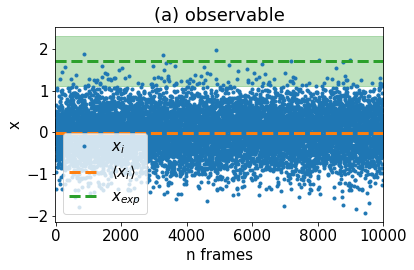

In [6]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15
plt.rcParams.update({'figure.autolayout': True})

plt.figure(figsize=(6, 4))
plt.plot(x, '.', label=r'$x_i$')

plt.plot([-5, len(x) + 5], [np.mean(x), np.mean(x)], '--', label=r'$\langle x_i\rangle$')  # ,color='tab:blue')

plt.plot([-5, len(x) + 5], [x_exp, x_exp], '--', label=r'$x_{exp}$')
plt.fill_between([-5, len(x) + 5], [x_exp - sigma_exp, x_exp - sigma_exp], [x_exp + sigma_exp, x_exp + sigma_exp], alpha=0.3, color='tab:green')

plt.title('(a) observable')
plt.legend(loc='lower left')
plt.xlim([-5, len(x) + 5])
plt.ylabel('x')
plt.xlabel('n frames')

print(plt.ylim())
# plt.ylim([-2.3, 2.5])

# plt.savefig('Manuscript_images/ex1_obs.pdf', format='pdf', bbox_inches='tight')

In [7]:
dlambda = 1e-1
lambdamax = 100
lambdas = np.arange(-lambdamax-dlambda, lambdamax+dlambda, dlambda)

# lambdas = np.linspace(-lambdamax, lambdamax, n)

In [8]:
results = compute(lambdas, p0, x, x_exp, sigma_exp, alpha)

results.keys()

dict_keys(['P', 'Z', 'av_g', 'av_g2', 'var_g', 'std_g', 'chi2', 'Srel', 'lossf', 'gamma', 'jeffreys', 'cov', 'dirichlet', 'avg_density'])

In [9]:
dV = results['lossf'][0] - np.min(results['lossf'])
print('depth: ', dV)

depth:  3.03040153508974


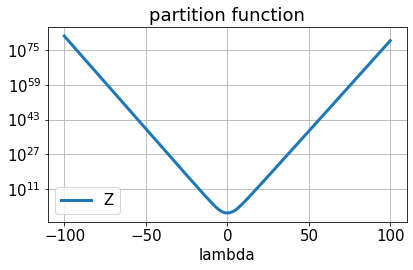

In [10]:
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 3

plt.plot(lambdas, results['Z'], '-', label='Z')
plt.yscale('log')
plt.xlabel('lambda')
plt.title('partition function')
plt.legend()
plt.grid()

(-2.1298620538396857, 2.510945812087604)
-7.700000000005247


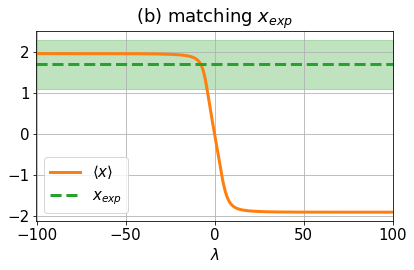

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(lambdas, results['av_g'], '-', label=r'$\langle x \rangle$', c='tab:orange')
plt.plot([lambdas[0], lambdas[-1]], [x_exp, x_exp], '--', label='$x_{exp}$', c='tab:green')
plt.fill_between([lambdas[0], lambdas[-1]], [x_exp - sigma_exp, x_exp - sigma_exp], [x_exp + sigma_exp, x_exp + sigma_exp], alpha=0.3, color='tab:green')
#plt.yscale('log')
plt.xlabel('$\lambda$')
plt.legend()
plt.grid()
plt.xlim([np.min(lambdas), np.max(lambdas)])
plt.title('(b) matching $x_{exp}$')

print(plt.ylim())
# plt.ylim([-2.3, 2.5])

print(lambdas[np.argmin(np.abs(results['av_g'] - x_exp))])

# plt.savefig('Manuscript_images/b_ex1_g_match.pdf', format='pdf', bbox_inches='tight')

In [12]:
results.keys()

dict_keys(['P', 'Z', 'av_g', 'av_g2', 'var_g', 'std_g', 'chi2', 'Srel', 'lossf', 'gamma', 'jeffreys', 'cov', 'dirichlet', 'avg_density'])

-3.9000000000054627


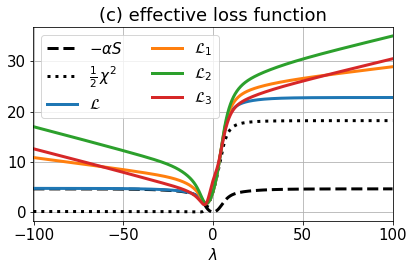

In [13]:
plt.figure(figsize=(6, 4))

plt.plot(lambdas, -alpha*results['Srel'], 'k--', label=r'$- \alpha S$')  # _{rel}$')
plt.plot(lambdas, 1/2*results['chi2'], 'k:', label=r'$\frac{1}{2} \, \chi^2$')
# plt.plot(lambdas, -alpha*results['Srel'] + 1/2*results['chi2'][:, 0], '-', label=r'$\mathcal{L}=\chi^2/\,2 - \alpha S_{rel}$')
plt.plot(lambdas, results['lossf'], label=r'$\mathcal{L}$')  # =\chi^2/\,2 - \alpha S_{rel}$')

wh = np.argmin(results['lossf'])

jeff0 = np.log(results['jeffreys'][wh])
plt.plot(lambdas, results['lossf'] - np.log(results['jeffreys']) + jeff0, label=r'$\mathcal{L}_1$')  #  - \log\sigma$')

var0 = np.log(results['var_g'][wh])
plt.plot(lambdas, results['lossf'] - np.log(results['var_g']) + var0, label=r'$\mathcal{L}_2$')  #  - \log\sigma^2$')

dirich0 = np.log(results['dirichlet'][wh])
plt.plot(lambdas, results['lossf'] - np.log(results['dirichlet']) + dirich0, label=r'$\mathcal{L}_3$')  #  - Dirichlet$')

plt.title(r'(c) effective loss function')
# plt.yscale('log')
# plt.xlim([-50, 50])
plt.xlabel(r'$\lambda$')
plt.legend(ncol=2)
plt.grid()
plt.xlim([lambdas[0], lambdas[-1]])

# plt.savefig('Manuscript_images/b_ex1_loss_adj.pdf', format='pdf', bbox_inches='tight')

print(lambdas[np.argmin(results['lossf'])])

In [14]:
hyper_P0 = np.exp(-results['lossf'])
hyper_P_gamma = np.exp(-results['gamma'])
hyper_P_jef = np.exp(-results['lossf'])*results['jeffreys']/results['jeffreys'][wh]
hyper_P_belt = np.exp(-results['lossf'])*results['var_g']/results['var_g'][wh]
hyper_P_dir = np.exp(-results['lossf'])*results['dirichlet']/results['dirichlet'][wh]

Text(0.5, 0, '$\\lambda$')

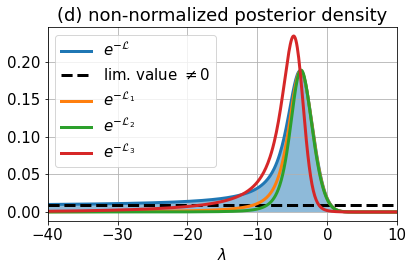

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(lambdas, hyper_P0, label=r'$e^{-\mathcal{L}}$')
plt.fill_between(lambdas, np.zeros(len(lambdas)), hyper_P0, alpha=0.5)

val = np.exp(-results['lossf'][0])
lim_x = [-40, 10]

plt.plot(lim_x, [val, val], 'k--', label=r'lim. value $\neq 0$')

for i, hyper_P in enumerate([hyper_P_jef, hyper_P_belt, hyper_P_dir]):
    plt.plot(lambdas, hyper_P, label=r'$e^{-\mathcal{L}_%i}$' % (i + 1))  #  \, \sigma$')
#     # plt.fill_between(lambdas, np.zeros(len(lambdas)), hyper_P, alpha=0.5)

plt.grid()
plt.title('(d) non-normalized posterior density')
plt.legend(loc='upper left')  # (loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(lim_x)
plt.xlabel('$\lambda$')

# plt.savefig('Manuscript_images/b_ex1_non-norm_loss.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 1.0, '(d) ensemble n. density')

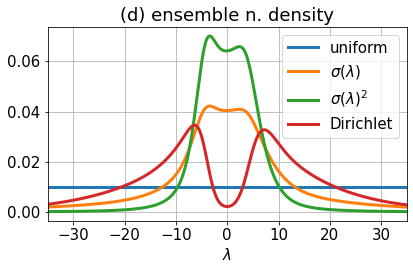

In [16]:
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 3

normalize = lambda x, dlambda : x/(np.nansum(x)*dlambda)

plt.plot(lambdas, 0.01*np.ones(len(lambdas)), label='uniform')
plt.plot(lambdas, normalize(results['std_g'], dlambda), '-', label=r'$\sigma(\lambda)$')
plt.plot(lambdas, normalize(results['var_g'], dlambda), '-', label=r'$\sigma(\lambda)^2$')
plt.plot(lambdas, normalize(results['dirichlet'], dlambda), '-', label='Dirichlet')


plt.xlabel(r'$\lambda$')
plt.grid()
plt.legend()
plt.xlim([-35, 35])
plt.title('(d) ensemble n. density')  #  (normalized)')

# plt.savefig('Manuscript_images/b_ex1_ensemble_density.pdf', format='pdf', bbox_inches='tight')

#### different n. of frames

In [17]:
dlambda = 5e-1
lambdamax = 100
lambdas = np.arange(-lambdamax-dlambda, lambdamax+dlambda, dlambda)


In [18]:
n_frames = [int(1e3), int(1e4), int(1e5), int(2e5)]

results = {}

for n in n_frames:
    p0 = np.ones(n)/n
    x = rng.normal(0, 0.5, size=n)
    results[n] = compute(lambdas, p0, x, x_exp, sigma_exp, alpha)

density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as

/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:236: RuntimeWarning: invalid value encountered in sqrt
  self.std_g = np.sqrt(self.var_g)
/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:88: RuntimeWarning: invalid value encountered in sqrt
  density = np.sqrt(np.linalg.det(cov))


density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
density is NaN because metric has been evaluated as  [[-1.77635684e-15]]


In [37]:
my_dict = {}

for n in n_frames:
    my_dict[n] = {
        'std_g' : normalize(results[n]['std_g'], dlambda),
        'var_g' : normalize(results[n]['std_g']**2, dlambda),
        'dirichlet' : normalize(results[n]['dirichlet'], dlambda)}

my_dict

{1000: {'std_g': array([0.00078433, 0.0007912 , 0.00079812, 0.0008051 , 0.00081212,
         0.0008192 , 0.00082633, 0.00083352, 0.00084076, 0.00084805,
         0.00085539, 0.00086279, 0.00087024, 0.00087774, 0.0008853 ,
         0.00089291, 0.00090057, 0.00090829, 0.00091606, 0.00092389,
         0.00093177, 0.0009397 , 0.00094768, 0.00095572, 0.00096382,
         0.00097197, 0.00098017, 0.00098842, 0.00099673, 0.00100509,
         0.00101351, 0.00102198, 0.0010305 , 0.00103908, 0.0010477 ,
         0.00105639, 0.00106512, 0.00107391, 0.00108275, 0.00109165,
         0.00110059, 0.00110959, 0.00111864, 0.00112775, 0.00113691,
         0.00114612, 0.00115538, 0.00116469, 0.00117405, 0.00118347,
         0.00119294, 0.00120246, 0.00121203, 0.00122166, 0.00123133,
         0.00124106, 0.00125084, 0.00126067, 0.00127056, 0.00128049,
         0.00129048, 0.00130052, 0.00131062, 0.00132076, 0.00133097,
         0.00134122, 0.00135153, 0.0013619 , 0.00137232, 0.0013828 ,
         0.00139333

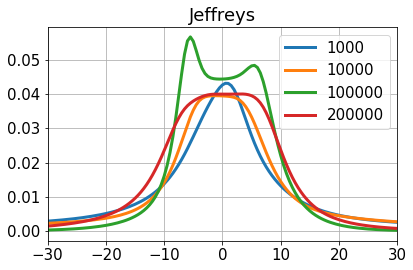

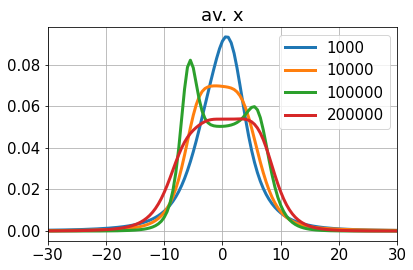

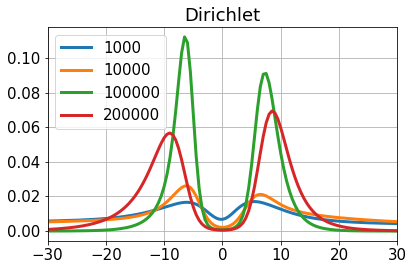

In [48]:
# 1st figure
plt.figure()
plt.title('Jeffreys')

for n in n_frames:
    plt.plot(lambdas, normalize(results[n]['std_g'], dlambda), '-', label=n)  # , c='tab:blue')

plt.legend()
plt.xlim([-30, 30])
plt.grid()

# 2nd figure
plt.figure()
plt.title('av. x')

for n in n_frames:
    plt.plot(lambdas, normalize(results[n]['std_g']**2, dlambda), '-', label=n)  # c='tab:orange'

plt.legend()
plt.xlim([-30, 30])
plt.grid()

# 3rd figure
plt.figure()
plt.title('Dirichlet')

for n in n_frames:
    plt.plot(lambdas, normalize(results[n]['dirichlet'], dlambda), '-', label=n)  # c='tab:green'

plt.legend()
plt.xlim([-30, 30])
plt.grid()

#### Metropolis sampling

In [17]:
lambdas0 = np.zeros(1)
proposal_std = 0.5

def energy_fun(lambdas, which_measure = 'jeffreys'):
    """implicit input parameters: p0, x, x_exp, sigma_exp, alpha"""
    
    out = compute_single(lambdas, p0, x, x_exp, sigma_exp, alpha)
    
    energy = out.lossf
    quantities = [out.av_g, out.Srel, out.lossf]

    if which_measure == 'jeffreys': energy -= np.log(out.jeffreys)
    elif which_measure == 'var': energy -= np.log(out.var_g)
    elif which_measure == 'dirichlet': energy -= np.log(out.dirichlet)
    
    return energy, quantities

In [30]:
outs = {}

n_steps = int(1e5)
seed = 6  # the default seed (used for the images in the manuscript) is `seed = 2`

energy_function = lambda x : energy_fun(x, None)
outs['plain'] = run_Metropolis(lambdas0, proposal_std, energy_function, n_steps=n_steps, seed=seed)

energy_function = lambda x : energy_fun(x, 'jeffreys')
outs['jeffreys'] = run_Metropolis(lambdas0, proposal_std, energy_function, n_steps=n_steps, seed=seed)

energy_function = lambda x : energy_fun(x, 'var')
outs['var'] = run_Metropolis(lambdas0, proposal_std, energy_function, n_steps=n_steps, seed=seed)

energy_function = lambda x : energy_fun(x, 'dirichlet')
outs['dirichlet'] = run_Metropolis(lambdas0, proposal_std, energy_function, n_steps=n_steps, seed=seed)

for s in ['plain', 'jeffreys', 'var', 'dirichlet']:
    outs[s][3][:, 0] = np.concatenate(outs[s][3][:, 0])

100%|██████████| 100000/100000 [00:41<00:00, 2388.31it/s]
/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:471: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  else: return np.array(traj), np.array(ene), av_alpha, np.array(quantities)


100%|██████████| 100000/100000 [00:41<00:00, 2404.90it/s]


100%|██████████| 100000/100000 [00:43<00:00, 2295.64it/s]


100%|██████████| 100000/100000 [00:45<00:00, 2176.94it/s]


(0.0, 100000.0)

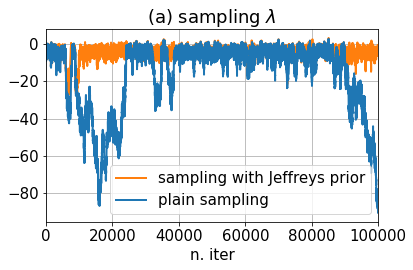

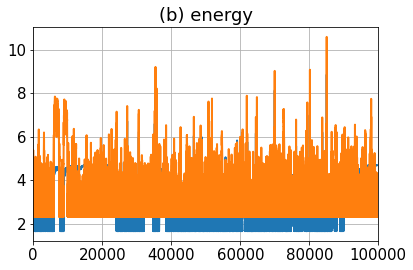

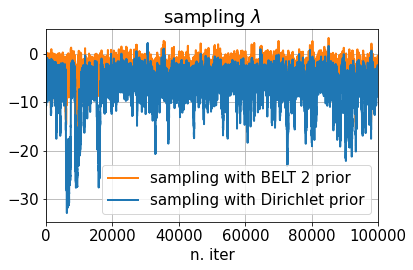

In [31]:
plt.rcParams['lines.linewidth'] = 2
# plt.rcParams.update({'figure.autolayout': True})

plt.figure(figsize=(6, 4))
plt.plot(outs['jeffreys'][0][:, 0], label='sampling with Jeffreys prior', c='tab:orange')
plt.plot(outs['plain'][0][:, 0], label='plain sampling', c='tab:blue')  # label=r'just $\mathcal{L}$')
# plt.ylabel(r'$\lambda$')
plt.title('(a) sampling $\lambda$')
plt.legend()
plt.grid()
plt.xlabel('n. iter')
plt.xlim([0, n_steps])
# plt.savefig('Manuscript_images/b_sampling_lambda2.pdf', format='pdf', bbox_inches='tight')


plt.figure(figsize=(6, 4))
plt.plot(outs['plain'][1])
plt.plot(outs['jeffreys'][1])
# plt.xlabel('n. iter')
plt.title('(b) energy')
# plt.ylabel('energy')
plt.grid()
plt.xlim([0, n_steps])
# plt.savefig('Manuscript_images/sampling_energy.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.plot(outs['var'][0][:, 0], label='sampling with BELT 2 prior', c='tab:orange')
plt.plot(outs['dirichlet'][0][:, 0], label='sampling with Dirichlet prior', c='tab:blue')  # label=r'just $\mathcal{L}$')
# plt.ylabel(r'$\lambda$')
plt.title('sampling $\lambda$')
plt.legend()
plt.grid()
plt.xlabel('n. iter')
plt.xlim([0, n_steps])
# plt.savefig('Manuscript_images/c_sampling_lambda2.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 0, '$\\mathcal{L}$')

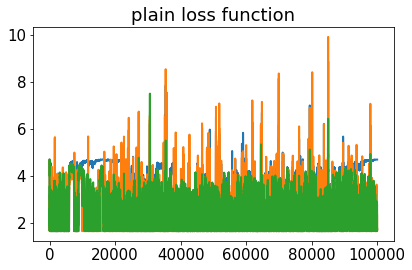

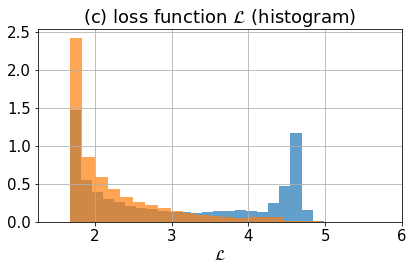

In [32]:
plt.plot(outs['plain'][3][:, 2])
plt.plot(outs['jeffreys'][3][:, 2])
plt.plot(outs['dirichlet'][3][:, 2])
plt.title('plain loss function')

plt.figure(figsize=(6, 4))

# if you want to plat exp(-loss) rather than loss
# prob = np.exp([-x for x in np.array(out_noJ[3][:, 2])])
# probJ = np.exp([-x for x in np.array(out_J[3][:, 2])])

plt.hist(outs['plain'][3][:, 2], bins=50, label='plain sampling', alpha=0.7, density=True)
plt.hist(outs['jeffreys'][3][:, 2], bins=50, label='sampling with Jeffreys prior', alpha=0.7, density=True)
# plt.hist(outs['dirichlet'][3][:, 2], bins=50, label='sampling with Dirichlet prior', alpha=0.7, density=True)
plt.grid()
# plt.legend()
plt.title(r'(c) loss function $\mathcal{L}$ (histogram)')

xlims = plt.xlim()
plt.xlim([xlims[0], 6])

plt.xlabel(r'$\mathcal{L}$')

# plt.savefig('Manuscript_images/b_loss_hist.pdf', format='pdf', bbox_inches='tight')

posterior average of $\langle x \rangle_\lambda$:
w/o Jeffreys:  1.7668622766752538
with Jeffreys:  1.1771057940045617


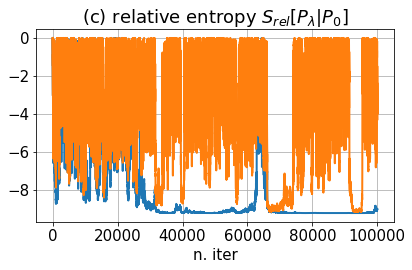

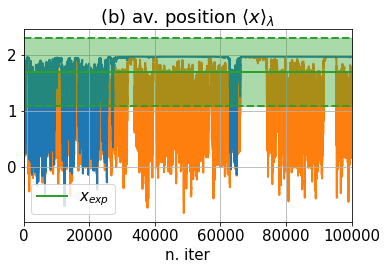

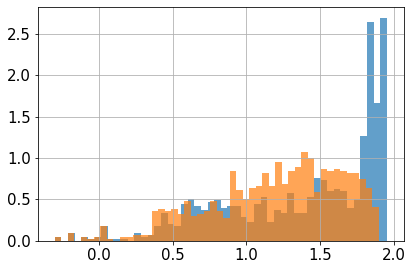

In [21]:
# """ figure 1 """
plt.figure(figsize=(6, 4))
plt.plot(outs['plain'][3][:, 1])
plt.plot(outs['jeffreys'][3][:, 1])
plt.title(r'(c) relative entropy $S_{rel}[P_\lambda|P_0]$')
plt.xlabel('n. iter')
plt.grid()
# plt.savefig('Manuscript_images/sampling_Srel.pdf', format='pdf', bbox_inches='tight')

# """ figure 2 """
plt.figure(figsize=(6, 4))
plt.plot(outs['jeffreys'][3][:, 0], c='tab:orange', zorder=1)  # , alpha=0.7)
plt.plot(outs['plain'][3][:, 0], c='tab:blue', zorder=1)  # , alpha=0.7)

plt.plot([0, n_steps], [x_exp, x_exp], '-', label='$x_{exp}$', c='tab:green', zorder=2)
plt.plot([0, n_steps], [x_exp - sigma_exp, x_exp - sigma_exp], '--', c='tab:green', zorder=2)
plt.plot([0, n_steps], [x_exp + sigma_exp, x_exp + sigma_exp], '--', c='tab:green', zorder=2)
plt.fill_between([0, n_steps], [x_exp - sigma_exp, x_exp - sigma_exp], [x_exp + sigma_exp, x_exp + sigma_exp],
    alpha=0.4, color='tab:green', zorder=2)
plt.title(r'(b) av. position $\langle x \rangle_\lambda$')
plt.xlabel('n. iter')
plt.xlim([0, n_steps])
plt.grid()
plt.legend()
# plt.savefig('Manuscript_images/b_sampling_avx.pdf', format='pdf', bbox_inches='tight')

print(r'posterior average of $\langle x \rangle_\lambda$:')
print('w/o Jeffreys: ', np.mean(outs['plain'][3][:, 0]))
print('with Jeffreys: ', np.mean(outs['jeffreys'][3][:, 0]))

# """ figure 3 """
plt.figure(figsize=(6, 4))
plt.hist(outs['plain'][3][:, 0][:1000], bins=50, label='plain sampling', alpha=0.7, density=True)
plt.hist(outs['jeffreys'][3][:, 0][:1000], bins=50, label='sampling with Jeffreys prior', alpha=0.7, density=True)
plt.grid()
# plt.legend()

Text(0, 0.5, 'energy')

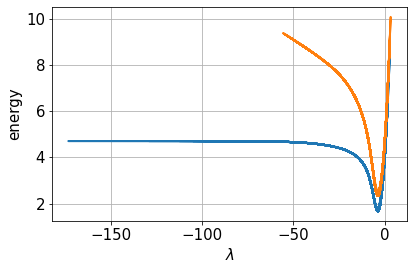

In [22]:
plt.plot(outs['plain'][0][:, 0], outs['plain'][1])
plt.plot(outs['jeffreys'][0][:, 0], outs['jeffreys'][1])
plt.grid()
plt.xlabel(r'$\lambda$')
plt.ylabel('energy')

### Scaling

In [4]:
from Functions.basic_functions_gaussian import numerical_props, analytical_props, flatten

In [25]:
# alpha = 1.
# sigma = 0.1
# gexp = 0.3
# sigma_exp = 0.05

alpha = 0.5
sigma = 0.5
gexp = 1.7
sigma_exp = 0.6

#### Compute and save as pandas DataFrame (to txt)

In [44]:
log_ns = np.linspace(1, 6, 10)
ns = np.unique(np.array([int(10**log_n) for log_n in log_ns]))

out1 = {}
out2 = {}

for n in ns:
    
    print(n)

    out1[n] = {}
    
    for m in range(5):
        out1[n][m] = numerical_props(n, sigma, gexp, sigma_exp, alpha, seed=m)
    
    out2[n] = analytical_props(n, sigma, gexp, sigma_exp, alpha, False)

10
35
129
464
1668
5994
21544
77426
278255
1000000


In [45]:
df_th = pandas.DataFrame(out2).T
df_th.insert(0, 'n_frames', df_th.index)
df_th.index = range(df_th.shape[0])

""" inverf or logN """
# df_th.to_csv('Results/scaling_th_logN.txt')
# df_th.to_csv('Results/scaling_th_inverf.txt')

In [17]:
# save as pandas dataframe

df = pandas.DataFrame(out1[ns[0]]).loc[['min_lambda', 'min_loss', 'min_avg', 'gbar', 'lim_loss', 'lim_loss_num', 'lim_chi2', 'lim_dkl', 'dV']].T
df.insert(0, 'n_frames', ns[0])

for n in ns[1:]:
    df2 = pandas.DataFrame(out1[n]).loc[['min_lambda', 'min_loss', 'min_avg', 'gbar', 'lim_loss', 'lim_loss_num', 'lim_chi2', 'lim_dkl', 'dV']].T
    df2.insert(0, 'n_frames', n)
    df = pandas.concat([df, df2])

df.insert(0, 'seed', df.index)
df.index = range(df.shape[0])

j = 0  # 0 or 1

df['lim_loss'] = [df['lim_loss'].iloc[i][j][0] for i in range(len(df['lim_loss']))]

for s in ['lim_chi2', 'lim_loss_num', 'lim_dkl']:
    df[s] = [df[s].iloc[i][j] for i in range(len(df[s]))]

# df.to_csv('Results/scaling_num.txt')


#### Load pandas DataFrame from txt

In [61]:
df = pandas.read_csv('Results/scaling_num.txt', sep=',', index_col=0)
df_th = pandas.read_csv('Results/scaling_th_inverf.txt', sep=',', index_col=0)

df

seed  n_frames     min_lambda  min_loss       min_avg      gbar  \
0       0        10  [-6.39080063]  2.443498  [0.54961065]  0.652000   
1       1        10  [-7.46408149]  2.804361  [0.35627665]  0.452678   
2       2        10  [-5.06069134]  1.885737  [0.78902746]  0.899854   
3       3        10  [-2.03511081]  0.822125  [1.33369298]  1.661500   
4       4        10  [-5.26137981]  2.124384  [0.75255722]  0.831862   
..    ...       ...            ...       ...           ...       ...   
495    45   1000000  [-3.94007446]  1.678560   [0.9877087]  2.402050   
496    46   1000000  [-3.94744831]  1.679855  [0.98634142]  2.395659   
497    47   1000000  [-3.94751526]  1.681565  [0.98650158]  2.571905   
498    48   1000000  [-3.89088079]  1.675994  [0.99629962]  2.826322   
499    49   1000000  [-3.96222726]  1.684698   [0.9836828]  2.445439   

     lim_loss  lim_loss_num  lim_chi2    lim_dkl        dV  
0    2.676715      2.676713  3.050845   2.302582  0.233216  
1    3.312143      3.312141  4.321701   2.302582  0.507781  
2    2.040507      2.040505  1.778428   2.302582  0.154768  
3    1.153351      1.153365  0.004117   2.302612  0.331240  
4    2.198048      2.198046  2.093510   2.302582  0.073662  
..        ...           ...       ...        ...       ...  
495  7.592303      7.592323  1.369095  13.815552  5.913764  
496  7.579896      7.579917  1.344281  13.815552  5.900062  
497  7.963615      7.963635  2.111719  13.815552  6.282071  
498  8.669700      8.669721  3.523889  13.815552  6.993727  
499  7.679532      7.679552  1.543553  13.815552  5.994854  

[500 rows x 11 columns]

In [62]:
def std_on_mean(x): return np.std(x)/np.sqrt(len(x))
cols = ['lim_chi2', 'lim_dkl', 'lim_loss', 'min_loss', 'dV']
df_pivot = pandas.pivot_table(df, values=cols, index=['n_frames'], aggfunc=['mean', 'std', 'first', std_on_mean])

df_pivot

mean                                                std  \
                dV  lim_chi2    lim_dkl  lim_loss  min_loss        dV   
n_frames                                                                
10        0.259580  2.794039   2.286621  2.548295  2.280750  0.137515   
35        0.517079  1.447995   3.541044  2.501641  1.977441  0.138964   
129       0.912872  0.669440   4.835663  2.764598  1.839680  0.123444   
464       1.410478  0.181974   6.104734  3.160895  1.732876  0.080577   
1668      2.025001  0.072564   7.404551  3.745972  1.713556  0.079000   
5994      2.721969  0.122438   8.691446  4.410477  1.684973  0.128417   
21544     3.464785  0.361797   9.934321  5.169846  1.683274  0.212714   
77426     4.292295  0.705763  11.241237  5.981426  1.681205  0.236528   
278255    5.098230  1.039695  12.517774  6.788032  1.680504  0.198621   
1000000   5.978813  1.535992  13.783340  7.675823  1.680852  0.294827   

                                                     first            \
          lim_chi2   lim_dkl  lim_loss  min_loss        dV  lim_chi2   
n_frames                                                               
10        1.359384  0.098605  0.679681  0.678068  0.233216  3.050845   
35        0.864345  0.090711  0.432127  0.415824  0.596433  2.871716   
129       0.388998  0.120772  0.194446  0.191264  1.138857  1.356465   
464       0.212064  0.133149  0.105958  0.117533  1.372895  0.077452   
1668      0.076541  0.096560  0.038268  0.063003  1.981757  0.077452   
5994      0.205136  0.034458  0.102567  0.038644  2.630823  0.014161   
21544     0.352735  0.149280  0.176354  0.017799  3.393108  0.206683   
77426     0.445610  0.097979  0.222802  0.010506  4.572327  1.232022   
278255    0.373832  0.079561  0.186904  0.006048  5.206241  1.232022   
1000000   0.559760  0.110569  0.279848  0.003706  5.845004  1.232022   

                                        std_on_mean                      \
            lim_dkl  lim_loss  min_loss          dV  lim_chi2   lim_dkl   
n_frames                                                                  
10         2.302582  2.676715  2.443498    0.019252  0.190314  0.013805   
35         3.555359  3.213532  2.617104    0.019455  0.121008  0.012700   
129        4.859558  3.108138  1.969154    0.017282  0.054460  0.016908   
464        6.139893  3.108668  1.735778    0.011281  0.029689  0.018641   
1668       7.419373  3.748416  1.766656    0.011060  0.010716  0.013518   
5994       8.698486  4.356338  1.725501    0.017978  0.028719  0.004824   
21544      9.977661  5.092268  1.699064    0.029780  0.049383  0.020899   
77426     11.257080  6.244550  1.672225    0.033114  0.062385  0.013717   
278255    12.536255  6.884157  1.677898    0.027807  0.052336  0.011139   
1000000   13.815552  7.523766  1.678783    0.041276  0.078366  0.015480   

                              
          lim_loss  min_loss  
n_frames                      
10        0.095155  0.094930  
35        0.060498  0.058215  
129       0.027222  0.026777  
464       0.014834  0.016455  
1668      0.005358  0.008820  
5994      0.014359  0.005410  
21544     0.024690  0.002492  
77426     0.031192  0.001471  
278255    0.026167  0.000847  
1000000   0.039179  0.000519

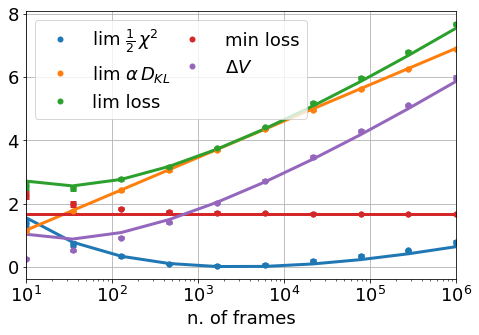

In [64]:
j = 0  # 0 or 1, depending on max/min g

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markeredgewidth'] = 3
plt.rcParams['font.size'] = 18
plt.rcParams.update({'figure.autolayout': True})

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # ,'tab:brown','tab:pink',
          #   'tab:gray','tab:olive','tab:cyan']

plt.figure(figsize=(7, 5))

plt.plot(ns, 1/2*df_pivot['mean']['lim_chi2'], '.', label=r'lim $\frac{1}{2} \, \chi^2$', c=colors[0])
plt.errorbar(ns, 1/2*df_pivot['mean']['lim_chi2'], 1/2*df_pivot['std_on_mean']['lim_chi2'], c=colors[0], fmt='.', capsize=3)
plt.plot(ns, 1/2*df_th['lim_chi2'], c=colors[0])

# overestimate of the chi2 with sqrt(log(n))
# plt.plot(ns, 1/2*((sigma*np.sqrt(2*np.log(ns)) - gexp)/sigma_exp)**2, label='1/2 chi2 est')

plt.plot(ns, alpha*df_pivot['mean']['lim_dkl'], '.', label=r'lim $\alpha\,D_{KL}$', c=colors[1])
plt.errorbar(ns, alpha*df_pivot['mean']['lim_dkl'], alpha*df_pivot['std_on_mean']['lim_dkl'], c=colors[1], fmt='.', capsize=3)
plt.plot(ns, alpha*df_th['lim_dkl'], c=colors[1])

plt.plot(ns, df_pivot['mean']['lim_loss'], '.', label='lim loss', c=colors[2])
plt.errorbar(ns, df_pivot['mean']['lim_loss'], df_pivot['std_on_mean']['lim_loss'], c=colors[2], fmt='.', capsize=3)
plt.plot(ns, df_th['lim_loss'], c=colors[2])

plt.plot(ns, df_pivot['mean']['min_loss'], '.', label='min loss', c=colors[3])
plt.errorbar(ns, df_pivot['mean']['min_loss'], df_pivot['std_on_mean']['min_loss'], c=colors[3], fmt='.', capsize=3)
plt.plot(ns, df_th['min_loss'], c=colors[3])

plt.plot(ns, df_pivot['mean']['dV'], '.', label='$\Delta V$', c=colors[4])
plt.errorbar(ns, df_pivot['mean']['dV'], df_pivot['std_on_mean']['dV'], c=colors[4], fmt='.', capsize=3)
plt.plot(ns, df_th['dV'], c=colors[4])

plt.grid()
plt.xscale('log')
plt.xlabel('n. of frames')
# plt.yscale('log')
plt.legend(ncol=2, columnspacing=0.2)
plt.xlim([ns[0], ns[-1]])

# plt.savefig('Manuscript_images/ex3_scaling_inverf.pdf', format='pdf', bbox_inches='tight')

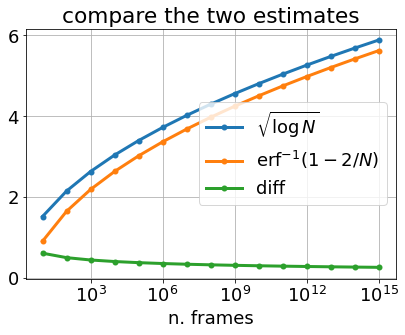

In [79]:
ns = np.array([10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15])

from scipy.special import erfinv

est1 = np.sqrt(np.log(ns))
est2 = erfinv(1 - 2/ns)

plt.figure(figsize=(6, 5))
plt.title('compare the two estimates')
plt.plot(ns, est1, '.-', label=r'$\sqrt{\log N}$')
plt.plot(ns, est2, '.-', label=r'$\mathrm{erf}^{-1}(1 - 2/N)$')
plt.plot(ns, est1 - est2, '.-', label='diff')
plt.xscale('log')
plt.xlabel('n. frames')
plt.legend()
plt.grid()


### Realistic case: refinement of RNA oligomers

In [4]:
import sys, jax.numpy as jnp
sys.path.append('../../')

from MDRefine.MDRefine import load_data, normalize_observables, minimizer, unwrap_2dict, loss_function
from Functions.basic_functions_bayesian import local_density

In [5]:
alpha = 10 # 0.5

#### 1. Load data

In [6]:
infos = {'global': {
    # 'path_directory': 'MDRefine/MDRefine/tests/DATA_test',
    # DATA_test corresponds to stride = 1e4 and only one observable per type
    
    'path_directory': '../DATA/',
    
    'system_names': ['AAAA'],  # , 'CAAU'],  # , 'CCCC', 'GACC', 'UUUU', 'UCAAUC'],
    'g_exp': ['backbone1_gamma_3J'],  # , 'backbone2_beta_epsilon_3J', 'sugar_3J'],#, 'NOEs'],# , ('uNOEs', '<')],
    'forward_qs': ['backbone1_gamma'],  # , 'backbone2_beta_epsilon', 'sugar'],
    # 'obs': ['NOEs'],#, 'uNOEs'],
    'forward_coeffs': 'original_fm_coeffs'}}

stride = 1

In [7]:
def forward_model_fun(fm_coeffs, forward_qs, selected_obs=None):

    # 1. compute the cosine (which is the quantity you need in the forward model;
    # you could do this just once before loading data)
    forward_qs_cos = {}

    for type_name in forward_qs.keys():
        forward_qs_cos[type_name] = jnp.cos(forward_qs[type_name])

    # if you have selected_obs, compute only the corresponding observables
    if selected_obs is not None:
        for type_name in forward_qs.keys():
            forward_qs_cos[type_name] = forward_qs_cos[type_name][:,selected_obs[type_name+'_3J']]

    # 2. compute observables (forward_qs_out) through forward model
    forward_qs_out = {
        'backbone1_gamma_3J': fm_coeffs[0]*forward_qs_cos['backbone1_gamma']**2 + fm_coeffs[1]*forward_qs_cos['backbone1_gamma'] + fm_coeffs[2]}
        # 'backbone2_beta_epsilon_3J': fm_coeffs[3]*forward_qs_cos['backbone2_beta_epsilon']**2 + fm_coeffs[4]*forward_qs_cos['backbone2_beta_epsilon'] + fm_coeffs[5],
        # 'sugar_3J': fm_coeffs[6]*forward_qs_cos['sugar']**2 + fm_coeffs[7]*forward_qs_cos['sugar'] + fm_coeffs[8] }

    return forward_qs_out

In [8]:
infos['global']['forward_model'] = forward_model_fun

In [9]:
infos['global']['names_ff_pars'] = ['sin alpha']  # , 'cos alpha']

def ff_correction(pars, f):
    # out = jnp.matmul(pars, (f[:, [0, 6]] + f[:, [1, 7]] + f[:, [2, 8]]).T)
    out = jnp.matmul(pars, (f[:, [0]] + f[:, [1]] + f[:, [2]]).T)
    return out

def ff_correction_hexamers(pars, f):
    out = jnp.matmul(pars, (f[:, [0, 10]] + f[:, [1, 11]] + f[:, [2, 12]] + f[:, [3, 13]] + f[:, [4, 14]]).T)
    return out

infos['global']['ff_correction'] = ff_correction
# infos['UCAAUC'] = {'ff_correction': ff_correction_hexamers}

In [10]:
data = load_data(infos, stride=stride)

loading data from directory...
loading  AAAA
done


#### 2. normalize observables and find the optimal solution at given $\alpha$

In [133]:
name_mol = 'AAAA'

normalization: just once, at the beginning of Metropolis sampling

in order to simplify a (global) pre-factor in the Jeffreys prior

In [134]:
out = normalize_observables(data.mol[name_mol].gexp, data.mol[name_mol].g, weights=data.mol[name_mol].weights)

data.mol[name_mol].g = out[0]
data.mol[name_mol].gexp = out[1]
data.mol[name_mol].normg_mean = out[2]
data.mol[name_mol].normg_std = out[3]

In [135]:
result = minimizer(data, alpha=alpha)  # this will be used in the next section, n.3

References for MDRefine package:
I. Gilardoni, V. Piomponi, T. Fröhlking, and G. Bussi, “MDRefine: a Python package for refining Molecular Dynamics trajectories with experimental data”, arxiv (2024)

References for Ensemble Refinement:
J. W. Pitera and J. D. Chodera, “On the use of experimental observations to bias simulated ensembles”, J. Chem. Theory Comp. 8, 3445–3451 (2012).

G. Hummer and J. Köfinger, “Bayesian ensemble refinement by replica simulations and reweighting”, J. Chem. Phys. 143, 243150 (2015).

A. Cesari, A. Gil-Ley, and G. Bussi, “Combining simulations and solution experiments as a paradigm for RNA force field refinement”, J. Chem. Theory Comp. 12, 6192–6200 (2016).

A. Cesari, S. Reißer, and G. Bussi, “Using the maximum entropy principle to combine simulations and solution experiments”, Computation 6, 15 (2018).

J. Köfinger, L. S. Stelzl, K. Reuter, C. Allande, K. Reichel, and G. Hummer, “Efficient ensemble refinement by reweighting”, J. Chem. Theory Comput. 15, 339

In [136]:
print(vars(result).keys())

result.min_lambdas

dict_keys(['loss', 'min_lambdas', 'minis', 'time', 'D_KL_alpha', 'abs_difference', 'av_g', 'chi2', 'logZ_new', 'weights_new'])


{'AAAA': {'backbone1_gamma_3J': Array([-0.06028876,  0.00484642, -0.00094121,  0.04529676, -0.00107901,
          0.00047925,  0.03038291,  0.00023216], dtype=float64)}}

#### 3. try with just 2 observables to make a 2d plot

In [137]:
s = 'backbone1_gamma_3J'

assert list(data.mol.keys()) == ['AAAA']
assert list(data.mol['AAAA'].g.keys()) == [s]

data.mol['AAAA'].gexp[s] = data.mol['AAAA'].gexp[s][:2, :]
data.mol['AAAA'].g[s] = data.mol['AAAA'].g[s][:, :2]
# data.mol['AAAA'].normg_mean[s] = data.mol['AAAA'].normg_mean[s][:2]
# data.mol['AAAA'].normg_std[s] = data.mol['AAAA'].normg_std[s][:2]
data.mol['AAAA'].n_experiments[s] = 2

In [138]:
out = minimizer(data, alpha=alpha)

vars(out)

References for MDRefine package:
I. Gilardoni, V. Piomponi, T. Fröhlking, and G. Bussi, “MDRefine: a Python package for refining Molecular Dynamics trajectories with experimental data”, arxiv (2024)

References for Ensemble Refinement:
J. W. Pitera and J. D. Chodera, “On the use of experimental observations to bias simulated ensembles”, J. Chem. Theory Comp. 8, 3445–3451 (2012).

G. Hummer and J. Köfinger, “Bayesian ensemble refinement by replica simulations and reweighting”, J. Chem. Phys. 143, 243150 (2015).

A. Cesari, A. Gil-Ley, and G. Bussi, “Combining simulations and solution experiments as a paradigm for RNA force field refinement”, J. Chem. Theory Comp. 12, 6192–6200 (2016).

A. Cesari, S. Reißer, and G. Bussi, “Using the maximum entropy principle to combine simulations and solution experiments”, Computation 6, 15 (2018).

J. Köfinger, L. S. Stelzl, K. Reuter, C. Allande, K. Reichel, and G. Hummer, “Efficient ensemble refinement by reweighting”, J. Chem. Theory Comput. 15, 339

{'loss': Array(0.42496343, dtype=float64),
 'min_lambdas': {'AAAA': {'backbone1_gamma_3J': Array([-0.06030639,  0.00476803], dtype=float64)}},
 'minis': {'AAAA':   message: Optimization terminated successfully.
    success: True
     status: 0
        fun: -0.02124817170807678
          x: [-6.031e-02  4.768e-03]
        nit: 4
        jac: [-9.936e-07 -1.467e-07]
   hess_inv: [[ 8.606e-02  2.917e-03]
              [ 2.917e-03  1.080e-01]]
       nfev: 7
       njev: 7},
 'time': 0.34454917907714844,
 'D_KL_alpha': {'AAAA': Array(0.0021076, dtype=float64)},
 'abs_difference': {'AAAA': Array(9.69113678e-13, dtype=float64)},
 'av_g': {'AAAA': {'backbone1_gamma_3J': Array([ 0.06643438, -0.02346103], dtype=float64)}},
 'chi2': {'AAAA': {'backbone1_gamma_3J': Array(0.7656228, dtype=float64)}},
 'logZ_new': {'AAAA': Array(0.00201068, dtype=float64)},
 'weights_new': {'AAAA': Array([1.02211057e-06, 9.77586695e-07, 1.04195290e-06, ...,
         9.08352142e-07, 9.37331113e-07, 9.31228357e-07], 

In [139]:
def flat_lambda(lambdas):

    flatten_lambda = []
    for name_mol in data.properties.system_names:
        flatten_lambda = flatten_lambda + list(
            np.hstack([lambdas[name_mol][k] for k in data.mol[name_mol].n_experiments.keys()]))

    flatten_lambda = np.array(flatten_lambda)

    return flatten_lambda

x_min = flat_lambda(out.min_lambdas)

print(x_min)

[-0.06030639  0.00476803]


In [140]:
n = 30
delta = 1

x = np.linspace(x_min[0] - delta, x_min[0] + delta, n)
y = np.linspace(x_min[1] - delta, x_min[1] + delta, n)

grid = np.meshgrid(x, y)[0]

In [141]:
sh = grid.shape

grid_vals_J = np.zeros(sh)
grid_vals_noJ = np.zeros(sh)

for i in range(sh[0]):
    for j in range(sh[1]):
        out = loss_function(np.zeros(2), data, regularization=None, alpha=alpha, fixed_lambdas=np.array([x[i], y[j]]), if_save=True)
        grid_vals_noJ[i, j] = out.loss_explicit

        measure, cov = local_density(data.mol[name_mol].g, out.weights_new[name_mol])
        grid_vals_J[i, j] = grid_vals_noJ[i, j] - np.log(measure)


0.44301003185749305 47.46088372749622


/tmp/ipykernel_5669/2590002746.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, grid_vals_noJ - vmin, cmap='jet', vmin=vmin, vmax=vmax)
/tmp/ipykernel_5669/2590002746.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, grid_vals_J - vmin, cmap='jet', vmin=vmin, vmax=vmax)


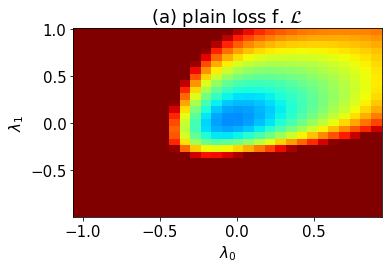

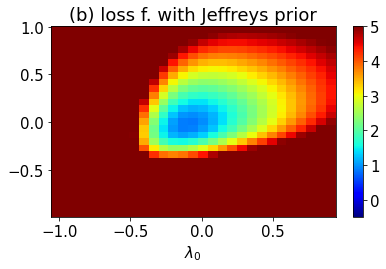

In [142]:
# matplotlib.rcParams['pcolor.shading']
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15
plt.rcParams.update({'figure.autolayout': True})

# vmin = np.min(grid_vals_J)
# # vmax = np.max(grid_vals_J)
# vmax = vmin + 8

vmin = -0.5
vmax = 5.

plt.figure(figsize=(5.65, 4))
plt.pcolormesh(x, y, grid_vals_noJ - vmin, cmap='jet', vmin=vmin, vmax=vmax)
# plt.colorbar()
plt.xlabel('$\lambda_0$')
plt.ylabel('$\lambda_1$')
plt.title('(a) plain loss f. $\mathcal{L}$')
# plt.savefig('Manuscript_images/ex2_plain_loss.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.pcolormesh(x, y, grid_vals_J - vmin, cmap='jet', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.xlabel('$\lambda_0$')
# plt.ylabel('$\lambda_1$')
plt.title('(b) loss f. with Jeffreys prior')
# plt.savefig('Manuscript_images/ex2_Jeffreys_loss.pdf', format='pdf', bbox_inches='tight')

print(np.min(grid_vals_noJ), np.max(grid_vals_noJ))

In [143]:
from Functions.basic_functions_gaussian import numerical_props

In [24]:
n_frames = len(data.mol['AAAA'].weights)
g = data.mol['AAAA'].g['backbone1_gamma_3J']
g_sigma_exp = data.mol['AAAA'].gexp['backbone1_gamma_3J']

num_props = numerical_props(n_frames, g, g_sigma_exp[:, 0], g_sigma_exp[:, 1], alpha)

num_props

           dV: 3.845118038349834
            g: Array([[ 0.62440122, -0.40421105,  0.58394389, ..., -0.47464967,
                       -0.37057335,  0.76496677],
                      [-0.88238029, -0.29072264, -0.77571999, ...,  0.38617277,
                        0.36000703, -0.5193996 ]], dtype=float64)
     lim_chi2: Array(1.94636246, dtype=float64)
      lim_dkl: Array(5.89649419, dtype=float64)
        lim_g: Array([ 0.35258047, -0.96526679], dtype=float64)
 lim_loss_num: 3.921428325466243
        lim_p: Array([4.74903234e-020, 1.99687629e-146, 3.98191141e-043, ...,
                      2.96752012e-293, 8.75835590e-288, 3.79467642e-099], dtype=float64)
      min_avg: array([ 0.61624507, -0.0740469 ])
   min_lambda: array([-0.3777788, -0.051255 ])
     min_loss: 0.07631028711640933
         mini:   message: Optimization terminated successfully.
                 success: True
                  status: 0
                     fun: 0.07631028711640933
                       x: [-3.7

In [25]:
print(num_props.dV)

3.845118038349834


#### 4. sampling

- start sampling from the point of minimum

In [6]:
out = minimizer(data, alpha=1)

vars(out)

NameError: name 'data' is not defined

In [16]:
def flat_lambda(lambdas):

    flatten_lambda = []
    for name_mol in data.properties.system_names:
        flatten_lambda = flatten_lambda + list(
            np.hstack([lambdas[name_mol][k] for k in data.mol[name_mol].n_experiments.keys()]))

    flatten_lambda = np.array(flatten_lambda)

    return flatten_lambda

x_min = flat_lambda(out.min_lambdas)

print(x_min)

[-0.34310767 -0.03502595  0.07585679  0.49756582 -0.01568491  0.0062284
  0.2019403   0.02059424]


In [17]:
def proposal(x0, dx=0.01):
    x_new = x0 + dx*np.random.normal(size=len(x0))
    return x_new

proposal_move = lambda x : proposal(x, 0.2)

def energy_fun(lambdas, if_Jeffreys):
    
    out = loss_function(np.zeros(2), data, regularization=None, alpha=1, fixed_lambdas=lambdas, if_save=True)
    
    """ vars(out).keys() = ['loss', 'loss_explicit', 'D_KL_alpha', 'abs_difference', 'av_g', 'chi2',
            'logZ_new', 'weights_new'] """
    
    energy = out.loss_explicit

    # quantities = 

    av_g = unwrap_2dict(out.av_g)[0]

    if if_Jeffreys:
        name_mol = list(out.weights_new.keys())[0]
        measure, cov = local_density(data.mol[name_mol].g, out.weights_new[name_mol])
        energy -= np.log(measure)
    
    return energy, av_g

In [37]:
unwrap_2dict(out.av_g)[0] + [np.float(out.D_KL_alpha['AAAA'])]

/tmp/ipykernel_16792/3884511173.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  unwrap_2dict(out.av_g)[0] + [np.float(out.D_KL_alpha['AAAA'])]


[Array(0.53379388, dtype=float64),
 Array(-0.07782327, dtype=float64),
 Array(0.11613129, dtype=float64),
 Array(-0.26462793, dtype=float64),
 Array(0.00373613, dtype=float64),
 Array(-0.01096133, dtype=float64),
 Array(-0.14545542, dtype=float64),
 Array(0.0262278, dtype=float64),
 0.1648787831862068]

In [18]:
x0 = x_min
# x0 = .5*np.ones(2)

In [19]:
energy_function = lambda x : energy_fun(x, False)
sampling_noJ = run_Metropolis(x0, proposal_move, energy_function, n_steps=int(2e4))

  0%|          | 7/20000 [00:00<04:48, 69.38it/s]

  0%|          | 18/20000 [00:00<03:34, 93.14it/s]

  0%|          | 30/20000 [00:00<03:11, 104.07it/s]

  0%|          | 42/20000 [00:00<03:06, 107.29it/s]

  0%|          | 56/20000 [00:00<02:50, 117.23it/s]

  0%|          | 81/20000 [00:00<02:53, 114.53it/s]

  1%|          | 105/20000 [00:00<03:01, 109.81it/s]

  1%|          | 129/20000 [00:01<03:06, 106.46it/s]

  1%|          | 151/20000 [00:01<03:07, 105.78it/s]

  1%|          | 162/20000 [00:01<03:14, 102.09it/s]

  1%|          | 173/20000 [00:01<03:17, 100.24it/s]

  1%|          | 184/20000 [00:01<03:18, 99.65it/s] 

  1%|          | 195/20000 [00:01<03:17, 100.13it/s]

  1%|          | 206/20000 [00:01<03:14, 101.66it/s]

  1%|          | 217/20000 [00:02<03:11, 103.55it/s]

  1%|          | 229/20000 [00:02<03:06, 105.80it/s]

  1%|▏         | 253/20000 [00:02<02:58, 110.85it/s]

  1%|▏         | 278/20000 [00:02<02:49, 116.42it/s]

  2%|▏         | 304/20000 [00:02<02:41, 121.68it/s]

  2%|▏         | 330/20000 [00:03<02:44, 119.81it/s]

  2%|▏         | 356/20000 [00:03<02:39, 123.46it/s]

  2%|▏         | 382/20000 [00:03<02:37, 124.71it/s]

  2%|▏         | 407/20000 [00:03<02:46, 117.54it/s]

  2%|▏         | 433/20000 [00:03<02:40, 122.13it/s]

  2%|▏         | 460/20000 [00:04<02:35, 125.54it/s]

  2%|▏         | 486/20000 [00:04<02:37, 123.95it/s]

  3%|▎         | 512/20000 [00:04<02:37, 123.80it/s]

  3%|▎         | 525/20000 [00:04<02:42, 120.01it/s]

  3%|▎         | 538/20000 [00:04<02:41, 120.26it/s]

  3%|▎         | 551/20000 [00:04<02:43, 119.03it/s]

  3%|▎         | 564/20000 [00:04<02:41, 120.62it/s]

  3%|▎         | 577/20000 [00:05<02:43, 118.92it/s]

  3%|▎         | 590/20000 [00:05<02:42, 119.62it/s]

  3%|▎         | 614/20000 [00:05<03:21, 96.10it/s] 

  3%|▎         | 639/20000 [00:05<03:00, 107.22it/s]

  3%|▎         | 663/20000 [00:05<03:02, 106.01it/s]

  3%|▎         | 685/20000 [00:06<03:05, 104.35it/s]

  4%|▎         | 709/20000 [00:06<02:53, 110.89it/s]

  4%|▎         | 734/20000 [00:06<02:46, 115.39it/s]

  4%|▍         | 759/20000 [00:06<02:40, 120.10it/s]

  4%|▍         | 784/20000 [00:06<02:44, 116.67it/s]

  4%|▍         | 808/20000 [00:07<02:45, 116.11it/s]

  4%|▍         | 833/20000 [00:07<02:48, 114.07it/s]

  4%|▍         | 858/20000 [00:07<02:43, 117.20it/s]

  4%|▍         | 883/20000 [00:07<02:40, 119.34it/s]

  5%|▍         | 909/20000 [00:08<02:35, 122.64it/s]

  5%|▍         | 935/20000 [00:08<02:33, 123.89it/s]

  5%|▍         | 948/20000 [00:08<02:35, 122.31it/s]

  5%|▍         | 961/20000 [00:08<02:34, 123.40it/s]

  5%|▍         | 974/20000 [00:08<02:34, 123.43it/s]

  5%|▍         | 987/20000 [00:08<02:33, 123.79it/s]

  5%|▌         | 1000/20000 [00:08<02:36, 121.70it/s]

  5%|▌         | 1013/20000 [00:08<02:34, 123.12it/s]

  5%|▌         | 1026/20000 [00:08<02:36, 121.42it/s]

  5%|▌         | 1052/20000 [00:09<02:36, 120.80it/s]

  5%|▌         | 1078/20000 [00:09<02:37, 120.47it/s]

  6%|▌         | 1103/20000 [00:09<02:39, 118.12it/s]

  6%|▌         | 1128/20000 [00:09<02:37, 119.55it/s]

  6%|▌         | 1152/20000 [00:10<02:43, 115.35it/s]

  6%|▌         | 1177/20000 [00:10<02:41, 116.56it/s]

  6%|▌         | 1201/20000 [00:10<02:41, 116.30it/s]

  6%|▌         | 1226/20000 [00:10<02:42, 115.84it/s]

  6%|▋         | 1251/20000 [00:10<02:38, 118.27it/s]

  6%|▋         | 1275/20000 [00:11<02:40, 116.37it/s]

  6%|▋         | 1287/20000 [00:11<02:44, 113.43it/s]

  6%|▋         | 1299/20000 [00:11<02:48, 110.73it/s]

  7%|▋         | 1311/20000 [00:11<02:48, 110.93it/s]

  7%|▋         | 1323/20000 [00:11<02:44, 113.27it/s]

  7%|▋         | 1335/20000 [00:11<02:44, 113.65it/s]

  7%|▋         | 1347/20000 [00:11<02:41, 115.17it/s]

  7%|▋         | 1359/20000 [00:11<02:43, 113.97it/s]

  7%|▋         | 1371/20000 [00:11<02:43, 113.81it/s]

  7%|▋         | 1383/20000 [00:12<02:44, 113.10it/s]

  7%|▋         | 1395/20000 [00:12<02:41, 114.96it/s]

  7%|▋         | 1407/20000 [00:12<02:41, 115.39it/s]

  7%|▋         | 1420/20000 [00:12<02:39, 116.60it/s]

  7%|▋         | 1432/20000 [00:12<02:41, 114.87it/s]

  7%|▋         | 1456/20000 [00:12<02:44, 112.59it/s]

  7%|▋         | 1480/20000 [00:12<02:42, 113.74it/s]

  8%|▊         | 1504/20000 [00:13<02:51, 108.00it/s]

  8%|▊         | 1526/20000 [00:13<02:56, 104.73it/s]

  8%|▊         | 1548/20000 [00:13<02:55, 105.41it/s]

  8%|▊         | 1571/20000 [00:13<02:48, 109.57it/s]

  8%|▊         | 1594/20000 [00:13<02:44, 111.64it/s]

  8%|▊         | 1618/20000 [00:14<02:42, 113.26it/s]

  8%|▊         | 1642/20000 [00:14<02:40, 114.32it/s]

  8%|▊         | 1666/20000 [00:14<02:38, 115.96it/s]

  8%|▊         | 1690/20000 [00:14<02:40, 114.43it/s]

  9%|▊         | 1702/20000 [00:14<02:40, 113.99it/s]

  9%|▊         | 1714/20000 [00:15<02:39, 114.68it/s]

  9%|▊         | 1726/20000 [00:15<02:41, 113.01it/s]

  9%|▊         | 1739/20000 [00:15<02:37, 116.14it/s]

  9%|▉         | 1751/20000 [00:15<02:39, 114.52it/s]

  9%|▉         | 1763/20000 [00:15<02:37, 115.96it/s]

  9%|▉         | 1775/20000 [00:15<02:37, 115.44it/s]

  9%|▉         | 1788/20000 [00:15<02:35, 117.28it/s]

  9%|▉         | 1800/20000 [00:15<02:37, 115.56it/s]

  9%|▉         | 1812/20000 [00:15<02:35, 116.72it/s]

  9%|▉         | 1824/20000 [00:15<02:36, 115.81it/s]

  9%|▉         | 1836/20000 [00:16<02:35, 116.71it/s]

  9%|▉         | 1848/20000 [00:16<02:35, 117.08it/s]

  9%|▉         | 1861/20000 [00:16<02:32, 118.82it/s]

  9%|▉         | 1873/20000 [00:16<02:35, 116.25it/s]

  9%|▉         | 1898/20000 [00:16<02:49, 107.05it/s]

 10%|▉         | 1926/20000 [00:16<02:30, 119.76it/s]

 10%|▉         | 1953/20000 [00:17<02:23, 125.45it/s]

 10%|▉         | 1979/20000 [00:17<02:23, 126.01it/s]

 10%|█         | 2005/20000 [00:17<02:24, 124.75it/s]

 10%|█         | 2031/20000 [00:17<02:25, 123.11it/s]

 10%|█         | 2044/20000 [00:17<02:28, 121.25it/s]

 10%|█         | 2057/20000 [00:17<02:25, 123.08it/s]

 10%|█         | 2070/20000 [00:18<02:27, 121.28it/s]

 10%|█         | 2083/20000 [00:18<02:29, 119.62it/s]

 10%|█         | 2096/20000 [00:18<02:28, 120.95it/s]

 11%|█         | 2109/20000 [00:18<02:25, 122.64it/s]

 11%|█         | 2122/20000 [00:18<02:25, 122.83it/s]

 11%|█         | 2136/20000 [00:18<02:22, 125.07it/s]

 11%|█         | 2150/20000 [00:18<02:20, 127.04it/s]

 11%|█         | 2176/20000 [00:18<02:19, 127.86it/s]

 11%|█         | 2205/20000 [00:19<02:14, 132.76it/s]

 11%|█         | 2233/20000 [00:19<02:16, 130.47it/s]

 11%|█▏        | 2260/20000 [00:19<02:19, 127.35it/s]

 11%|█▏        | 2286/20000 [00:19<02:19, 127.21it/s]

 12%|█▏        | 2313/20000 [00:19<02:17, 128.37it/s]

 12%|█▏        | 2339/20000 [00:20<02:17, 128.74it/s]

 12%|█▏        | 2367/20000 [00:20<02:14, 131.51it/s]

 12%|█▏        | 2394/20000 [00:20<02:21, 124.12it/s]

 12%|█▏        | 2407/20000 [00:20<02:23, 122.22it/s]

 12%|█▏        | 2420/20000 [00:20<02:23, 122.48it/s]

 12%|█▏        | 2433/20000 [00:20<02:24, 121.29it/s]

 12%|█▏        | 2446/20000 [00:21<02:33, 114.07it/s]

 12%|█▏        | 2458/20000 [00:21<02:34, 113.57it/s]

 12%|█▏        | 2470/20000 [00:21<02:33, 114.37it/s]

 12%|█▏        | 2482/20000 [00:21<02:31, 115.40it/s]

 12%|█▏        | 2494/20000 [00:21<02:31, 115.85it/s]

 13%|█▎        | 2506/20000 [00:21<02:31, 115.70it/s]

 13%|█▎        | 2530/20000 [00:21<02:35, 112.47it/s]

 13%|█▎        | 2554/20000 [00:21<02:34, 112.67it/s]

 13%|█▎        | 2578/20000 [00:22<02:35, 111.80it/s]

 13%|█▎        | 2602/20000 [00:22<02:34, 112.92it/s]

 13%|█▎        | 2626/20000 [00:22<02:31, 114.48it/s]

 13%|█▎        | 2650/20000 [00:22<02:31, 114.39it/s]

 13%|█▎        | 2674/20000 [00:23<02:31, 114.34it/s]

 13%|█▎        | 2686/20000 [00:23<02:31, 114.40it/s]

 13%|█▎        | 2698/20000 [00:23<02:30, 114.89it/s]

 14%|█▎        | 2710/20000 [00:23<02:31, 114.09it/s]

 14%|█▎        | 2722/20000 [00:23<02:30, 114.88it/s]

 14%|█▎        | 2734/20000 [00:23<02:33, 112.45it/s]

 14%|█▎        | 2746/20000 [00:23<02:32, 113.08it/s]

 14%|█▍        | 2758/20000 [00:23<02:34, 111.28it/s]

 14%|█▍        | 2770/20000 [00:23<02:33, 112.01it/s]

 14%|█▍        | 2782/20000 [00:24<02:35, 110.63it/s]

 14%|█▍        | 2794/20000 [00:24<02:33, 111.89it/s]

 14%|█▍        | 2806/20000 [00:24<02:33, 111.93it/s]

 14%|█▍        | 2818/20000 [00:24<02:33, 111.88it/s]

 14%|█▍        | 2830/20000 [00:24<02:33, 111.93it/s]

 14%|█▍        | 2854/20000 [00:24<02:33, 111.81it/s]

 14%|█▍        | 2879/20000 [00:24<02:29, 114.23it/s]

 15%|█▍        | 2903/20000 [00:25<02:28, 114.81it/s]

 15%|█▍        | 2927/20000 [00:25<02:28, 115.21it/s]

 15%|█▍        | 2951/20000 [00:25<02:29, 114.29it/s]

 15%|█▍        | 2976/20000 [00:25<02:27, 115.13it/s]

 15%|█▌        | 3001/20000 [00:25<02:25, 116.86it/s]

 15%|█▌        | 3025/20000 [00:26<02:25, 116.49it/s]

 15%|█▌        | 3049/20000 [00:26<02:26, 115.35it/s]

 15%|█▌        | 3073/20000 [00:26<02:27, 114.84it/s]

 15%|█▌        | 3085/20000 [00:26<02:32, 111.01it/s]

 15%|█▌        | 3097/20000 [00:26<02:29, 113.03it/s]

 16%|█▌        | 3109/20000 [00:26<02:29, 113.09it/s]

 16%|█▌        | 3121/20000 [00:26<02:28, 113.99it/s]

 16%|█▌        | 3146/20000 [00:27<02:23, 117.76it/s]

 16%|█▌        | 3172/20000 [00:27<02:17, 122.65it/s]

 16%|█▌        | 3185/20000 [00:27<02:17, 122.32it/s]

 16%|█▌        | 3199/20000 [00:27<02:13, 125.82it/s]

 16%|█▌        | 3225/20000 [00:27<02:12, 126.79it/s]

 16%|█▌        | 3238/20000 [00:27<02:13, 125.91it/s]

 16%|█▋        | 3251/20000 [00:28<02:12, 125.95it/s]

 16%|█▋        | 3264/20000 [00:28<02:13, 125.11it/s]

 16%|█▋        | 3278/20000 [00:28<02:10, 128.06it/s]

 17%|█▋        | 3305/20000 [00:28<02:07, 130.99it/s]

 17%|█▋        | 3319/20000 [00:28<02:09, 129.08it/s]

 17%|█▋        | 3345/20000 [00:28<02:25, 114.67it/s]

 17%|█▋        | 3371/20000 [00:29<02:18, 120.49it/s]

 17%|█▋        | 3397/20000 [00:29<02:15, 122.38it/s]

 17%|█▋        | 3423/20000 [00:29<02:14, 123.36it/s]

 17%|█▋        | 3449/20000 [00:29<02:12, 125.11it/s]

 17%|█▋        | 3476/20000 [00:29<02:10, 126.15it/s]

 18%|█▊        | 3502/20000 [00:30<02:12, 124.96it/s]

 18%|█▊        | 3529/20000 [00:30<02:09, 127.03it/s]

 18%|█▊        | 3542/20000 [00:30<02:10, 126.08it/s]

 18%|█▊        | 3555/20000 [00:30<02:13, 122.93it/s]

 18%|█▊        | 3568/20000 [00:30<02:12, 124.07it/s]

 18%|█▊        | 3581/20000 [00:30<02:10, 125.44it/s]

 18%|█▊        | 3594/20000 [00:30<02:13, 123.27it/s]

 18%|█▊        | 3608/20000 [00:30<02:09, 126.58it/s]

 18%|█▊        | 3621/20000 [00:31<02:11, 124.31it/s]

 18%|█▊        | 3635/20000 [00:31<02:09, 126.60it/s]

 18%|█▊        | 3648/20000 [00:31<02:21, 115.58it/s]

 18%|█▊        | 3661/20000 [00:31<02:17, 118.76it/s]

 18%|█▊        | 3674/20000 [00:31<02:14, 121.61it/s]

 18%|█▊        | 3688/20000 [00:31<02:11, 124.36it/s]

 19%|█▊        | 3702/20000 [00:31<02:07, 127.51it/s]

 19%|█▊        | 3716/20000 [00:31<02:05, 130.10it/s]

 19%|█▊        | 3730/20000 [00:31<02:03, 131.59it/s]

 19%|█▉        | 3758/20000 [00:32<02:06, 128.71it/s]

 19%|█▉        | 3784/20000 [00:32<02:10, 124.34it/s]

 19%|█▉        | 3797/20000 [00:32<02:11, 123.60it/s]

 19%|█▉        | 3810/20000 [00:32<02:30, 107.22it/s]

 19%|█▉        | 3822/20000 [00:32<02:27, 109.86it/s]

 19%|█▉        | 3834/20000 [00:32<02:23, 112.28it/s]

 19%|█▉        | 3846/20000 [00:32<02:23, 112.83it/s]

 19%|█▉        | 3858/20000 [00:32<02:22, 113.31it/s]

 19%|█▉        | 3870/20000 [00:33<02:21, 114.30it/s]

 19%|█▉        | 3883/20000 [00:33<02:18, 116.68it/s]

 19%|█▉        | 3895/20000 [00:33<02:17, 117.17it/s]

 20%|█▉        | 3918/20000 [00:33<02:29, 107.81it/s]

 20%|█▉        | 3942/20000 [00:33<02:22, 112.44it/s]

 20%|█▉        | 3967/20000 [00:33<02:16, 117.74it/s]

 20%|█▉        | 3993/20000 [00:34<02:12, 121.11it/s]

 20%|██        | 4019/20000 [00:34<02:09, 123.84it/s]

 20%|██        | 4047/20000 [00:34<02:02, 130.30it/s]

 20%|██        | 4075/20000 [00:34<02:03, 129.23it/s]

 20%|██        | 4088/20000 [00:34<02:04, 127.95it/s]

 21%|██        | 4101/20000 [00:35<02:16, 116.55it/s]

 21%|██        | 4113/20000 [00:35<02:15, 117.44it/s]

 21%|██        | 4126/20000 [00:35<02:13, 118.75it/s]

 21%|██        | 4138/20000 [00:35<02:14, 118.04it/s]

 21%|██        | 4151/20000 [00:35<02:12, 119.98it/s]

 21%|██        | 4164/20000 [00:35<02:09, 122.37it/s]

 21%|██        | 4178/20000 [00:35<02:07, 124.57it/s]

 21%|██        | 4191/20000 [00:35<02:08, 122.99it/s]

 21%|██        | 4216/20000 [00:36<02:22, 110.61it/s]

 21%|██        | 4241/20000 [00:36<02:17, 114.42it/s]

 21%|██▏       | 4266/20000 [00:36<02:14, 116.58it/s]

 21%|██▏       | 4290/20000 [00:36<02:17, 114.56it/s]

 22%|██▏       | 4302/20000 [00:36<02:16, 114.86it/s]

 22%|██▏       | 4315/20000 [00:36<02:14, 116.45it/s]

 22%|██▏       | 4327/20000 [00:36<02:19, 112.06it/s]

 22%|██▏       | 4340/20000 [00:37<02:16, 115.00it/s]

 22%|██▏       | 4352/20000 [00:37<02:28, 105.62it/s]

 22%|██▏       | 4363/20000 [00:37<02:29, 104.92it/s]

 22%|██▏       | 4376/20000 [00:37<02:21, 110.47it/s]

 22%|██▏       | 4388/20000 [00:37<02:18, 112.91it/s]

 22%|██▏       | 4400/20000 [00:37<02:15, 114.73it/s]

 22%|██▏       | 4412/20000 [00:37<02:14, 115.64it/s]

 22%|██▏       | 4424/20000 [00:37<02:15, 114.83it/s]

 22%|██▏       | 4448/20000 [00:38<02:16, 114.00it/s]

 22%|██▏       | 4460/20000 [00:38<02:32, 102.22it/s]

 22%|██▏       | 4472/20000 [00:38<02:26, 106.01it/s]

 22%|██▏       | 4496/20000 [00:38<02:19, 111.43it/s]

 23%|██▎       | 4508/20000 [00:38<02:17, 112.41it/s]

 23%|██▎       | 4521/20000 [00:38<02:13, 116.20it/s]

 23%|██▎       | 4533/20000 [00:38<02:13, 115.57it/s]

 23%|██▎       | 4545/20000 [00:38<02:13, 115.54it/s]

 23%|██▎       | 4557/20000 [00:39<02:16, 113.15it/s]

 23%|██▎       | 4569/20000 [00:39<02:16, 113.37it/s]

 23%|██▎       | 4581/20000 [00:39<02:34, 99.76it/s] 

 23%|██▎       | 4603/20000 [00:39<02:35, 99.23it/s]

 23%|██▎       | 4625/20000 [00:39<02:34, 99.40it/s]

 23%|██▎       | 4648/20000 [00:39<02:25, 105.17it/s]

 23%|██▎       | 4673/20000 [00:40<02:17, 111.52it/s]

 24%|██▎       | 4700/20000 [00:40<02:05, 121.68it/s]

 24%|██▎       | 4713/20000 [00:40<02:18, 110.07it/s]

 24%|██▎       | 4726/20000 [00:40<02:14, 113.70it/s]

 24%|██▎       | 4739/20000 [00:40<02:11, 116.34it/s]

 24%|██▍       | 4752/20000 [00:40<02:08, 119.03it/s]

 24%|██▍       | 4765/20000 [00:40<02:10, 116.95it/s]

 24%|██▍       | 4778/20000 [00:41<02:08, 118.61it/s]

 24%|██▍       | 4791/20000 [00:41<02:06, 120.18it/s]

 24%|██▍       | 4805/20000 [00:41<02:03, 123.25it/s]

 24%|██▍       | 4818/20000 [00:41<02:14, 112.56it/s]

 24%|██▍       | 4844/20000 [00:41<02:06, 119.57it/s]

 24%|██▍       | 4870/20000 [00:41<02:04, 121.10it/s]

 24%|██▍       | 4883/20000 [00:41<02:07, 118.45it/s]

 24%|██▍       | 4896/20000 [00:42<02:05, 120.47it/s]

 25%|██▍       | 4909/20000 [00:42<02:03, 122.27it/s]

 25%|██▍       | 4922/20000 [00:42<02:02, 123.19it/s]

 25%|██▍       | 4935/20000 [00:42<02:00, 124.59it/s]

 25%|██▍       | 4948/20000 [00:42<02:11, 114.46it/s]

 25%|██▍       | 4961/20000 [00:42<02:08, 116.83it/s]

 25%|██▍       | 4973/20000 [00:42<02:10, 115.10it/s]

 25%|██▍       | 4985/20000 [00:42<02:10, 114.68it/s]

 25%|██▍       | 4998/20000 [00:42<02:08, 116.63it/s]

 25%|██▌       | 5011/20000 [00:43<02:05, 119.08it/s]

 25%|██▌       | 5036/20000 [00:43<02:16, 109.62it/s]

 25%|██▌       | 5062/20000 [00:43<02:06, 117.75it/s]

 25%|██▌       | 5087/20000 [00:43<02:02, 121.26it/s]

 26%|██▌       | 5114/20000 [00:43<01:58, 125.93it/s]

 26%|██▌       | 5127/20000 [00:43<01:59, 124.38it/s]

 26%|██▌       | 5141/20000 [00:44<01:57, 125.96it/s]

 26%|██▌       | 5154/20000 [00:44<01:57, 126.60it/s]

 26%|██▌       | 5167/20000 [00:44<02:06, 117.20it/s]

 26%|██▌       | 5179/20000 [00:44<02:06, 117.22it/s]

 26%|██▌       | 5192/20000 [00:44<02:04, 118.97it/s]

 26%|██▌       | 5204/20000 [00:44<02:06, 116.99it/s]

 26%|██▌       | 5217/20000 [00:44<02:04, 118.57it/s]

 26%|██▌       | 5229/20000 [00:44<02:14, 109.53it/s]

 26%|██▋       | 5254/20000 [00:45<02:06, 116.22it/s]

 26%|██▋       | 5267/20000 [00:45<02:03, 119.59it/s]

 26%|██▋       | 5280/20000 [00:45<02:01, 121.62it/s]

 27%|██▋       | 5308/20000 [00:45<01:56, 125.60it/s]

 27%|██▋       | 5335/20000 [00:45<01:55, 126.70it/s]

 27%|██▋       | 5348/20000 [00:45<02:14, 108.95it/s]

 27%|██▋       | 5361/20000 [00:45<02:08, 114.27it/s]

 27%|██▋       | 5374/20000 [00:46<02:05, 116.71it/s]

 27%|██▋       | 5388/20000 [00:46<02:00, 120.87it/s]

 27%|██▋       | 5401/20000 [00:46<02:00, 121.37it/s]

 27%|██▋       | 5414/20000 [00:46<01:59, 122.24it/s]

 27%|██▋       | 5427/20000 [00:46<01:58, 122.91it/s]

 27%|██▋       | 5454/20000 [00:46<02:04, 116.68it/s]

 27%|██▋       | 5479/20000 [00:46<02:00, 120.31it/s]

 28%|██▊       | 5506/20000 [00:47<01:56, 124.59it/s]

 28%|██▊       | 5533/20000 [00:47<01:53, 127.56it/s]

 28%|██▊       | 5560/20000 [00:47<01:51, 128.98it/s]

 28%|██▊       | 5573/20000 [00:47<01:55, 124.44it/s]

 28%|██▊       | 5586/20000 [00:47<02:05, 115.12it/s]

 28%|██▊       | 5612/20000 [00:48<01:58, 120.96it/s]

 28%|██▊       | 5625/20000 [00:48<01:57, 122.18it/s]

 28%|██▊       | 5638/20000 [00:48<01:58, 120.75it/s]

 28%|██▊       | 5651/20000 [00:48<01:58, 121.53it/s]

 28%|██▊       | 5664/20000 [00:48<01:55, 123.93it/s]

 28%|██▊       | 5677/20000 [00:48<01:55, 123.83it/s]

 29%|██▊       | 5703/20000 [00:48<02:03, 115.77it/s]

 29%|██▊       | 5730/20000 [00:49<01:55, 123.91it/s]

 29%|██▉       | 5758/20000 [00:49<01:49, 130.07it/s]

 29%|██▉       | 5786/20000 [00:49<01:48, 131.37it/s]

 29%|██▉       | 5813/20000 [00:49<02:02, 116.08it/s]

 29%|██▉       | 5826/20000 [00:49<02:00, 117.79it/s]

 29%|██▉       | 5840/20000 [00:49<01:56, 121.04it/s]

 29%|██▉       | 5853/20000 [00:50<01:57, 120.32it/s]

 29%|██▉       | 5866/20000 [00:50<01:54, 122.94it/s]

 29%|██▉       | 5879/20000 [00:50<01:54, 122.80it/s]

 29%|██▉       | 5892/20000 [00:50<01:53, 124.04it/s]

 30%|██▉       | 5905/20000 [00:50<01:53, 123.66it/s]

 30%|██▉       | 5931/20000 [00:50<02:01, 116.13it/s]

 30%|██▉       | 5959/20000 [00:50<01:52, 124.66it/s]

 30%|██▉       | 5986/20000 [00:51<01:50, 127.13it/s]

 30%|███       | 6013/20000 [00:51<01:48, 129.22it/s]

 30%|███       | 6040/20000 [00:51<01:47, 129.34it/s]

 30%|███       | 6066/20000 [00:51<01:58, 117.10it/s]

 30%|███       | 6080/20000 [00:51<01:54, 121.55it/s]

 30%|███       | 6094/20000 [00:51<01:50, 125.69it/s]

 31%|███       | 6107/20000 [00:52<01:50, 126.18it/s]

 31%|███       | 6121/20000 [00:52<01:49, 127.05it/s]

 31%|███       | 6134/20000 [00:52<01:49, 126.53it/s]

 31%|███       | 6147/20000 [00:52<01:49, 126.06it/s]

 31%|███       | 6160/20000 [00:52<01:51, 124.44it/s]

 31%|███       | 6186/20000 [00:52<02:00, 114.56it/s]

 31%|███       | 6213/20000 [00:52<01:53, 121.34it/s]

 31%|███       | 6240/20000 [00:53<01:49, 125.78it/s]

 31%|███▏      | 6266/20000 [00:53<01:54, 119.97it/s]

 31%|███▏      | 6293/20000 [00:53<01:54, 120.20it/s]

 32%|███▏      | 6306/20000 [00:53<02:02, 111.37it/s]

 32%|███▏      | 6331/20000 [00:53<02:01, 112.84it/s]

 32%|███▏      | 6359/20000 [00:54<01:50, 123.87it/s]

 32%|███▏      | 6386/20000 [00:54<01:47, 126.52it/s]

 32%|███▏      | 6412/20000 [00:54<02:00, 113.13it/s]

 32%|███▏      | 6437/20000 [00:54<01:55, 116.94it/s]

 32%|███▏      | 6462/20000 [00:55<01:56, 116.50it/s]

 32%|███▏      | 6474/20000 [00:55<01:58, 114.56it/s]

 32%|███▏      | 6486/20000 [00:55<01:59, 113.44it/s]

 32%|███▏      | 6498/20000 [00:55<02:01, 111.21it/s]

 33%|███▎      | 6512/20000 [00:55<01:54, 117.36it/s]

 33%|███▎      | 6524/20000 [00:55<02:05, 107.77it/s]

 33%|███▎      | 6550/20000 [00:55<01:54, 117.12it/s]

 33%|███▎      | 6577/20000 [00:56<01:48, 123.84it/s]

 33%|███▎      | 6603/20000 [00:56<01:47, 124.47it/s]

 33%|███▎      | 6630/20000 [00:56<01:43, 128.78it/s]

 33%|███▎      | 6655/20000 [00:56<01:55, 115.40it/s]

 33%|███▎      | 6682/20000 [00:56<01:48, 122.92it/s]

 34%|███▎      | 6710/20000 [00:57<01:42, 129.93it/s]

 34%|███▎      | 6738/20000 [00:57<01:40, 131.91it/s]

 34%|███▍      | 6752/20000 [00:57<01:42, 128.81it/s]

 34%|███▍      | 6766/20000 [00:57<01:42, 129.34it/s]

 34%|███▍      | 6779/20000 [00:57<01:58, 111.79it/s]

 34%|███▍      | 6804/20000 [00:57<01:52, 117.26it/s]

 34%|███▍      | 6831/20000 [00:58<01:47, 122.44it/s]

 34%|███▍      | 6857/20000 [00:58<01:46, 123.16it/s]

 34%|███▍      | 6870/20000 [00:58<01:58, 110.99it/s]

 34%|███▍      | 6882/20000 [00:58<02:00, 108.73it/s]

 34%|███▍      | 6895/20000 [00:58<01:55, 113.00it/s]

 35%|███▍      | 6908/20000 [00:58<01:53, 115.30it/s]

 35%|███▍      | 6920/20000 [00:58<01:52, 115.97it/s]

 35%|███▍      | 6933/20000 [00:59<01:50, 118.35it/s]

 35%|███▍      | 6945/20000 [00:59<02:05, 103.69it/s]

 35%|███▍      | 6970/20000 [00:59<01:53, 114.59it/s]

 35%|███▍      | 6998/20000 [00:59<01:44, 123.85it/s]

 35%|███▌      | 7025/20000 [00:59<01:42, 126.78it/s]

 35%|███▌      | 7038/20000 [00:59<01:53, 114.43it/s]

 35%|███▌      | 7051/20000 [01:00<01:49, 118.17it/s]

 35%|███▌      | 7064/20000 [01:00<01:47, 119.94it/s]

 35%|███▌      | 7077/20000 [01:00<01:45, 122.12it/s]

 35%|███▌      | 7090/20000 [01:00<02:01, 106.43it/s]

 36%|███▌      | 7115/20000 [01:00<01:57, 110.05it/s]

 36%|███▌      | 7143/20000 [01:00<01:44, 123.07it/s]

 36%|███▌      | 7171/20000 [01:01<01:40, 127.05it/s]

 36%|███▌      | 7185/20000 [01:01<01:39, 128.32it/s]

 36%|███▌      | 7198/20000 [01:01<01:52, 113.84it/s]

 36%|███▌      | 7210/20000 [01:01<01:51, 115.01it/s]

 36%|███▌      | 7223/20000 [01:01<01:48, 117.30it/s]

 36%|███▌      | 7235/20000 [01:01<01:49, 116.43it/s]

 36%|███▋      | 7259/20000 [01:01<01:58, 107.22it/s]

 36%|███▋      | 7286/20000 [01:02<01:48, 117.12it/s]

 37%|███▋      | 7313/20000 [01:02<01:42, 123.92it/s]

 37%|███▋      | 7340/20000 [01:02<01:40, 126.59it/s]

 37%|███▋      | 7353/20000 [01:02<01:40, 125.47it/s]

 37%|███▋      | 7367/20000 [01:02<01:40, 125.35it/s]

 37%|███▋      | 7380/20000 [01:02<01:49, 115.02it/s]

 37%|███▋      | 7392/20000 [01:02<01:51, 113.01it/s]

 37%|███▋      | 7405/20000 [01:03<01:47, 116.95it/s]

 37%|███▋      | 7418/20000 [01:03<01:44, 119.91it/s]

 37%|███▋      | 7431/20000 [01:03<01:53, 110.70it/s]

 37%|███▋      | 7443/20000 [01:03<01:56, 107.92it/s]

 37%|███▋      | 7454/20000 [01:03<02:06, 99.01it/s] 

 37%|███▋      | 7465/20000 [01:03<02:07, 98.41it/s]

 37%|███▋      | 7478/20000 [01:03<01:58, 105.53it/s]

 37%|███▋      | 7489/20000 [01:03<02:05, 99.89it/s] 

 38%|███▊      | 7501/20000 [01:03<02:00, 103.82it/s]

 38%|███▊      | 7514/20000 [01:04<01:52, 110.88it/s]

 38%|███▊      | 7541/20000 [01:04<01:44, 119.10it/s]

 38%|███▊      | 7555/20000 [01:04<01:41, 122.90it/s]

 38%|███▊      | 7568/20000 [01:04<01:52, 110.21it/s]

 38%|███▊      | 7580/20000 [01:04<01:50, 112.09it/s]

 38%|███▊      | 7593/20000 [01:04<01:46, 116.94it/s]

 38%|███▊      | 7607/20000 [01:04<01:42, 121.32it/s]

 38%|███▊      | 7621/20000 [01:04<01:39, 124.61it/s]

 38%|███▊      | 7634/20000 [01:05<01:38, 125.50it/s]

 38%|███▊      | 7648/20000 [01:05<01:36, 127.55it/s]

 38%|███▊      | 7661/20000 [01:05<01:47, 114.33it/s]

 38%|███▊      | 7674/20000 [01:05<01:44, 117.79it/s]

 38%|███▊      | 7687/20000 [01:05<01:44, 117.61it/s]

 38%|███▊      | 7699/20000 [01:05<01:44, 117.41it/s]

 39%|███▊      | 7712/20000 [01:05<01:42, 120.41it/s]

 39%|███▊      | 7725/20000 [01:05<01:41, 121.46it/s]

 39%|███▊      | 7739/20000 [01:05<01:38, 124.42it/s]

 39%|███▉      | 7752/20000 [01:06<01:52, 109.26it/s]

 39%|███▉      | 7765/20000 [01:06<01:47, 113.83it/s]

 39%|███▉      | 7778/20000 [01:06<01:45, 116.34it/s]

 39%|███▉      | 7792/20000 [01:06<01:41, 120.32it/s]

 39%|███▉      | 7805/20000 [01:06<01:40, 121.69it/s]

 39%|███▉      | 7818/20000 [01:06<01:45, 115.73it/s]

 39%|███▉      | 7830/20000 [01:06<01:55, 105.22it/s]

 39%|███▉      | 7855/20000 [01:06<01:47, 112.81it/s]

 39%|███▉      | 7880/20000 [01:07<01:44, 115.54it/s]

 39%|███▉      | 7892/20000 [01:07<01:44, 115.68it/s]

 40%|███▉      | 7904/20000 [01:07<01:55, 104.87it/s]

 40%|███▉      | 7916/20000 [01:07<01:53, 106.64it/s]

 40%|███▉      | 7928/20000 [01:07<01:51, 108.43it/s]

 40%|███▉      | 7940/20000 [01:07<01:49, 110.22it/s]

 40%|███▉      | 7953/20000 [01:07<01:46, 113.61it/s]

 40%|███▉      | 7966/20000 [01:07<01:42, 117.80it/s]

 40%|███▉      | 7979/20000 [01:08<01:40, 119.39it/s]

 40%|███▉      | 7992/20000 [01:08<01:38, 121.86it/s]

 40%|████      | 8005/20000 [01:08<01:36, 123.80it/s]

 40%|████      | 8018/20000 [01:08<01:41, 118.02it/s]

 40%|████      | 8030/20000 [01:08<01:41, 117.99it/s]

 40%|████      | 8043/20000 [01:08<01:40, 118.84it/s]

 40%|████      | 8067/20000 [01:08<01:49, 109.40it/s]

 40%|████      | 8093/20000 [01:09<01:40, 118.44it/s]

 41%|████      | 8120/20000 [01:09<01:34, 125.63it/s]

 41%|████      | 8146/20000 [01:09<01:34, 125.98it/s]

 41%|████      | 8173/20000 [01:09<01:32, 128.01it/s]

 41%|████      | 8186/20000 [01:09<01:34, 125.20it/s]

 41%|████      | 8199/20000 [01:09<01:42, 114.98it/s]

 41%|████      | 8211/20000 [01:10<01:49, 107.98it/s]

 41%|████      | 8223/20000 [01:10<01:46, 110.22it/s]

 41%|████      | 8236/20000 [01:10<01:42, 114.53it/s]

 41%|████      | 8249/20000 [01:10<01:40, 117.13it/s]

 41%|████▏     | 8261/20000 [01:10<01:55, 101.37it/s]

 41%|████▏     | 8275/20000 [01:10<01:47, 109.37it/s]

 41%|████▏     | 8289/20000 [01:10<01:40, 116.99it/s]

 42%|████▏     | 8316/20000 [01:10<01:34, 124.24it/s]

 42%|████▏     | 8329/20000 [01:11<01:33, 124.57it/s]

 42%|████▏     | 8342/20000 [01:11<01:39, 116.74it/s]

 42%|████▏     | 8354/20000 [01:11<01:49, 106.08it/s]

 42%|████▏     | 8377/20000 [01:11<01:45, 110.33it/s]

 42%|████▏     | 8403/20000 [01:11<01:39, 116.41it/s]

 42%|████▏     | 8430/20000 [01:11<01:35, 120.73it/s]

 42%|████▏     | 8456/20000 [01:12<01:32, 124.16it/s]

 42%|████▏     | 8482/20000 [01:12<01:32, 125.08it/s]

 43%|████▎     | 8508/20000 [01:12<01:33, 122.56it/s]

 43%|████▎     | 8535/20000 [01:12<01:30, 126.13it/s]

 43%|████▎     | 8562/20000 [01:12<01:28, 129.21it/s]

 43%|████▎     | 8589/20000 [01:13<01:28, 129.61it/s]

 43%|████▎     | 8617/20000 [01:13<01:25, 132.48it/s]

 43%|████▎     | 8631/20000 [01:13<01:27, 130.30it/s]

 43%|████▎     | 8645/20000 [01:13<01:26, 131.79it/s]

 43%|████▎     | 8672/20000 [01:13<01:52, 100.31it/s]

 43%|████▎     | 8699/20000 [01:14<01:40, 112.71it/s]

 44%|████▎     | 8726/20000 [01:14<01:34, 118.89it/s]

 44%|████▍     | 8753/20000 [01:14<01:32, 122.10it/s]

 44%|████▍     | 8779/20000 [01:14<01:30, 123.55it/s]

 44%|████▍     | 8805/20000 [01:15<01:29, 124.73it/s]

 44%|████▍     | 8832/20000 [01:15<01:27, 127.29it/s]

 44%|████▍     | 8858/20000 [01:15<01:30, 123.32it/s]

 44%|████▍     | 8884/20000 [01:15<01:29, 124.52it/s]

 45%|████▍     | 8911/20000 [01:15<01:26, 128.37it/s]

 45%|████▍     | 8924/20000 [01:16<01:35, 116.17it/s]

 45%|████▍     | 8936/20000 [01:16<01:35, 116.12it/s]

 45%|████▍     | 8949/20000 [01:16<01:33, 118.78it/s]

 45%|████▍     | 8962/20000 [01:16<01:31, 120.21it/s]

 45%|████▍     | 8975/20000 [01:16<01:37, 112.55it/s]

 45%|████▍     | 8999/20000 [01:16<01:44, 104.83it/s]

 45%|████▌     | 9027/20000 [01:16<01:32, 118.23it/s]

 45%|████▌     | 9053/20000 [01:17<01:29, 122.90it/s]

 45%|████▌     | 9079/20000 [01:17<01:27, 125.14it/s]

 45%|████▌     | 9092/20000 [01:17<01:36, 112.57it/s]

 46%|████▌     | 9104/20000 [01:17<01:36, 113.39it/s]

 46%|████▌     | 9116/20000 [01:17<01:41, 106.88it/s]

 46%|████▌     | 9128/20000 [01:17<01:38, 109.88it/s]

 46%|████▌     | 9141/20000 [01:17<01:34, 114.85it/s]

 46%|████▌     | 9164/20000 [01:18<01:42, 105.31it/s]

 46%|████▌     | 9190/20000 [01:18<01:32, 116.98it/s]

 46%|████▌     | 9216/20000 [01:18<01:28, 121.75it/s]

 46%|████▌     | 9229/20000 [01:18<01:33, 115.29it/s]

 46%|████▌     | 9241/20000 [01:18<01:43, 104.32it/s]

 46%|████▋     | 9253/20000 [01:18<01:40, 106.89it/s]

 46%|████▋     | 9265/20000 [01:19<01:37, 110.37it/s]

 46%|████▋     | 9277/20000 [01:19<01:34, 112.93it/s]

 47%|████▋     | 9302/20000 [01:19<01:38, 108.40it/s]

 47%|████▋     | 9325/20000 [01:19<01:40, 106.69it/s]

 47%|████▋     | 9354/20000 [01:19<01:27, 122.28it/s]

 47%|████▋     | 9368/20000 [01:19<01:24, 125.54it/s]

 47%|████▋     | 9382/20000 [01:20<01:22, 129.33it/s]

 47%|████▋     | 9396/20000 [01:20<01:33, 113.68it/s]

 47%|████▋     | 9408/20000 [01:20<01:32, 114.60it/s]

 47%|████▋     | 9420/20000 [01:20<01:31, 115.79it/s]

 47%|████▋     | 9432/20000 [01:20<01:36, 109.44it/s]

 47%|████▋     | 9444/20000 [01:20<01:45, 100.34it/s]

 47%|████▋     | 9456/20000 [01:20<01:41, 104.20it/s]

 47%|████▋     | 9469/20000 [01:20<01:35, 110.03it/s]

 47%|████▋     | 9481/20000 [01:20<01:33, 112.61it/s]

 47%|████▋     | 9494/20000 [01:21<01:30, 116.19it/s]

 48%|████▊     | 9506/20000 [01:21<01:29, 116.99it/s]

 48%|████▊     | 9531/20000 [01:21<01:36, 108.94it/s]

 48%|████▊     | 9545/20000 [01:21<01:29, 116.23it/s]

 48%|████▊     | 9558/20000 [01:21<01:27, 119.52it/s]

 48%|████▊     | 9585/20000 [01:21<01:23, 124.45it/s]

 48%|████▊     | 9611/20000 [01:22<01:22, 125.65it/s]

 48%|████▊     | 9624/20000 [01:22<01:22, 126.33it/s]

 48%|████▊     | 9637/20000 [01:22<01:38, 105.35it/s]

 48%|████▊     | 9649/20000 [01:22<01:38, 104.57it/s]

 48%|████▊     | 9662/20000 [01:22<01:33, 110.61it/s]

 48%|████▊     | 9674/20000 [01:22<01:35, 107.95it/s]

 48%|████▊     | 9699/20000 [01:22<01:37, 105.15it/s]

 49%|████▊     | 9726/20000 [01:23<01:27, 117.63it/s]

 49%|████▊     | 9739/20000 [01:23<01:31, 111.66it/s]

 49%|████▉     | 9752/20000 [01:23<01:29, 114.47it/s]

 49%|████▉     | 9764/20000 [01:23<01:28, 115.96it/s]

 49%|████▉     | 9777/20000 [01:23<01:25, 119.02it/s]

 49%|████▉     | 9790/20000 [01:23<01:41, 100.17it/s]

 49%|████▉     | 9816/20000 [01:23<01:30, 112.85it/s]

 49%|████▉     | 9843/20000 [01:24<01:23, 121.04it/s]

 49%|████▉     | 9856/20000 [01:24<01:26, 116.95it/s]

 49%|████▉     | 9869/20000 [01:24<01:26, 117.55it/s]

 49%|████▉     | 9881/20000 [01:24<01:25, 117.93it/s]

 49%|████▉     | 9893/20000 [01:24<01:26, 116.94it/s]

 50%|████▉     | 9905/20000 [01:24<01:44, 96.23it/s] 

 50%|████▉     | 9918/20000 [01:24<01:36, 104.10it/s]

 50%|████▉     | 9932/20000 [01:24<01:30, 111.36it/s]

 50%|████▉     | 9946/20000 [01:25<01:25, 117.12it/s]

 50%|████▉     | 9959/20000 [01:25<01:23, 119.80it/s]

 50%|████▉     | 9973/20000 [01:25<01:21, 123.68it/s]

 50%|████▉     | 9986/20000 [01:25<01:31, 109.22it/s]

 50%|████▉     | 9998/20000 [01:25<01:35, 105.13it/s]

 50%|█████     | 10010/20000 [01:25<01:32, 107.97it/s]

 50%|█████     | 10023/20000 [01:25<01:28, 113.14it/s]

 50%|█████     | 10035/20000 [01:25<01:26, 114.64it/s]

 50%|█████     | 10047/20000 [01:25<01:26, 114.96it/s]

 50%|█████     | 10060/20000 [01:26<01:24, 117.75it/s]

 50%|█████     | 10072/20000 [01:26<01:28, 112.68it/s]

 50%|█████     | 10084/20000 [01:26<01:27, 112.77it/s]

 50%|█████     | 10098/20000 [01:26<01:23, 118.71it/s]

 51%|█████     | 10112/20000 [01:26<01:19, 124.22it/s]

 51%|█████     | 10125/20000 [01:26<01:28, 111.39it/s]

 51%|█████     | 10137/20000 [01:26<01:27, 112.60it/s]

 51%|█████     | 10150/20000 [01:26<01:25, 115.50it/s]

 51%|█████     | 10163/20000 [01:26<01:22, 119.09it/s]

 51%|█████     | 10176/20000 [01:27<01:31, 107.65it/s]

 51%|█████     | 10188/20000 [01:27<01:32, 105.63it/s]

 51%|█████     | 10200/20000 [01:27<01:30, 107.94it/s]

 51%|█████     | 10215/20000 [01:27<01:23, 117.03it/s]

 51%|█████     | 10227/20000 [01:27<01:25, 113.80it/s]

 51%|█████     | 10239/20000 [01:27<01:38, 99.57it/s] 

 51%|█████▏    | 10250/20000 [01:27<01:35, 101.71it/s]

 51%|█████▏    | 10261/20000 [01:27<01:37, 100.04it/s]

 51%|█████▏    | 10272/20000 [01:28<01:35, 101.68it/s]

 51%|█████▏    | 10284/20000 [01:28<01:31, 106.19it/s]

 51%|█████▏    | 10295/20000 [01:28<01:43, 93.93it/s] 

 52%|█████▏    | 10305/20000 [01:28<01:43, 93.55it/s]

 52%|█████▏    | 10317/20000 [01:28<01:38, 98.26it/s]

 52%|█████▏    | 10329/20000 [01:28<01:34, 102.78it/s]

 52%|█████▏    | 10341/20000 [01:28<01:31, 105.48it/s]

 52%|█████▏    | 10352/20000 [01:28<01:44, 92.69it/s] 

 52%|█████▏    | 10362/20000 [01:29<02:01, 79.30it/s]

 52%|█████▏    | 10371/20000 [01:29<02:02, 78.90it/s]

 52%|█████▏    | 10381/20000 [01:29<01:56, 82.78it/s]

 52%|█████▏    | 10390/20000 [01:29<01:56, 82.33it/s]

 52%|█████▏    | 10399/20000 [01:29<02:00, 79.95it/s]

 52%|█████▏    | 10411/20000 [01:29<01:47, 88.84it/s]

 52%|█████▏    | 10423/20000 [01:29<01:41, 94.80it/s]

 52%|█████▏    | 10433/20000 [01:29<01:45, 90.32it/s]

 52%|█████▏    | 10443/20000 [01:29<01:50, 86.15it/s]

 52%|█████▏    | 10452/20000 [01:30<02:00, 79.20it/s]

 52%|█████▏    | 10470/20000 [01:30<02:01, 78.14it/s]

 52%|█████▏    | 10480/20000 [01:30<01:57, 81.19it/s]

 52%|█████▏    | 10490/20000 [01:30<01:53, 83.85it/s]

 52%|█████▏    | 10499/20000 [01:30<01:54, 82.76it/s]

 53%|█████▎    | 10508/20000 [01:30<01:52, 84.30it/s]

 53%|█████▎    | 10517/20000 [01:30<02:05, 75.57it/s]

 53%|█████▎    | 10526/20000 [01:31<02:02, 77.50it/s]

 53%|█████▎    | 10535/20000 [01:31<01:58, 79.89it/s]

 53%|█████▎    | 10544/20000 [01:31<01:59, 78.90it/s]

 53%|█████▎    | 10554/20000 [01:31<01:54, 82.78it/s]

 53%|█████▎    | 10565/20000 [01:31<01:45, 89.50it/s]

 53%|█████▎    | 10575/20000 [01:31<01:44, 90.52it/s]

 53%|█████▎    | 10585/20000 [01:31<01:57, 80.21it/s]

 53%|█████▎    | 10594/20000 [01:31<01:59, 78.79it/s]

 53%|█████▎    | 10603/20000 [01:31<02:09, 72.69it/s]

 53%|█████▎    | 10619/20000 [01:32<02:14, 69.61it/s]

 53%|█████▎    | 10627/20000 [01:32<02:24, 65.00it/s]

 53%|█████▎    | 10634/20000 [01:32<02:26, 64.05it/s]

 53%|█████▎    | 10641/20000 [01:32<02:24, 64.75it/s]

 53%|█████▎    | 10649/20000 [01:32<02:19, 66.97it/s]

 53%|█████▎    | 10656/20000 [01:32<02:23, 65.24it/s]

 53%|█████▎    | 10670/20000 [01:33<02:31, 61.42it/s]

 53%|█████▎    | 10688/20000 [01:33<02:05, 74.41it/s]

 53%|█████▎    | 10696/20000 [01:33<02:03, 75.14it/s]

 54%|█████▎    | 10714/20000 [01:33<01:53, 82.07it/s]

 54%|█████▎    | 10726/20000 [01:33<01:40, 92.05it/s]

 54%|█████▎    | 10737/20000 [01:33<01:35, 96.90it/s]

 54%|█████▎    | 10748/20000 [01:33<01:32, 100.42it/s]

 54%|█████▍    | 10759/20000 [01:34<01:35, 96.58it/s] 

 54%|█████▍    | 10769/20000 [01:34<01:38, 93.51it/s]

 54%|█████▍    | 10779/20000 [01:34<01:45, 87.07it/s]

 54%|█████▍    | 10788/20000 [01:34<01:48, 84.61it/s]

 54%|█████▍    | 10797/20000 [01:34<01:52, 82.08it/s]

 54%|█████▍    | 10806/20000 [01:34<01:49, 83.77it/s]

 54%|█████▍    | 10816/20000 [01:34<01:45, 87.07it/s]

 54%|█████▍    | 10825/20000 [01:34<01:45, 86.56it/s]

 54%|█████▍    | 10834/20000 [01:34<01:46, 85.74it/s]

 54%|█████▍    | 10843/20000 [01:35<01:48, 84.18it/s]

 54%|█████▍    | 10852/20000 [01:35<01:49, 83.62it/s]

 54%|█████▍    | 10861/20000 [01:35<02:02, 74.80it/s]

 54%|█████▍    | 10869/20000 [01:35<02:27, 61.97it/s]

 54%|█████▍    | 10876/20000 [01:35<02:29, 61.18it/s]

 54%|█████▍    | 10883/20000 [01:35<02:26, 62.17it/s]

 54%|█████▍    | 10890/20000 [01:35<02:22, 63.91it/s]

 54%|█████▍    | 10897/20000 [01:35<02:33, 59.40it/s]

 55%|█████▍    | 10904/20000 [01:36<02:38, 57.36it/s]

 55%|█████▍    | 10910/20000 [01:36<02:38, 57.34it/s]

 55%|█████▍    | 10916/20000 [01:36<02:42, 55.74it/s]

 55%|█████▍    | 10922/20000 [01:36<02:53, 52.21it/s]

 55%|█████▍    | 10928/20000 [01:36<03:01, 50.03it/s]

 55%|█████▍    | 10934/20000 [01:36<03:04, 49.05it/s]

 55%|█████▍    | 10939/20000 [01:36<03:06, 48.69it/s]

 55%|█████▍    | 10946/20000 [01:36<02:50, 53.03it/s]

 55%|█████▍    | 10952/20000 [01:37<02:45, 54.58it/s]

 55%|█████▍    | 10959/20000 [01:37<02:40, 56.48it/s]

 55%|█████▍    | 10965/20000 [01:37<02:45, 54.62it/s]

 55%|█████▍    | 10971/20000 [01:37<02:53, 52.06it/s]

 55%|█████▍    | 10977/20000 [01:37<03:03, 49.25it/s]

 55%|█████▍    | 10984/20000 [01:37<02:51, 52.60it/s]

 55%|█████▍    | 10992/20000 [01:37<02:32, 58.88it/s]

 55%|█████▌    | 11000/20000 [01:37<02:19, 64.48it/s]

 55%|█████▌    | 11007/20000 [01:37<02:17, 65.35it/s]

 55%|█████▌    | 11015/20000 [01:38<02:12, 68.07it/s]

 55%|█████▌    | 11022/20000 [01:38<02:11, 68.09it/s]

 55%|█████▌    | 11029/20000 [01:38<02:21, 63.42it/s]

 55%|█████▌    | 11036/20000 [01:38<02:27, 60.60it/s]

 55%|█████▌    | 11043/20000 [01:38<02:43, 54.74it/s]

 55%|█████▌    | 11049/20000 [01:38<02:53, 51.55it/s]

 55%|█████▌    | 11055/20000 [01:38<02:46, 53.62it/s]

 55%|█████▌    | 11061/20000 [01:38<02:46, 53.77it/s]

 55%|█████▌    | 11067/20000 [01:39<02:46, 53.53it/s]

 55%|█████▌    | 11074/20000 [01:39<02:41, 55.17it/s]

 55%|█████▌    | 11080/20000 [01:39<02:47, 53.16it/s]

 55%|█████▌    | 11093/20000 [01:39<02:41, 55.25it/s]

 55%|█████▌    | 11099/20000 [01:39<02:42, 54.91it/s]

 56%|█████▌    | 11105/20000 [01:39<02:44, 53.95it/s]

 56%|█████▌    | 11119/20000 [01:39<02:27, 60.20it/s]

 56%|█████▌    | 11136/20000 [01:40<02:03, 71.67it/s]

 56%|█████▌    | 11144/20000 [01:40<02:03, 71.45it/s]

 56%|█████▌    | 11152/20000 [01:40<02:16, 64.82it/s]

 56%|█████▌    | 11159/20000 [01:40<02:23, 61.51it/s]

 56%|█████▌    | 11173/20000 [01:40<02:22, 61.89it/s]

 56%|█████▌    | 11180/20000 [01:40<02:26, 60.41it/s]

 56%|█████▌    | 11187/20000 [01:40<02:22, 61.96it/s]

 56%|█████▌    | 11194/20000 [01:41<02:27, 59.78it/s]

 56%|█████▌    | 11201/20000 [01:41<02:39, 55.08it/s]

 56%|█████▌    | 11207/20000 [01:41<02:38, 55.33it/s]

 56%|█████▌    | 11213/20000 [01:41<02:44, 53.33it/s]

 56%|█████▌    | 11219/20000 [01:41<02:44, 53.35it/s]

 56%|█████▌    | 11225/20000 [01:41<02:51, 51.13it/s]

 56%|█████▌    | 11231/20000 [01:41<02:51, 51.03it/s]

 56%|█████▌    | 11237/20000 [01:41<03:02, 47.89it/s]

 56%|█████▌    | 11243/20000 [01:42<03:02, 48.03it/s]

 56%|█████▌    | 11249/20000 [01:42<02:56, 49.57it/s]

 56%|█████▋    | 11255/20000 [01:42<02:55, 49.79it/s]

 56%|█████▋    | 11261/20000 [01:42<02:53, 50.44it/s]

 56%|█████▋    | 11267/20000 [01:42<02:50, 51.30it/s]

 56%|█████▋    | 11273/20000 [01:42<02:51, 50.88it/s]

 56%|█████▋    | 11279/20000 [01:42<02:52, 50.59it/s]

 56%|█████▋    | 11286/20000 [01:42<02:40, 54.22it/s]

 56%|█████▋    | 11293/20000 [01:43<02:31, 57.62it/s]

 57%|█████▋    | 11301/20000 [01:43<02:19, 62.42it/s]

 57%|█████▋    | 11310/20000 [01:43<02:07, 67.91it/s]

 57%|█████▋    | 11318/20000 [01:43<02:03, 70.05it/s]

 57%|█████▋    | 11333/20000 [01:43<02:13, 65.13it/s]

 57%|█████▋    | 11348/20000 [01:43<02:04, 69.46it/s]

 57%|█████▋    | 11356/20000 [01:43<02:11, 65.83it/s]

 57%|█████▋    | 11370/20000 [01:44<02:20, 61.25it/s]

 57%|█████▋    | 11385/20000 [01:44<02:26, 58.96it/s]

 57%|█████▋    | 11400/20000 [01:44<02:12, 64.81it/s]

 57%|█████▋    | 11407/20000 [01:44<02:22, 60.20it/s]

 57%|█████▋    | 11420/20000 [01:45<02:45, 51.86it/s]

 57%|█████▋    | 11426/20000 [01:45<02:53, 49.35it/s]

 57%|█████▋    | 11439/20000 [01:45<02:46, 51.41it/s]

 57%|█████▋    | 11455/20000 [01:45<02:17, 62.28it/s]

 57%|█████▋    | 11470/20000 [01:45<02:09, 65.65it/s]

 57%|█████▋    | 11480/20000 [01:46<01:55, 73.49it/s]

 57%|█████▋    | 11490/20000 [01:46<01:49, 77.91it/s]

 57%|█████▋    | 11498/20000 [01:46<01:56, 72.72it/s]

 58%|█████▊    | 11506/20000 [01:46<01:54, 74.32it/s]

 58%|█████▊    | 11514/20000 [01:46<02:06, 67.22it/s]

 58%|█████▊    | 11528/20000 [01:46<02:18, 61.20it/s]

 58%|█████▊    | 11544/20000 [01:46<02:02, 68.75it/s]

 58%|█████▊    | 11560/20000 [01:47<01:54, 73.78it/s]

 58%|█████▊    | 11568/20000 [01:47<02:11, 64.33it/s]

 58%|█████▊    | 11575/20000 [01:47<02:18, 60.86it/s]

 58%|█████▊    | 11582/20000 [01:47<02:26, 57.49it/s]

 58%|█████▊    | 11588/20000 [01:47<02:35, 54.08it/s]

 58%|█████▊    | 11600/20000 [01:48<02:51, 48.89it/s]

 58%|█████▊    | 11605/20000 [01:48<02:52, 48.54it/s]

 58%|█████▊    | 11610/20000 [01:48<03:04, 45.43it/s]

 58%|█████▊    | 11615/20000 [01:48<03:16, 42.76it/s]

 58%|█████▊    | 11626/20000 [01:48<03:10, 43.92it/s]

 58%|█████▊    | 11636/20000 [01:48<03:22, 41.37it/s]

 58%|█████▊    | 11649/20000 [01:49<02:44, 50.87it/s]

 58%|█████▊    | 11664/20000 [01:49<02:17, 60.84it/s]

 58%|█████▊    | 11671/20000 [01:49<02:18, 60.20it/s]

 58%|█████▊    | 11680/20000 [01:49<02:04, 67.00it/s]

 58%|█████▊    | 11689/20000 [01:49<01:57, 70.46it/s]

 59%|█████▊    | 11706/20000 [01:49<02:02, 67.79it/s]

 59%|█████▊    | 11713/20000 [01:50<02:13, 62.13it/s]

 59%|█████▊    | 11720/20000 [01:50<02:14, 61.51it/s]

 59%|█████▊    | 11727/20000 [01:50<02:16, 60.82it/s]

 59%|█████▊    | 11741/20000 [01:50<02:12, 62.56it/s]

 59%|█████▉    | 11759/20000 [01:50<01:57, 70.13it/s]

 59%|█████▉    | 11776/20000 [01:50<02:01, 67.93it/s]

 59%|█████▉    | 11783/20000 [01:51<02:13, 61.43it/s]

 59%|█████▉    | 11797/20000 [01:51<02:18, 59.30it/s]

 59%|█████▉    | 11811/20000 [01:51<02:20, 58.17it/s]

 59%|█████▉    | 11817/20000 [01:51<02:27, 55.59it/s]

 59%|█████▉    | 11826/20000 [01:51<02:06, 64.46it/s]

 59%|█████▉    | 11833/20000 [01:51<02:06, 64.45it/s]

 59%|█████▉    | 11847/20000 [01:52<02:19, 58.53it/s]

 59%|█████▉    | 11860/20000 [01:52<02:24, 56.52it/s]

 59%|█████▉    | 11867/20000 [01:52<02:19, 58.19it/s]

 59%|█████▉    | 11873/20000 [01:52<02:30, 53.95it/s]

 59%|█████▉    | 11879/20000 [01:52<02:40, 50.52it/s]

 59%|█████▉    | 11891/20000 [01:53<02:47, 48.39it/s]

 59%|█████▉    | 11896/20000 [01:53<02:51, 47.20it/s]

 60%|█████▉    | 11911/20000 [01:53<02:48, 47.87it/s]

 60%|█████▉    | 11916/20000 [01:53<02:52, 46.98it/s]

 60%|█████▉    | 11926/20000 [01:53<03:02, 44.32it/s]

 60%|█████▉    | 11937/20000 [01:54<02:52, 46.69it/s]

 60%|█████▉    | 11947/20000 [01:54<03:11, 42.12it/s]

 60%|█████▉    | 11957/20000 [01:54<03:05, 43.29it/s]

 60%|█████▉    | 11962/20000 [01:54<03:12, 41.80it/s]

 60%|█████▉    | 11972/20000 [01:54<03:09, 42.32it/s]

 60%|█████▉    | 11982/20000 [01:55<03:01, 44.24it/s]

 60%|█████▉    | 11992/20000 [01:55<03:02, 43.95it/s]

 60%|██████    | 12004/20000 [01:55<02:43, 48.96it/s]

 60%|██████    | 12015/20000 [01:55<02:41, 49.33it/s]

 60%|██████    | 12025/20000 [01:56<02:52, 46.20it/s]

 60%|██████    | 12035/20000 [01:56<02:54, 45.76it/s]

 60%|██████    | 12047/20000 [01:56<02:34, 51.51it/s]

 60%|██████    | 12055/20000 [01:56<02:16, 58.37it/s]

 60%|██████    | 12067/20000 [01:56<02:35, 50.94it/s]

 60%|██████    | 12079/20000 [01:57<02:37, 50.31it/s]

 60%|██████    | 12090/20000 [01:57<02:45, 47.82it/s]

 61%|██████    | 12102/20000 [01:57<02:29, 52.78it/s]

 61%|██████    | 12108/20000 [01:57<02:33, 51.25it/s]

 61%|██████    | 12121/20000 [01:57<02:27, 53.30it/s]

 61%|██████    | 12133/20000 [01:58<02:38, 49.78it/s]

 61%|██████    | 12139/20000 [01:58<02:38, 49.62it/s]

 61%|██████    | 12149/20000 [01:58<02:57, 44.32it/s]

 61%|██████    | 12162/20000 [01:58<02:28, 52.69it/s]

 61%|██████    | 12182/20000 [01:59<01:47, 73.01it/s]

 61%|██████    | 12206/20000 [01:59<01:25, 91.49it/s]

 61%|██████    | 12227/20000 [01:59<01:25, 90.68it/s]

 61%|██████    | 12237/20000 [01:59<01:34, 82.22it/s]

 61%|██████    | 12246/20000 [01:59<01:49, 70.80it/s]

 61%|██████▏   | 12261/20000 [02:00<02:08, 60.09it/s]

 61%|██████▏   | 12275/20000 [02:00<02:04, 61.82it/s]

 61%|██████▏   | 12289/20000 [02:00<02:04, 61.74it/s]

 62%|██████▏   | 12302/20000 [02:00<02:10, 58.82it/s]

 62%|██████▏   | 12315/20000 [02:01<02:11, 58.41it/s]

 62%|██████▏   | 12323/20000 [02:01<02:01, 63.37it/s]

 62%|██████▏   | 12337/20000 [02:01<02:05, 61.29it/s]

 62%|██████▏   | 12351/20000 [02:01<02:02, 62.22it/s]

 62%|██████▏   | 12368/20000 [02:01<01:45, 72.67it/s]

 62%|██████▏   | 12379/20000 [02:01<01:34, 80.27it/s]

 62%|██████▏   | 12396/20000 [02:02<02:00, 63.16it/s]

 62%|██████▏   | 12410/20000 [02:02<02:06, 60.03it/s]

 62%|██████▏   | 12417/20000 [02:02<02:12, 57.03it/s]

 62%|██████▏   | 12423/20000 [02:02<02:19, 54.36it/s]

 62%|██████▏   | 12434/20000 [02:03<02:39, 47.45it/s]

 62%|██████▏   | 12447/20000 [02:03<02:25, 52.01it/s]

 62%|██████▏   | 12461/20000 [02:03<02:11, 57.32it/s]

 62%|██████▏   | 12475/20000 [02:03<02:07, 59.15it/s]

 62%|██████▏   | 12489/20000 [02:03<02:03, 60.66it/s]

 63%|██████▎   | 12502/20000 [02:04<02:19, 53.67it/s]

 63%|██████▎   | 12508/20000 [02:04<02:28, 50.59it/s]

 63%|██████▎   | 12519/20000 [02:04<02:38, 47.26it/s]

 63%|██████▎   | 12529/20000 [02:04<02:44, 45.43it/s]

 63%|██████▎   | 12539/20000 [02:05<02:46, 44.89it/s]

 63%|██████▎   | 12550/20000 [02:05<02:37, 47.15it/s]

 63%|██████▎   | 12562/20000 [02:05<02:25, 51.12it/s]

 63%|██████▎   | 12568/20000 [02:05<02:28, 50.17it/s]

 63%|██████▎   | 12580/20000 [02:05<02:24, 51.22it/s]

 63%|██████▎   | 12592/20000 [02:06<02:19, 53.20it/s]

 63%|██████▎   | 12606/20000 [02:06<02:04, 59.22it/s]

 63%|██████▎   | 12621/20000 [02:06<01:57, 62.83it/s]

 63%|██████▎   | 12628/20000 [02:06<02:19, 52.84it/s]

 63%|██████▎   | 12640/20000 [02:06<02:21, 52.16it/s]

 63%|██████▎   | 12652/20000 [02:07<02:19, 52.62it/s]

 63%|██████▎   | 12664/20000 [02:07<02:12, 55.48it/s]

 63%|██████▎   | 12679/20000 [02:07<02:03, 59.34it/s]

 63%|██████▎   | 12694/20000 [02:07<01:51, 65.39it/s]

 64%|██████▎   | 12702/20000 [02:07<01:45, 69.09it/s]

 64%|██████▎   | 12716/20000 [02:08<02:23, 50.64it/s]

 64%|██████▎   | 12722/20000 [02:08<02:25, 50.00it/s]

 64%|██████▎   | 12733/20000 [02:08<02:42, 44.83it/s]

 64%|██████▎   | 12746/20000 [02:08<02:29, 48.53it/s]

 64%|██████▍   | 12756/20000 [02:09<02:38, 45.59it/s]

 64%|██████▍   | 12761/20000 [02:09<03:08, 38.34it/s]

 64%|██████▍   | 12771/20000 [02:09<02:56, 41.00it/s]

 64%|██████▍   | 12776/20000 [02:09<02:53, 41.68it/s]

 64%|██████▍   | 12789/20000 [02:09<02:31, 47.57it/s]

 64%|██████▍   | 12799/20000 [02:10<02:39, 45.28it/s]

 64%|██████▍   | 12810/20000 [02:10<02:26, 49.08it/s]

 64%|██████▍   | 12824/20000 [02:10<02:06, 56.74it/s]

 64%|██████▍   | 12840/20000 [02:10<01:49, 65.34it/s]

 64%|██████▍   | 12856/20000 [02:10<01:41, 70.27it/s]

 64%|██████▍   | 12871/20000 [02:11<01:43, 69.17it/s]

 64%|██████▍   | 12887/20000 [02:11<01:39, 71.46it/s]

 65%|██████▍   | 12903/20000 [02:11<01:40, 70.65it/s]

 65%|██████▍   | 12911/20000 [02:11<01:56, 60.63it/s]

 65%|██████▍   | 12924/20000 [02:12<02:08, 55.16it/s]

 65%|██████▍   | 12939/20000 [02:12<01:52, 62.81it/s]

 65%|██████▍   | 12954/20000 [02:12<01:46, 66.14it/s]

 65%|██████▍   | 12969/20000 [02:12<01:41, 69.29it/s]

 65%|██████▍   | 12977/20000 [02:12<01:38, 71.29it/s]

 65%|██████▍   | 12992/20000 [02:13<02:01, 57.67it/s]

 65%|██████▌   | 13008/20000 [02:13<01:44, 66.94it/s]

 65%|██████▌   | 13024/20000 [02:13<01:39, 70.07it/s]

 65%|██████▌   | 13032/20000 [02:13<01:43, 67.25it/s]

 65%|██████▌   | 13046/20000 [02:13<01:46, 65.10it/s]

 65%|██████▌   | 13062/20000 [02:14<01:39, 69.78it/s]

 65%|██████▌   | 13078/20000 [02:14<01:37, 71.22it/s]

 65%|██████▌   | 13094/20000 [02:14<01:34, 73.22it/s]

 66%|██████▌   | 13110/20000 [02:14<01:36, 71.55it/s]

 66%|██████▌   | 13127/20000 [02:14<01:31, 75.05it/s]

 66%|██████▌   | 13143/20000 [02:15<01:29, 76.33it/s]

 66%|██████▌   | 13159/20000 [02:15<01:30, 75.57it/s]

 66%|██████▌   | 13175/20000 [02:15<01:33, 72.69it/s]

 66%|██████▌   | 13183/20000 [02:15<01:36, 70.69it/s]

 66%|██████▌   | 13198/20000 [02:15<01:39, 68.27it/s]

 66%|██████▌   | 13214/20000 [02:16<01:36, 70.66it/s]

 66%|██████▌   | 13230/20000 [02:16<01:37, 69.56it/s]

 66%|██████▌   | 13244/20000 [02:16<01:41, 66.76it/s]

 66%|██████▋   | 13258/20000 [02:16<01:43, 65.35it/s]

 66%|██████▋   | 13272/20000 [02:17<01:42, 65.49it/s]

 66%|██████▋   | 13286/20000 [02:17<01:40, 67.05it/s]

 67%|██████▋   | 13302/20000 [02:17<01:34, 70.73it/s]

 67%|██████▋   | 13317/20000 [02:17<01:36, 68.99it/s]

 67%|██████▋   | 13331/20000 [02:17<01:42, 65.12it/s]

 67%|██████▋   | 13338/20000 [02:18<01:46, 62.58it/s]

 67%|██████▋   | 13353/20000 [02:18<01:39, 66.63it/s]

 67%|██████▋   | 13369/20000 [02:18<01:36, 68.55it/s]

 67%|██████▋   | 13385/20000 [02:18<01:32, 71.71it/s]

 67%|██████▋   | 13401/20000 [02:18<01:35, 69.14it/s]

 67%|██████▋   | 13417/20000 [02:19<01:29, 73.27it/s]

 67%|██████▋   | 13425/20000 [02:19<01:33, 70.36it/s]

 67%|██████▋   | 13447/20000 [02:19<01:35, 68.44it/s]

 67%|██████▋   | 13454/20000 [02:19<01:39, 66.03it/s]

 67%|██████▋   | 13468/20000 [02:19<01:42, 63.44it/s]

 67%|██████▋   | 13483/20000 [02:20<01:40, 64.74it/s]

 67%|██████▋   | 13497/20000 [02:20<01:41, 63.87it/s]

 68%|██████▊   | 13512/20000 [02:20<01:37, 66.43it/s]

 68%|██████▊   | 13527/20000 [02:20<01:35, 67.50it/s]

 68%|██████▊   | 13542/20000 [02:21<01:34, 68.27it/s]

 68%|██████▊   | 13557/20000 [02:21<01:32, 69.42it/s]

 68%|██████▊   | 13564/20000 [02:21<01:36, 66.79it/s]

 68%|██████▊   | 13578/20000 [02:21<01:39, 64.40it/s]

 68%|██████▊   | 13593/20000 [02:21<01:37, 65.89it/s]

 68%|██████▊   | 13608/20000 [02:22<01:35, 66.91it/s]

 68%|██████▊   | 13622/20000 [02:22<01:36, 66.20it/s]

 68%|██████▊   | 13636/20000 [02:22<01:38, 64.61it/s]

 68%|██████▊   | 13652/20000 [02:22<01:30, 70.16it/s]

 68%|██████▊   | 13667/20000 [02:22<01:37, 65.02it/s]

 68%|██████▊   | 13682/20000 [02:23<01:32, 68.28it/s]

 68%|██████▊   | 13696/20000 [02:23<01:39, 63.09it/s]

 69%|██████▊   | 13713/20000 [02:23<01:28, 70.83it/s]

 69%|██████▊   | 13735/20000 [02:23<01:10, 88.94it/s]

 69%|██████▉   | 13754/20000 [02:24<01:11, 87.07it/s]

 69%|██████▉   | 13773/20000 [02:24<01:09, 90.05it/s]

 69%|██████▉   | 13793/20000 [02:24<01:06, 94.02it/s]

 69%|██████▉   | 13804/20000 [02:24<01:03, 97.01it/s]

 69%|██████▉   | 13827/20000 [02:24<00:59, 103.30it/s]

 69%|██████▉   | 13849/20000 [02:25<01:01, 99.74it/s] 

 69%|██████▉   | 13869/20000 [02:25<01:08, 89.83it/s]

 69%|██████▉   | 13889/20000 [02:25<01:07, 89.97it/s]

 70%|██████▉   | 13909/20000 [02:25<01:05, 93.53it/s]

 70%|██████▉   | 13934/20000 [02:25<00:56, 106.80it/s]

 70%|██████▉   | 13958/20000 [02:26<00:54, 111.58it/s]

 70%|██████▉   | 13983/20000 [02:26<00:52, 115.10it/s]

 70%|███████   | 14007/20000 [02:26<00:51, 116.07it/s]

 70%|███████   | 14031/20000 [02:26<00:51, 115.07it/s]

 70%|███████   | 14055/20000 [02:26<00:51, 114.39it/s]

 70%|███████   | 14079/20000 [02:27<00:51, 114.82it/s]

 71%|███████   | 14104/20000 [02:27<00:49, 118.96it/s]

 71%|███████   | 14128/20000 [02:27<00:50, 116.94it/s]

 71%|███████   | 14153/20000 [02:27<00:48, 119.69it/s]

 71%|███████   | 14179/20000 [02:27<00:48, 120.49it/s]

 71%|███████   | 14192/20000 [02:28<00:48, 119.18it/s]

 71%|███████   | 14219/20000 [02:28<00:45, 126.26it/s]

 71%|███████   | 14246/20000 [02:28<00:45, 126.44it/s]

 71%|███████▏  | 14272/20000 [02:28<00:45, 127.11it/s]

 71%|███████▏  | 14299/20000 [02:28<00:45, 126.26it/s]

 72%|███████▏  | 14326/20000 [02:29<00:45, 125.75it/s]

 72%|███████▏  | 14352/20000 [02:29<00:48, 116.46it/s]

 72%|███████▏  | 14376/20000 [02:29<00:52, 106.81it/s]

 72%|███████▏  | 14398/20000 [02:29<00:53, 104.97it/s]

 72%|███████▏  | 14411/20000 [02:29<00:50, 110.69it/s]

 72%|███████▏  | 14436/20000 [02:30<00:48, 115.42it/s]

 72%|███████▏  | 14462/20000 [02:30<00:46, 119.43it/s]

 72%|███████▏  | 14488/20000 [02:30<00:45, 119.85it/s]

 73%|███████▎  | 14514/20000 [02:30<00:45, 121.80it/s]

 73%|███████▎  | 14540/20000 [02:30<00:44, 121.81it/s]

 73%|███████▎  | 14566/20000 [02:31<00:43, 124.60it/s]

 73%|███████▎  | 14593/20000 [02:31<00:43, 125.06it/s]

 73%|███████▎  | 14619/20000 [02:31<00:43, 124.42it/s]

 73%|███████▎  | 14645/20000 [02:31<00:45, 116.81it/s]

 73%|███████▎  | 14669/20000 [02:32<00:48, 110.70it/s]

 73%|███████▎  | 14681/20000 [02:32<00:49, 107.88it/s]

 74%|███████▎  | 14705/20000 [02:32<00:47, 112.38it/s]

 74%|███████▎  | 14732/20000 [02:32<00:43, 121.16it/s]

 74%|███████▍  | 14759/20000 [02:32<00:44, 118.28it/s]

 74%|███████▍  | 14783/20000 [02:33<00:49, 106.20it/s]

 74%|███████▍  | 14805/20000 [02:33<00:51, 100.27it/s]

 74%|███████▍  | 14826/20000 [02:33<00:53, 97.51it/s] 

 74%|███████▍  | 14836/20000 [02:33<00:53, 96.15it/s]

 74%|███████▍  | 14857/20000 [02:33<00:52, 98.65it/s]

 74%|███████▍  | 14878/20000 [02:34<00:52, 96.81it/s]

 74%|███████▍  | 14898/20000 [02:34<00:56, 90.51it/s]

 75%|███████▍  | 14917/20000 [02:34<00:59, 85.14it/s]

 75%|███████▍  | 14939/20000 [02:34<00:54, 93.70it/s]

 75%|███████▍  | 14961/20000 [02:34<00:50, 98.90it/s]

 75%|███████▍  | 14981/20000 [02:35<00:51, 96.76it/s]

 75%|███████▌  | 15002/20000 [02:35<00:50, 98.27it/s]

 75%|███████▌  | 15026/20000 [02:35<00:46, 106.38it/s]

 75%|███████▌  | 15050/20000 [02:35<00:44, 110.61it/s]

 75%|███████▌  | 15075/20000 [02:36<00:42, 115.57it/s]

 76%|███████▌  | 15100/20000 [02:36<00:41, 117.76it/s]

 76%|███████▌  | 15124/20000 [02:36<00:41, 116.91it/s]

 76%|███████▌  | 15149/20000 [02:36<00:40, 118.34it/s]

 76%|███████▌  | 15175/20000 [02:36<00:40, 120.17it/s]

 76%|███████▌  | 15200/20000 [02:37<00:41, 115.85it/s]

 76%|███████▌  | 15224/20000 [02:37<00:41, 116.33it/s]

 76%|███████▌  | 15249/20000 [02:37<00:39, 118.96it/s]

 76%|███████▋  | 15261/20000 [02:37<00:40, 116.78it/s]

 76%|███████▋  | 15285/20000 [02:37<00:43, 107.94it/s]

 77%|███████▋  | 15310/20000 [02:38<00:40, 115.92it/s]

 77%|███████▋  | 15336/20000 [02:38<00:39, 119.34it/s]

 77%|███████▋  | 15361/20000 [02:38<00:38, 119.71it/s]

 77%|███████▋  | 15386/20000 [02:38<00:38, 119.84it/s]

 77%|███████▋  | 15412/20000 [02:38<00:38, 120.09it/s]

 77%|███████▋  | 15438/20000 [02:39<00:37, 122.61it/s]

 77%|███████▋  | 15465/20000 [02:39<00:36, 125.95it/s]

 77%|███████▋  | 15491/20000 [02:39<00:36, 125.21it/s]

 78%|███████▊  | 15518/20000 [02:39<00:35, 127.25it/s]

 78%|███████▊  | 15544/20000 [02:39<00:35, 124.03it/s]

 78%|███████▊  | 15570/20000 [02:40<00:36, 121.46it/s]

 78%|███████▊  | 15596/20000 [02:40<00:35, 124.58it/s]

 78%|███████▊  | 15622/20000 [02:40<00:35, 124.27it/s]

 78%|███████▊  | 15635/20000 [02:40<00:35, 123.52it/s]

 78%|███████▊  | 15662/20000 [02:40<00:34, 126.75it/s]

 78%|███████▊  | 15689/20000 [02:41<00:34, 123.76it/s]

 79%|███████▊  | 15715/20000 [02:41<00:35, 121.12it/s]

 79%|███████▊  | 15741/20000 [02:41<00:34, 123.11it/s]

 79%|███████▉  | 15768/20000 [02:41<00:33, 126.07it/s]

 79%|███████▉  | 15794/20000 [02:41<00:33, 124.29it/s]

 79%|███████▉  | 15820/20000 [02:42<00:33, 126.63it/s]

 79%|███████▉  | 15847/20000 [02:42<00:32, 126.50it/s]

 79%|███████▉  | 15873/20000 [02:42<00:33, 122.38it/s]

 79%|███████▉  | 15899/20000 [02:42<00:33, 121.51it/s]

 80%|███████▉  | 15925/20000 [02:43<00:32, 124.52it/s]

 80%|███████▉  | 15938/20000 [02:43<00:33, 121.26it/s]

 80%|███████▉  | 15963/20000 [02:43<00:35, 114.26it/s]

 80%|███████▉  | 15987/20000 [02:43<00:35, 113.99it/s]

 80%|████████  | 16013/20000 [02:43<00:33, 118.81it/s]

 80%|████████  | 16037/20000 [02:44<00:36, 108.08it/s]

 80%|████████  | 16059/20000 [02:44<00:39, 98.84it/s] 

 80%|████████  | 16070/20000 [02:44<00:38, 101.19it/s]

 80%|████████  | 16091/20000 [02:44<00:46, 84.18it/s] 

 81%|████████  | 16110/20000 [02:44<00:46, 84.39it/s]

 81%|████████  | 16120/20000 [02:44<00:44, 87.70it/s]

 81%|████████  | 16139/20000 [02:45<00:51, 74.36it/s]

 81%|████████  | 16147/20000 [02:45<00:53, 72.25it/s]

 81%|████████  | 16162/20000 [02:45<00:58, 65.95it/s]

 81%|████████  | 16176/20000 [02:45<01:02, 61.60it/s]

 81%|████████  | 16190/20000 [02:46<01:01, 62.16it/s]

 81%|████████  | 16207/20000 [02:46<00:53, 70.55it/s]

 81%|████████  | 16215/20000 [02:46<00:52, 72.75it/s]

 81%|████████  | 16233/20000 [02:46<00:49, 76.39it/s]

 81%|████████▏ | 16253/20000 [02:46<00:48, 76.60it/s]

 81%|████████▏ | 16269/20000 [02:47<00:51, 72.43it/s]

 81%|████████▏ | 16277/20000 [02:47<00:52, 70.77it/s]

 81%|████████▏ | 16295/20000 [02:47<00:47, 77.59it/s]

 82%|████████▏ | 16321/20000 [02:47<00:36, 101.61it/s]

 82%|████████▏ | 16350/20000 [02:47<00:30, 120.07it/s]

 82%|████████▏ | 16378/20000 [02:48<00:28, 126.39it/s]

 82%|████████▏ | 16408/20000 [02:48<00:26, 137.05it/s]

 82%|████████▏ | 16437/20000 [02:48<00:25, 141.09it/s]

 82%|████████▏ | 16467/20000 [02:48<00:25, 139.11it/s]

 82%|████████▏ | 16495/20000 [02:49<00:29, 118.91it/s]

 83%|████████▎ | 16525/20000 [02:49<00:26, 132.54it/s]

 83%|████████▎ | 16557/20000 [02:49<00:23, 145.48it/s]

 83%|████████▎ | 16588/20000 [02:49<00:23, 145.21it/s]

 83%|████████▎ | 16603/20000 [02:49<00:32, 105.85it/s]

 83%|████████▎ | 16627/20000 [02:50<00:41, 80.52it/s] 

 83%|████████▎ | 16637/20000 [02:50<00:44, 75.32it/s]

 83%|████████▎ | 16646/20000 [02:50<00:46, 71.99it/s]

 83%|████████▎ | 16662/20000 [02:50<00:47, 70.84it/s]

 83%|████████▎ | 16680/20000 [02:51<00:43, 76.56it/s]

 84%|████████▎ | 16718/20000 [02:51<00:30, 108.66it/s]

 84%|████████▎ | 16733/20000 [02:51<00:27, 117.96it/s]

 84%|████████▍ | 16759/20000 [02:51<00:28, 115.01it/s]

 84%|████████▍ | 16783/20000 [02:51<00:29, 110.59it/s]

 84%|████████▍ | 16807/20000 [02:52<00:28, 110.51it/s]

 84%|████████▍ | 16832/20000 [02:52<00:28, 112.99it/s]

 84%|████████▍ | 16866/20000 [02:52<00:22, 137.75it/s]

 84%|████████▍ | 16898/20000 [02:52<00:21, 147.58it/s]

 85%|████████▍ | 16928/20000 [02:52<00:21, 140.77it/s]

 85%|████████▍ | 16943/20000 [02:53<00:21, 139.22it/s]

 85%|████████▍ | 16970/20000 [02:53<00:25, 118.80it/s]

 85%|████████▍ | 16995/20000 [02:53<00:26, 112.66it/s]

 85%|████████▌ | 17007/20000 [02:53<00:26, 111.77it/s]

 85%|████████▌ | 17030/20000 [02:53<00:34, 86.10it/s] 

 85%|████████▌ | 17040/20000 [02:54<00:39, 75.46it/s]

 85%|████████▌ | 17049/20000 [02:54<00:43, 67.99it/s]

 85%|████████▌ | 17065/20000 [02:54<00:41, 70.12it/s]

 85%|████████▌ | 17084/20000 [02:54<00:36, 79.64it/s]

 86%|████████▌ | 17106/20000 [02:54<00:31, 93.10it/s]

 86%|████████▌ | 17129/20000 [02:55<00:28, 100.63it/s]

 86%|████████▌ | 17151/20000 [02:55<00:28, 100.32it/s]

 86%|████████▌ | 17173/20000 [02:55<00:28, 100.94it/s]

 86%|████████▌ | 17197/20000 [02:55<00:26, 106.77it/s]

 86%|████████▌ | 17226/20000 [02:56<00:21, 126.10it/s]

 86%|████████▋ | 17258/20000 [02:56<00:19, 140.62it/s]

 86%|████████▋ | 17291/20000 [02:56<00:17, 150.73it/s]

 87%|████████▋ | 17325/20000 [02:56<00:17, 155.90it/s]

 87%|████████▋ | 17356/20000 [02:56<00:17, 148.07it/s]

 87%|████████▋ | 17388/20000 [02:57<00:17, 149.68it/s]

 87%|████████▋ | 17418/20000 [02:57<00:17, 146.71it/s]

 87%|████████▋ | 17448/20000 [02:57<00:17, 143.85it/s]

 87%|████████▋ | 17478/20000 [02:57<00:17, 143.07it/s]

 88%|████████▊ | 17508/20000 [02:57<00:17, 145.90it/s]

 88%|████████▊ | 17523/20000 [02:58<00:17, 143.87it/s]

 88%|████████▊ | 17553/20000 [02:58<00:17, 142.45it/s]

 88%|████████▊ | 17583/20000 [02:58<00:17, 141.27it/s]

 88%|████████▊ | 17613/20000 [02:58<00:17, 136.47it/s]

 88%|████████▊ | 17642/20000 [02:58<00:17, 134.92it/s]

 88%|████████▊ | 17672/20000 [02:59<00:16, 139.21it/s]

 89%|████████▊ | 17702/20000 [02:59<00:16, 136.96it/s]

 89%|████████▊ | 17731/20000 [02:59<00:17, 132.97it/s]

 89%|████████▊ | 17745/20000 [02:59<00:17, 125.31it/s]

 89%|████████▉ | 17775/20000 [02:59<00:16, 134.57it/s]

 89%|████████▉ | 17806/20000 [03:00<00:15, 138.60it/s]

 89%|████████▉ | 17836/20000 [03:00<00:15, 138.42it/s]

 89%|████████▉ | 17869/20000 [03:00<00:14, 146.18it/s]

 90%|████████▉ | 17900/20000 [03:00<00:14, 140.63it/s]

 90%|████████▉ | 17930/20000 [03:00<00:14, 142.98it/s]

 90%|████████▉ | 17962/20000 [03:01<00:13, 148.95it/s]

 90%|████████▉ | 17978/20000 [03:01<00:13, 149.46it/s]

 90%|█████████ | 18008/20000 [03:01<00:14, 135.44it/s]

 90%|█████████ | 18039/20000 [03:01<00:14, 134.65it/s]

 90%|█████████ | 18069/20000 [03:01<00:14, 136.06it/s]

 90%|█████████ | 18083/20000 [03:02<00:13, 137.14it/s]

 91%|█████████ | 18111/20000 [03:02<00:14, 127.25it/s]

 91%|█████████ | 18143/20000 [03:02<00:13, 139.81it/s]

 91%|█████████ | 18175/20000 [03:02<00:12, 147.14it/s]

 91%|█████████ | 18207/20000 [03:02<00:12, 139.32it/s]

 91%|█████████ | 18237/20000 [03:03<00:12, 142.78it/s]

 91%|█████████▏| 18269/20000 [03:03<00:11, 148.84it/s]

 92%|█████████▏| 18301/20000 [03:03<00:12, 141.47it/s]

 92%|█████████▏| 18332/20000 [03:03<00:11, 147.11it/s]

 92%|█████████▏| 18363/20000 [03:04<00:14, 109.81it/s]

 92%|█████████▏| 18379/20000 [03:04<00:13, 120.35it/s]

 92%|█████████▏| 18410/20000 [03:04<00:11, 134.26it/s]

 92%|█████████▏| 18443/20000 [03:04<00:10, 145.88it/s]

 92%|█████████▏| 18476/20000 [03:04<00:10, 150.05it/s]

 93%|█████████▎| 18509/20000 [03:05<00:10, 147.68it/s]

 93%|█████████▎| 18539/20000 [03:05<00:09, 148.12it/s]

 93%|█████████▎| 18572/20000 [03:05<00:09, 151.91it/s]

 93%|█████████▎| 18603/20000 [03:05<00:10, 138.42it/s]

 93%|█████████▎| 18633/20000 [03:06<00:09, 143.10it/s]

 93%|█████████▎| 18664/20000 [03:06<00:09, 145.69it/s]

 93%|█████████▎| 18680/20000 [03:06<00:08, 148.30it/s]

 94%|█████████▎| 18710/20000 [03:06<00:09, 141.74it/s]

 94%|█████████▎| 18740/20000 [03:06<00:09, 138.04it/s]

 94%|█████████▍| 18772/20000 [03:07<00:08, 144.03it/s]

 94%|█████████▍| 18803/20000 [03:07<00:08, 143.45it/s]

 94%|█████████▍| 18833/20000 [03:07<00:08, 138.97it/s]

 94%|█████████▍| 18861/20000 [03:07<00:08, 135.54it/s]

 94%|█████████▍| 18891/20000 [03:07<00:07, 141.66it/s]

 95%|█████████▍| 18922/20000 [03:08<00:07, 137.55it/s]

 95%|█████████▍| 18951/20000 [03:08<00:07, 137.17it/s]

 95%|█████████▍| 18982/20000 [03:08<00:07, 143.35it/s]

 95%|█████████▍| 18998/20000 [03:08<00:06, 146.58it/s]

 95%|█████████▌| 19028/20000 [03:08<00:06, 143.29it/s]

 95%|█████████▌| 19060/20000 [03:09<00:06, 145.99it/s]

 95%|█████████▌| 19090/20000 [03:09<00:06, 138.65it/s]

 96%|█████████▌| 19118/20000 [03:09<00:06, 133.96it/s]

 96%|█████████▌| 19146/20000 [03:09<00:06, 128.22it/s]

 96%|█████████▌| 19175/20000 [03:09<00:06, 128.08it/s]

 96%|█████████▌| 19205/20000 [03:10<00:05, 137.70it/s]

 96%|█████████▌| 19237/20000 [03:10<00:05, 144.64it/s]

 96%|█████████▋| 19253/20000 [03:10<00:05, 145.81it/s]

 96%|█████████▋| 19284/20000 [03:10<00:04, 146.14it/s]

 97%|█████████▋| 19317/20000 [03:10<00:04, 153.12it/s]

 97%|█████████▋| 19350/20000 [03:11<00:04, 154.20it/s]

 97%|█████████▋| 19382/20000 [03:11<00:04, 141.99it/s]

 97%|█████████▋| 19412/20000 [03:11<00:04, 142.49it/s]

 97%|█████████▋| 19444/20000 [03:11<00:03, 147.75it/s]

 97%|█████████▋| 19474/20000 [03:11<00:03, 142.93it/s]

 98%|█████████▊| 19504/20000 [03:12<00:03, 144.90it/s]

 98%|█████████▊| 19534/20000 [03:12<00:03, 145.96it/s]

 98%|█████████▊| 19565/20000 [03:12<00:02, 146.25it/s]

 98%|█████████▊| 19595/20000 [03:12<00:02, 144.42it/s]

 98%|█████████▊| 19627/20000 [03:12<00:02, 149.81it/s]

 98%|█████████▊| 19658/20000 [03:13<00:02, 150.95it/s]

 98%|█████████▊| 19690/20000 [03:13<00:02, 153.62it/s]

 99%|█████████▊| 19722/20000 [03:13<00:01, 153.09it/s]

 99%|█████████▉| 19754/20000 [03:13<00:01, 151.00it/s]

 99%|█████████▉| 19786/20000 [03:14<00:01, 154.79it/s]

 99%|█████████▉| 19818/20000 [03:14<00:01, 154.78it/s]

 99%|█████████▉| 19834/20000 [03:14<00:01, 153.99it/s]

 99%|█████████▉| 19866/20000 [03:14<00:00, 150.62it/s]

 99%|█████████▉| 19899/20000 [03:14<00:00, 152.38it/s]

100%|█████████▉| 19932/20000 [03:14<00:00, 153.55it/s]

100%|█████████▉| 19964/20000 [03:15<00:00, 151.38it/s]

100%|██████████| 20000/20000 [03:15<00:00, 102.34it/s]

In [20]:
energy_function = lambda x : energy_fun(x, True)
sampling_J = run_Metropolis(x0, proposal_move, energy_function, n_steps=int(2e4))


  0%|          | 7/20000 [00:00<05:03, 65.82it/s]

  0%|          | 22/20000 [00:00<05:05, 65.47it/s]

  0%|          | 39/20000 [00:00<04:23, 75.90it/s]

  0%|          | 56/20000 [00:00<04:36, 72.02it/s]

  0%|          | 71/20000 [00:01<04:53, 67.98it/s]

  0%|          | 78/20000 [00:01<04:56, 67.14it/s]

  0%|          | 86/20000 [00:01<04:44, 70.01it/s]

  0%|          | 94/20000 [00:01<04:40, 70.94it/s]

  1%|          | 102/20000 [00:01<04:39, 71.17it/s]

  1%|          | 110/20000 [00:01<04:42, 70.41it/s]

  1%|          | 118/20000 [00:01<04:34, 72.32it/s]

  1%|          | 126/20000 [00:01<04:34, 72.51it/s]

  1%|          | 143/20000 [00:01<04:24, 75.17it/s]

  1%|          | 159/20000 [00:02<04:30, 73.32it/s]

  1%|          | 175/20000 [00:02<04:33, 72.59it/s]

  1%|          | 192/20000 [00:02<04:19, 76.20it/s]

  1%|          | 200/20000 [00:02<04:23, 75.16it/s]

  1%|          | 208/20000 [00:02<04:22, 75.51it/s]

  1%|          | 216/20000 [00:02<04:33, 72.39it/s]

  1%|          | 224/20000 [00:03<04:27, 73.87it/s]

  1%|          | 232/20000 [00:03<04:36, 71.41it/s]

  1%|          | 240/20000 [00:03<04:39, 70.61it/s]

  1%|          | 248/20000 [00:03<05:10, 63.64it/s]

  1%|▏         | 262/20000 [00:03<05:02, 65.33it/s]

  1%|▏         | 270/20000 [00:03<04:50, 67.90it/s]

  1%|▏         | 278/20000 [00:03<04:41, 70.07it/s]

  1%|▏         | 286/20000 [00:04<04:38, 70.86it/s]

  1%|▏         | 294/20000 [00:04<04:35, 71.59it/s]

  2%|▏         | 302/20000 [00:04<04:33, 72.13it/s]

  2%|▏         | 311/20000 [00:04<04:22, 75.02it/s]

  2%|▏         | 320/20000 [00:04<04:13, 77.60it/s]

  2%|▏         | 329/20000 [00:04<04:05, 79.98it/s]

  2%|▏         | 338/20000 [00:04<04:04, 80.56it/s]

  2%|▏         | 347/20000 [00:04<03:58, 82.56it/s]

  2%|▏         | 356/20000 [00:04<04:00, 81.84it/s]

  2%|▏         | 365/20000 [00:04<03:56, 82.85it/s]

  2%|▏         | 374/20000 [00:05<04:00, 81.61it/s]

  2%|▏         | 383/20000 [00:05<04:28, 73.14it/s]

  2%|▏         | 392/20000 [00:05<04:18, 75.75it/s]

  2%|▏         | 401/20000 [00:05<04:11, 77.89it/s]

  2%|▏         | 409/20000 [00:05<04:13, 77.26it/s]

  2%|▏         | 417/20000 [00:05<04:13, 77.19it/s]

  2%|▏         | 427/20000 [00:05<03:59, 81.72it/s]

  2%|▏         | 436/20000 [00:05<03:56, 82.79it/s]

  2%|▏         | 446/20000 [00:06<03:46, 86.28it/s]

  2%|▏         | 455/20000 [00:06<03:43, 87.28it/s]

  2%|▏         | 465/20000 [00:06<03:40, 88.46it/s]

  2%|▏         | 475/20000 [00:06<03:38, 89.49it/s]

  2%|▏         | 484/20000 [00:06<03:40, 88.36it/s]

  2%|▏         | 493/20000 [00:06<03:39, 88.78it/s]

  3%|▎         | 503/20000 [00:06<03:36, 90.04it/s]

  3%|▎         | 513/20000 [00:06<03:36, 90.06it/s]

  3%|▎         | 523/20000 [00:06<03:33, 91.14it/s]

  3%|▎         | 533/20000 [00:06<03:42, 87.44it/s]

  3%|▎         | 543/20000 [00:07<03:37, 89.26it/s]

  3%|▎         | 552/20000 [00:07<03:44, 86.69it/s]

  3%|▎         | 570/20000 [00:07<04:01, 80.39it/s]

  3%|▎         | 588/20000 [00:07<04:04, 79.37it/s]

  3%|▎         | 597/20000 [00:07<03:56, 81.88it/s]

  3%|▎         | 607/20000 [00:07<03:48, 84.96it/s]

  3%|▎         | 616/20000 [00:07<03:49, 84.42it/s]

  3%|▎         | 626/20000 [00:08<03:42, 87.19it/s]

  3%|▎         | 635/20000 [00:08<03:43, 86.69it/s]

  3%|▎         | 644/20000 [00:08<03:48, 84.84it/s]

  3%|▎         | 653/20000 [00:08<03:56, 81.93it/s]

  3%|▎         | 662/20000 [00:08<03:52, 83.10it/s]

  3%|▎         | 671/20000 [00:08<03:48, 84.46it/s]

  3%|▎         | 680/20000 [00:08<03:47, 84.88it/s]

  3%|▎         | 689/20000 [00:08<03:49, 84.16it/s]

  3%|▎         | 698/20000 [00:08<03:47, 84.87it/s]

  4%|▎         | 707/20000 [00:09<03:44, 85.83it/s]

  4%|▎         | 716/20000 [00:09<03:47, 84.61it/s]

  4%|▎         | 725/20000 [00:09<03:44, 85.70it/s]

  4%|▎         | 734/20000 [00:09<03:42, 86.78it/s]

  4%|▎         | 744/20000 [00:09<03:38, 88.22it/s]

  4%|▍         | 754/20000 [00:09<03:34, 89.76it/s]

  4%|▍         | 763/20000 [00:09<03:50, 83.54it/s]

  4%|▍         | 772/20000 [00:09<03:52, 82.72it/s]

  4%|▍         | 781/20000 [00:09<04:05, 78.41it/s]

  4%|▍         | 789/20000 [00:10<04:03, 78.75it/s]

  4%|▍         | 798/20000 [00:10<03:57, 80.86it/s]

  4%|▍         | 807/20000 [00:10<04:00, 79.88it/s]

  4%|▍         | 825/20000 [00:10<04:23, 72.67it/s]

  4%|▍         | 833/20000 [00:10<04:31, 70.57it/s]

  4%|▍         | 843/20000 [00:10<04:10, 76.54it/s]

  4%|▍         | 853/20000 [00:10<03:56, 80.81it/s]

  4%|▍         | 863/20000 [00:11<03:46, 84.51it/s]

  4%|▍         | 873/20000 [00:11<03:40, 86.88it/s]

  4%|▍         | 883/20000 [00:11<03:37, 87.99it/s]

  4%|▍         | 892/20000 [00:11<03:36, 88.11it/s]

  5%|▍         | 902/20000 [00:11<03:33, 89.56it/s]

  5%|▍         | 911/20000 [00:11<03:35, 88.66it/s]

  5%|▍         | 921/20000 [00:11<03:32, 89.70it/s]

  5%|▍         | 931/20000 [00:11<03:28, 91.44it/s]

  5%|▍         | 941/20000 [00:11<03:26, 92.42it/s]

  5%|▍         | 951/20000 [00:11<03:28, 91.47it/s]

  5%|▍         | 961/20000 [00:12<03:26, 92.20it/s]

  5%|▍         | 971/20000 [00:12<04:31, 70.20it/s]

  5%|▍         | 981/20000 [00:12<04:10, 76.05it/s]

  5%|▍         | 991/20000 [00:12<03:53, 81.45it/s]

  5%|▌         | 1001/20000 [00:12<03:45, 84.35it/s]

  5%|▌         | 1011/20000 [00:12<03:39, 86.50it/s]

  5%|▌         | 1021/20000 [00:12<03:34, 88.63it/s]

  5%|▌         | 1041/20000 [00:13<03:29, 90.52it/s]

  5%|▌         | 1061/20000 [00:13<03:25, 92.39it/s]

  5%|▌         | 1081/20000 [00:13<03:22, 93.20it/s]

  6%|▌         | 1101/20000 [00:13<03:22, 93.25it/s]

  6%|▌         | 1121/20000 [00:13<03:24, 92.24it/s]

  6%|▌         | 1141/20000 [00:14<03:20, 94.28it/s]

  6%|▌         | 1151/20000 [00:14<03:23, 92.76it/s]

  6%|▌         | 1161/20000 [00:14<03:24, 92.15it/s]

  6%|▌         | 1171/20000 [00:14<03:26, 91.38it/s]

  6%|▌         | 1181/20000 [00:14<03:23, 92.63it/s]

  6%|▌         | 1191/20000 [00:14<03:21, 93.45it/s]

  6%|▌         | 1201/20000 [00:14<03:18, 94.88it/s]

  6%|▌         | 1211/20000 [00:14<03:18, 94.84it/s]

  6%|▌         | 1221/20000 [00:14<03:20, 93.80it/s]

  6%|▌         | 1231/20000 [00:15<03:27, 90.38it/s]

  6%|▌         | 1241/20000 [00:15<03:25, 91.17it/s]

  6%|▋         | 1251/20000 [00:15<03:22, 92.67it/s]

  6%|▋         | 1271/20000 [00:15<03:19, 94.01it/s]

  6%|▋         | 1291/20000 [00:15<03:18, 94.42it/s]

  7%|▋         | 1311/20000 [00:15<03:28, 89.66it/s]

  7%|▋         | 1331/20000 [00:16<03:21, 92.73it/s]

  7%|▋         | 1351/20000 [00:16<03:20, 92.97it/s]

  7%|▋         | 1371/20000 [00:16<03:17, 94.53it/s]

  7%|▋         | 1391/20000 [00:16<03:14, 95.67it/s]

  7%|▋         | 1411/20000 [00:17<03:14, 95.73it/s]

  7%|▋         | 1431/20000 [00:17<03:15, 94.76it/s]

  7%|▋         | 1451/20000 [00:17<03:14, 95.31it/s]

  7%|▋         | 1471/20000 [00:17<03:18, 93.33it/s]

  7%|▋         | 1491/20000 [00:17<03:16, 94.30it/s]

  8%|▊         | 1501/20000 [00:17<03:22, 91.41it/s]

  8%|▊         | 1511/20000 [00:18<03:18, 93.10it/s]

  8%|▊         | 1521/20000 [00:18<03:19, 92.54it/s]

  8%|▊         | 1541/20000 [00:18<03:19, 92.75it/s]

  8%|▊         | 1561/20000 [00:18<03:19, 92.23it/s]

  8%|▊         | 1580/20000 [00:18<03:46, 81.44it/s]

  8%|▊         | 1600/20000 [00:19<03:28, 88.14it/s]

  8%|▊         | 1620/20000 [00:19<03:20, 91.65it/s]

  8%|▊         | 1640/20000 [00:19<03:18, 92.50it/s]

  8%|▊         | 1660/20000 [00:19<03:15, 93.58it/s]

  8%|▊         | 1680/20000 [00:19<03:14, 94.35it/s]

  8%|▊         | 1700/20000 [00:20<03:12, 95.02it/s]

  9%|▊         | 1720/20000 [00:20<03:10, 96.20it/s]

  9%|▊         | 1740/20000 [00:20<03:13, 94.54it/s]

  9%|▉         | 1750/20000 [00:20<03:14, 93.84it/s]

  9%|▉         | 1770/20000 [00:20<03:17, 92.14it/s]

  9%|▉         | 1790/20000 [00:21<03:16, 92.50it/s]

  9%|▉         | 1810/20000 [00:21<03:17, 92.17it/s]

  9%|▉         | 1830/20000 [00:21<03:12, 94.31it/s]

  9%|▉         | 1850/20000 [00:21<03:17, 91.87it/s]

  9%|▉         | 1870/20000 [00:21<03:15, 92.51it/s]

  9%|▉         | 1890/20000 [00:22<03:14, 93.31it/s]

 10%|▉         | 1910/20000 [00:22<03:15, 92.39it/s]

 10%|▉         | 1930/20000 [00:22<03:12, 93.86it/s]

 10%|▉         | 1950/20000 [00:22<03:08, 95.64it/s]

 10%|▉         | 1960/20000 [00:22<03:07, 95.96it/s]

 10%|▉         | 1980/20000 [00:23<03:27, 87.03it/s]

 10%|█         | 2000/20000 [00:23<03:18, 90.81it/s]

 10%|█         | 2021/20000 [00:23<03:11, 93.98it/s]

 10%|█         | 2041/20000 [00:23<03:12, 93.47it/s]

 10%|█         | 2061/20000 [00:24<03:11, 93.48it/s]

 10%|█         | 2081/20000 [00:24<03:12, 93.21it/s]

 11%|█         | 2101/20000 [00:24<03:09, 94.24it/s]

 11%|█         | 2121/20000 [00:24<03:07, 95.18it/s]

 11%|█         | 2141/20000 [00:24<03:06, 95.68it/s]

 11%|█         | 2161/20000 [00:25<03:08, 94.70it/s]

 11%|█         | 2181/20000 [00:25<03:07, 95.08it/s]

 11%|█         | 2201/20000 [00:25<03:07, 95.07it/s]

 11%|█         | 2221/20000 [00:25<03:05, 95.89it/s]

 11%|█         | 2241/20000 [00:25<03:04, 96.38it/s]

 11%|█▏        | 2261/20000 [00:26<03:04, 96.21it/s]

 11%|█▏        | 2281/20000 [00:26<03:05, 95.40it/s]

 12%|█▏        | 2301/20000 [00:26<03:06, 95.12it/s]

 12%|█▏        | 2311/20000 [00:26<03:34, 82.41it/s]

 12%|█▏        | 2330/20000 [00:26<03:22, 87.29it/s]

 12%|█▏        | 2350/20000 [00:27<03:12, 91.52it/s]

 12%|█▏        | 2370/20000 [00:27<03:11, 92.12it/s]

 12%|█▏        | 2390/20000 [00:27<03:10, 92.63it/s]

 12%|█▏        | 2410/20000 [00:27<03:07, 93.97it/s]

 12%|█▏        | 2430/20000 [00:28<03:08, 93.14it/s]

 12%|█▏        | 2450/20000 [00:28<03:06, 94.03it/s]

 12%|█▏        | 2470/20000 [00:28<03:05, 94.64it/s]

 12%|█▏        | 2490/20000 [00:28<03:04, 94.83it/s]

 13%|█▎        | 2510/20000 [00:28<03:05, 94.08it/s]

 13%|█▎        | 2520/20000 [00:28<03:06, 93.72it/s]

 13%|█▎        | 2539/20000 [00:29<03:24, 85.35it/s]

 13%|█▎        | 2559/20000 [00:29<03:14, 89.87it/s]

 13%|█▎        | 2579/20000 [00:29<03:10, 91.32it/s]

 13%|█▎        | 2599/20000 [00:29<03:06, 93.23it/s]

 13%|█▎        | 2619/20000 [00:30<03:04, 94.21it/s]

 13%|█▎        | 2639/20000 [00:30<03:02, 95.23it/s]

 13%|█▎        | 2659/20000 [00:30<03:01, 95.58it/s]

 13%|█▎        | 2679/20000 [00:30<03:00, 95.74it/s]

 13%|█▎        | 2699/20000 [00:30<02:59, 96.39it/s]

 14%|█▎        | 2718/20000 [00:31<03:25, 83.98it/s]

 14%|█▎        | 2728/20000 [00:31<03:20, 86.06it/s]

 14%|█▎        | 2747/20000 [00:31<03:16, 87.95it/s]

 14%|█▍        | 2767/20000 [00:31<03:09, 90.99it/s]

 14%|█▍        | 2787/20000 [00:31<03:08, 91.55it/s]

 14%|█▍        | 2807/20000 [00:32<03:07, 91.56it/s]

 14%|█▍        | 2827/20000 [00:32<03:06, 91.96it/s]

 14%|█▍        | 2847/20000 [00:32<03:09, 90.64it/s]

 14%|█▍        | 2867/20000 [00:32<03:06, 91.87it/s]

 14%|█▍        | 2887/20000 [00:32<03:06, 91.80it/s]

 14%|█▍        | 2897/20000 [00:33<03:12, 88.94it/s]

 15%|█▍        | 2915/20000 [00:33<03:29, 81.37it/s]

 15%|█▍        | 2935/20000 [00:33<03:17, 86.37it/s]

 15%|█▍        | 2953/20000 [00:33<03:14, 87.52it/s]

 15%|█▍        | 2973/20000 [00:33<03:08, 90.57it/s]

 15%|█▍        | 2993/20000 [00:34<03:07, 90.92it/s]

 15%|█▌        | 3013/20000 [00:34<03:06, 90.98it/s]

 15%|█▌        | 3033/20000 [00:34<03:03, 92.23it/s]

 15%|█▌        | 3053/20000 [00:34<03:09, 89.40it/s]

 15%|█▌        | 3062/20000 [00:34<03:18, 85.14it/s]

 15%|█▌        | 3081/20000 [00:35<03:25, 82.22it/s]

 16%|█▌        | 3101/20000 [00:35<03:10, 88.52it/s]

 16%|█▌        | 3121/20000 [00:35<03:04, 91.61it/s]

 16%|█▌        | 3141/20000 [00:35<03:00, 93.41it/s]

 16%|█▌        | 3161/20000 [00:36<02:59, 94.00it/s]

 16%|█▌        | 3181/20000 [00:36<03:01, 92.60it/s]

 16%|█▌        | 3201/20000 [00:36<02:56, 94.97it/s]

 16%|█▌        | 3221/20000 [00:36<03:05, 90.42it/s]

 16%|█▌        | 3231/20000 [00:36<03:25, 81.60it/s]

 16%|█▋        | 3251/20000 [00:37<03:10, 88.05it/s]

 16%|█▋        | 3272/20000 [00:37<03:02, 91.77it/s]

 16%|█▋        | 3292/20000 [00:37<03:01, 91.83it/s]

 17%|█▋        | 3312/20000 [00:37<03:06, 89.32it/s]

 17%|█▋        | 3331/20000 [00:37<03:03, 90.70it/s]

 17%|█▋        | 3351/20000 [00:38<02:57, 94.02it/s]

 17%|█▋        | 3361/20000 [00:38<02:56, 94.52it/s]

 17%|█▋        | 3381/20000 [00:38<03:14, 85.37it/s]

 17%|█▋        | 3401/20000 [00:38<03:05, 89.66it/s]

 17%|█▋        | 3421/20000 [00:38<03:00, 91.86it/s]

 17%|█▋        | 3441/20000 [00:39<03:10, 87.04it/s]

 17%|█▋        | 3460/20000 [00:39<03:05, 89.11it/s]

 17%|█▋        | 3480/20000 [00:39<03:00, 91.44it/s]

 17%|█▋        | 3490/20000 [00:39<02:58, 92.33it/s]

 18%|█▊        | 3509/20000 [00:40<03:23, 81.02it/s]

 18%|█▊        | 3528/20000 [00:40<03:12, 85.63it/s]

 18%|█▊        | 3547/20000 [00:40<03:06, 88.21it/s]

 18%|█▊        | 3565/20000 [00:40<03:07, 87.85it/s]

 18%|█▊        | 3584/20000 [00:40<03:06, 88.22it/s]

 18%|█▊        | 3603/20000 [00:41<03:03, 89.40it/s]

 18%|█▊        | 3621/20000 [00:41<03:26, 79.35it/s]

 18%|█▊        | 3639/20000 [00:41<03:15, 83.76it/s]

 18%|█▊        | 3649/20000 [00:41<03:08, 86.89it/s]

 18%|█▊        | 3669/20000 [00:41<02:59, 90.80it/s]

 18%|█▊        | 3689/20000 [00:42<02:55, 92.95it/s]

 19%|█▊        | 3709/20000 [00:42<02:52, 94.19it/s]

 19%|█▊        | 3729/20000 [00:42<02:56, 91.99it/s]

 19%|█▉        | 3759/20000 [00:42<02:49, 95.60it/s]

 19%|█▉        | 3769/20000 [00:42<02:55, 92.43it/s]

 19%|█▉        | 3789/20000 [00:43<02:51, 94.75it/s]

 19%|█▉        | 3809/20000 [00:43<02:50, 94.77it/s]

 19%|█▉        | 3829/20000 [00:43<03:23, 79.54it/s]

 19%|█▉        | 3849/20000 [00:43<03:06, 86.51it/s]

 19%|█▉        | 3869/20000 [00:44<02:58, 90.57it/s]

 19%|█▉        | 3889/20000 [00:44<02:53, 93.08it/s]

 20%|█▉        | 3909/20000 [00:44<02:52, 93.46it/s]

 20%|█▉        | 3929/20000 [00:44<02:49, 94.63it/s]

 20%|█▉        | 3939/20000 [00:44<02:53, 92.46it/s]

 20%|█▉        | 3959/20000 [00:44<02:55, 91.62it/s]

 20%|█▉        | 3979/20000 [00:45<03:10, 84.18it/s]

 20%|█▉        | 3999/20000 [00:45<03:01, 87.96it/s]

 20%|██        | 4019/20000 [00:45<02:55, 91.27it/s]

 20%|██        | 4039/20000 [00:45<02:49, 93.91it/s]

 20%|██        | 4059/20000 [00:46<02:51, 93.17it/s]

 20%|██        | 4069/20000 [00:46<02:53, 92.05it/s]

 20%|██        | 4089/20000 [00:46<02:51, 92.60it/s]

 21%|██        | 4109/20000 [00:46<02:49, 93.88it/s]

 21%|██        | 4128/20000 [00:46<03:08, 84.37it/s]

 21%|██        | 4148/20000 [00:47<02:58, 88.56it/s]

 21%|██        | 4168/20000 [00:47<02:54, 90.50it/s]

 21%|██        | 4188/20000 [00:47<02:52, 91.60it/s]

 21%|██        | 4208/20000 [00:47<02:47, 94.47it/s]

 21%|██        | 4228/20000 [00:47<02:46, 94.97it/s]

 21%|██        | 4238/20000 [00:48<03:09, 83.03it/s]

 21%|██▏       | 4258/20000 [00:48<03:01, 86.86it/s]

 21%|██▏       | 4278/20000 [00:48<02:52, 91.20it/s]

 21%|██▏       | 4298/20000 [00:48<02:48, 93.02it/s]

 22%|██▏       | 4318/20000 [00:48<02:48, 93.25it/s]

 22%|██▏       | 4338/20000 [00:49<02:46, 94.04it/s]

 22%|██▏       | 4358/20000 [00:49<02:49, 92.08it/s]

 22%|██▏       | 4368/20000 [00:49<03:11, 81.62it/s]

 22%|██▏       | 4386/20000 [00:49<03:12, 81.31it/s]

 22%|██▏       | 4406/20000 [00:49<02:59, 87.02it/s]

 22%|██▏       | 4426/20000 [00:50<02:52, 90.18it/s]

 22%|██▏       | 4446/20000 [00:50<02:49, 91.82it/s]

 22%|██▏       | 4466/20000 [00:50<03:11, 81.14it/s]

 22%|██▏       | 4476/20000 [00:50<03:03, 84.76it/s]

 23%|██▎       | 4506/20000 [00:51<02:47, 92.67it/s]

 23%|██▎       | 4516/20000 [00:51<02:46, 92.95it/s]

 23%|██▎       | 4536/20000 [00:51<02:47, 92.09it/s]

 23%|██▎       | 4556/20000 [00:51<02:48, 91.84it/s]

 23%|██▎       | 4576/20000 [00:51<02:49, 90.91it/s]

 23%|██▎       | 4595/20000 [00:52<03:09, 81.13it/s]

 23%|██▎       | 4613/20000 [00:52<03:02, 84.33it/s]

 23%|██▎       | 4632/20000 [00:52<02:55, 87.51it/s]

 23%|██▎       | 4651/20000 [00:52<02:52, 89.22it/s]

 23%|██▎       | 4660/20000 [00:52<02:56, 86.67it/s]

 23%|██▎       | 4678/20000 [00:53<03:03, 83.47it/s]

 23%|██▎       | 4696/20000 [00:53<03:08, 81.21it/s]

 24%|██▎       | 4714/20000 [00:53<03:00, 84.63it/s]

 24%|██▎       | 4734/20000 [00:53<02:52, 88.56it/s]

 24%|██▍       | 4752/20000 [00:53<03:08, 80.99it/s]

 24%|██▍       | 4771/20000 [00:54<02:57, 86.00it/s]

 24%|██▍       | 4791/20000 [00:54<02:50, 89.09it/s]

 24%|██▍       | 4811/20000 [00:54<02:47, 90.73it/s]

 24%|██▍       | 4821/20000 [00:54<02:46, 91.28it/s]

 24%|██▍       | 4841/20000 [00:54<02:46, 91.19it/s]

 24%|██▍       | 4861/20000 [00:55<03:11, 78.97it/s]

 24%|██▍       | 4880/20000 [00:55<03:00, 83.55it/s]

 24%|██▍       | 4890/20000 [00:55<02:56, 85.79it/s]

 25%|██▍       | 4910/20000 [00:55<02:48, 89.51it/s]

 25%|██▍       | 4930/20000 [00:56<02:48, 89.36it/s]

 25%|██▍       | 4950/20000 [00:56<02:47, 89.84it/s]

 25%|██▍       | 4970/20000 [00:56<03:10, 78.82it/s]

 25%|██▍       | 4979/20000 [00:56<03:06, 80.63it/s]

 25%|██▍       | 4999/20000 [00:56<02:56, 85.21it/s]

 25%|██▌       | 5017/20000 [00:57<02:53, 86.55it/s]

 25%|██▌       | 5037/20000 [00:57<02:47, 89.49it/s]

 25%|██▌       | 5057/20000 [00:57<02:48, 88.93it/s]

 25%|██▌       | 5075/20000 [00:57<03:11, 78.11it/s]

 25%|██▌       | 5093/20000 [00:57<03:01, 82.30it/s]

 26%|██▌       | 5111/20000 [00:58<02:59, 82.77it/s]

 26%|██▌       | 5120/20000 [00:58<03:04, 80.79it/s]

 26%|██▌       | 5140/20000 [00:58<02:50, 87.02it/s]

 26%|██▌       | 5160/20000 [00:58<02:43, 90.70it/s]

 26%|██▌       | 5180/20000 [00:58<02:40, 92.30it/s]

 26%|██▌       | 5200/20000 [00:59<03:05, 79.69it/s]

 26%|██▌       | 5219/20000 [00:59<02:55, 84.10it/s]

 26%|██▌       | 5238/20000 [00:59<02:51, 86.28it/s]

 26%|██▌       | 5248/20000 [00:59<02:46, 88.52it/s]

 26%|██▋       | 5267/20000 [00:59<02:45, 89.04it/s]

 26%|██▋       | 5287/20000 [01:00<02:41, 91.02it/s]

 27%|██▋       | 5307/20000 [01:00<02:39, 92.28it/s]

 27%|██▋       | 5327/20000 [01:00<02:39, 92.12it/s]

 27%|██▋       | 5346/20000 [01:00<02:56, 83.05it/s]

 27%|██▋       | 5365/20000 [01:01<02:48, 86.85it/s]

 27%|██▋       | 5385/20000 [01:01<02:40, 90.80it/s]

 27%|██▋       | 5405/20000 [01:01<02:37, 92.70it/s]

 27%|██▋       | 5425/20000 [01:01<02:37, 92.37it/s]

 27%|██▋       | 5435/20000 [01:01<03:03, 79.35it/s]

 27%|██▋       | 5454/20000 [01:02<02:52, 84.42it/s]

 27%|██▋       | 5474/20000 [01:02<02:42, 89.30it/s]

 27%|██▋       | 5494/20000 [01:02<02:40, 90.18it/s]

 28%|██▊       | 5514/20000 [01:02<02:38, 91.62it/s]

 28%|██▊       | 5524/20000 [01:02<02:39, 90.82it/s]

 28%|██▊       | 5543/20000 [01:03<03:02, 79.06it/s]

 28%|██▊       | 5562/20000 [01:03<02:51, 84.40it/s]

 28%|██▊       | 5582/20000 [01:03<02:43, 88.04it/s]

 28%|██▊       | 5602/20000 [01:03<02:41, 89.20it/s]

 28%|██▊       | 5611/20000 [01:03<02:56, 81.38it/s]

 28%|██▊       | 5629/20000 [01:04<02:57, 80.78it/s]

 28%|██▊       | 5647/20000 [01:04<02:49, 84.90it/s]

 28%|██▊       | 5666/20000 [01:04<02:43, 87.83it/s]

 28%|██▊       | 5686/20000 [01:04<02:39, 89.64it/s]

 29%|██▊       | 5706/20000 [01:04<02:38, 90.14it/s]

 29%|██▊       | 5716/20000 [01:05<02:37, 90.80it/s]

 29%|██▊       | 5735/20000 [01:05<02:54, 81.86it/s]

 29%|██▉       | 5755/20000 [01:05<02:43, 87.34it/s]

 29%|██▉       | 5773/20000 [01:05<02:42, 87.58it/s]

 29%|██▉       | 5791/20000 [01:05<02:46, 85.28it/s]

 29%|██▉       | 5810/20000 [01:06<03:04, 76.89it/s]

 29%|██▉       | 5826/20000 [01:06<03:02, 77.61it/s]

 29%|██▉       | 5843/20000 [01:06<03:00, 78.52it/s]

 29%|██▉       | 5859/20000 [01:06<03:02, 77.39it/s]

 29%|██▉       | 5878/20000 [01:07<02:46, 84.87it/s]

 29%|██▉       | 5898/20000 [01:07<02:39, 88.27it/s]

 30%|██▉       | 5917/20000 [01:07<02:38, 88.68it/s]

 30%|██▉       | 5927/20000 [01:07<02:37, 89.30it/s]

 30%|██▉       | 5945/20000 [01:07<02:54, 80.75it/s]

 30%|██▉       | 5964/20000 [01:08<02:44, 85.38it/s]

 30%|██▉       | 5984/20000 [01:08<02:38, 88.41it/s]

 30%|███       | 6003/20000 [01:08<02:35, 89.75it/s]

 30%|███       | 6021/20000 [01:08<02:57, 78.56it/s]

 30%|███       | 6040/20000 [01:08<02:47, 83.43it/s]

 30%|███       | 6058/20000 [01:09<02:41, 86.33it/s]

 30%|███       | 6067/20000 [01:09<02:49, 82.25it/s]

 30%|███       | 6086/20000 [01:09<02:42, 85.61it/s]

 31%|███       | 6105/20000 [01:09<02:59, 77.62it/s]

 31%|███       | 6123/20000 [01:09<02:53, 79.96it/s]

 31%|███       | 6141/20000 [01:10<02:44, 84.07it/s]

 31%|███       | 6159/20000 [01:10<02:41, 85.87it/s]

 31%|███       | 6177/20000 [01:10<02:44, 83.78it/s]

 31%|███       | 6186/20000 [01:10<02:56, 78.06it/s]

 31%|███       | 6206/20000 [01:10<02:40, 85.78it/s]

 31%|███       | 6226/20000 [01:11<02:32, 90.28it/s]

 31%|███       | 6246/20000 [01:11<02:33, 89.64it/s]

 31%|███▏      | 6266/20000 [01:11<02:30, 91.54it/s]

 31%|███▏      | 6285/20000 [01:11<02:46, 82.26it/s]

 32%|███▏      | 6303/20000 [01:12<02:41, 84.86it/s]

 32%|███▏      | 6322/20000 [01:12<02:35, 87.80it/s]

 32%|███▏      | 6341/20000 [01:12<02:34, 88.49it/s]

 32%|███▏      | 6359/20000 [01:12<02:37, 86.71it/s]

 32%|███▏      | 6377/20000 [01:12<02:47, 81.38it/s]

 32%|███▏      | 6396/20000 [01:13<02:38, 85.78it/s]

 32%|███▏      | 6416/20000 [01:13<02:31, 89.44it/s]

 32%|███▏      | 6426/20000 [01:13<02:30, 90.14it/s]

 32%|███▏      | 6445/20000 [01:13<02:32, 88.84it/s]

 32%|███▏      | 6463/20000 [01:13<02:48, 80.41it/s]

 32%|███▏      | 6482/20000 [01:14<02:37, 85.57it/s]

 33%|███▎      | 6502/20000 [01:14<02:31, 89.25it/s]

 33%|███▎      | 6520/20000 [01:14<02:31, 89.20it/s]

 33%|███▎      | 6539/20000 [01:14<02:30, 89.37it/s]

 33%|███▎      | 6549/20000 [01:14<02:29, 89.82it/s]

 33%|███▎      | 6568/20000 [01:15<02:41, 83.14it/s]

 33%|███▎      | 6586/20000 [01:15<03:14, 68.86it/s]

 33%|███▎      | 6594/20000 [01:15<03:28, 64.44it/s]

 33%|███▎      | 6601/20000 [01:15<03:49, 58.44it/s]

 33%|███▎      | 6614/20000 [01:16<04:14, 52.67it/s]

 33%|███▎      | 6629/20000 [01:16<03:40, 60.72it/s]

 33%|███▎      | 6644/20000 [01:16<03:20, 66.70it/s]

 33%|███▎      | 6660/20000 [01:16<03:06, 71.49it/s]

 33%|███▎      | 6676/20000 [01:16<03:00, 73.89it/s]

 33%|███▎      | 6684/20000 [01:16<03:09, 70.32it/s]

 33%|███▎      | 6699/20000 [01:17<03:32, 62.47it/s]

 34%|███▎      | 6713/20000 [01:17<03:30, 63.16it/s]

 34%|███▎      | 6728/20000 [01:17<03:18, 66.71it/s]

 34%|███▎      | 6742/20000 [01:17<03:20, 66.19it/s]

 34%|███▍      | 6756/20000 [01:18<03:37, 60.94it/s]

 34%|███▍      | 6763/20000 [01:18<03:41, 59.82it/s]

 34%|███▍      | 6777/20000 [01:18<03:45, 58.76it/s]

 34%|███▍      | 6793/20000 [01:18<03:19, 66.29it/s]

 34%|███▍      | 6800/20000 [01:18<03:25, 64.27it/s]

 34%|███▍      | 6816/20000 [01:19<03:18, 66.30it/s]

 34%|███▍      | 6835/20000 [01:19<02:49, 77.52it/s]

 34%|███▍      | 6854/20000 [01:19<02:41, 81.64it/s]

 34%|███▍      | 6871/20000 [01:19<03:06, 70.48it/s]

 34%|███▍      | 6880/20000 [01:19<02:57, 74.04it/s]

 34%|███▍      | 6897/20000 [01:20<02:46, 78.77it/s]

 35%|███▍      | 6917/20000 [01:20<02:32, 86.00it/s]

 35%|███▍      | 6937/20000 [01:20<02:25, 89.54it/s]

 35%|███▍      | 6957/20000 [01:20<02:27, 88.19it/s]

 35%|███▍      | 6976/20000 [01:20<02:27, 88.32it/s]

 35%|███▍      | 6995/20000 [01:21<02:26, 89.07it/s]

 35%|███▌      | 7013/20000 [01:21<02:46, 78.11it/s]

 35%|███▌      | 7031/20000 [01:21<02:36, 83.06it/s]

 35%|███▌      | 7049/20000 [01:21<02:34, 83.86it/s]

 35%|███▌      | 7068/20000 [01:22<02:29, 86.47it/s]

 35%|███▌      | 7086/20000 [01:22<02:29, 86.41it/s]

 35%|███▌      | 7095/20000 [01:22<02:54, 73.86it/s]

 36%|███▌      | 7114/20000 [01:22<02:38, 81.31it/s]

 36%|███▌      | 7133/20000 [01:22<02:33, 84.01it/s]

 36%|███▌      | 7151/20000 [01:23<02:49, 76.00it/s]

 36%|███▌      | 7169/20000 [01:23<02:47, 76.46it/s]

 36%|███▌      | 7187/20000 [01:23<02:37, 81.37it/s]

 36%|███▌      | 7207/20000 [01:23<02:24, 88.57it/s]

 36%|███▌      | 7227/20000 [01:23<02:17, 92.89it/s]

 36%|███▌      | 7237/20000 [01:24<02:35, 81.90it/s]

 36%|███▋      | 7257/20000 [01:24<02:26, 86.84it/s]

 36%|███▋      | 7277/20000 [01:24<02:21, 89.83it/s]

 36%|███▋      | 7297/20000 [01:24<02:18, 91.89it/s]

 37%|███▋      | 7307/20000 [01:24<02:37, 80.39it/s]

 37%|███▋      | 7325/20000 [01:25<02:33, 82.73it/s]

 37%|███▋      | 7344/20000 [01:25<02:28, 85.08it/s]

 37%|███▋      | 7362/20000 [01:25<02:47, 75.66it/s]

 37%|███▋      | 7379/20000 [01:25<02:39, 79.25it/s]

 37%|███▋      | 7388/20000 [01:25<02:35, 80.88it/s]

 37%|███▋      | 7406/20000 [01:26<02:45, 76.19it/s]

 37%|███▋      | 7424/20000 [01:26<02:38, 79.39it/s]

 37%|███▋      | 7444/20000 [01:26<02:26, 85.43it/s]

 37%|███▋      | 7453/20000 [01:26<02:43, 76.83it/s]

 37%|███▋      | 7472/20000 [01:27<02:31, 82.54it/s]

 37%|███▋      | 7492/20000 [01:27<02:21, 88.50it/s]

 38%|███▊      | 7512/20000 [01:27<02:17, 91.12it/s]

 38%|███▊      | 7532/20000 [01:27<02:16, 91.21it/s]

 38%|███▊      | 7551/20000 [01:27<02:39, 78.16it/s]

 38%|███▊      | 7569/20000 [01:28<02:29, 83.22it/s]

 38%|███▊      | 7588/20000 [01:28<02:23, 86.48it/s]

 38%|███▊      | 7597/20000 [01:28<02:25, 84.96it/s]

 38%|███▊      | 7615/20000 [01:28<02:51, 72.04it/s]

 38%|███▊      | 7634/20000 [01:28<02:32, 81.25it/s]

 38%|███▊      | 7652/20000 [01:29<02:25, 84.68it/s]

 38%|███▊      | 7670/20000 [01:29<02:25, 84.86it/s]

 38%|███▊      | 7679/20000 [01:29<02:44, 74.73it/s]

 38%|███▊      | 7697/20000 [01:29<02:35, 79.27it/s]

 39%|███▊      | 7715/20000 [01:29<02:27, 83.35it/s]

 39%|███▊      | 7734/20000 [01:30<02:20, 87.41it/s]

 39%|███▉      | 7753/20000 [01:30<02:17, 89.04it/s]

 39%|███▉      | 7773/20000 [01:30<02:15, 90.48it/s]

 39%|███▉      | 7792/20000 [01:30<02:28, 82.25it/s]

 39%|███▉      | 7812/20000 [01:31<02:20, 86.99it/s]

 39%|███▉      | 7831/20000 [01:31<02:17, 88.29it/s]

 39%|███▉      | 7850/20000 [01:31<02:16, 89.09it/s]

 39%|███▉      | 7869/20000 [01:31<02:14, 90.21it/s]

 39%|███▉      | 7888/20000 [01:31<02:17, 88.28it/s]

 39%|███▉      | 7897/20000 [01:32<02:34, 78.53it/s]

 40%|███▉      | 7915/20000 [01:32<02:27, 82.13it/s]

 40%|███▉      | 7933/20000 [01:32<02:30, 80.27it/s]

 40%|███▉      | 7952/20000 [01:32<02:22, 84.30it/s]

 40%|███▉      | 7961/20000 [01:32<02:21, 85.18it/s]

 40%|███▉      | 7979/20000 [01:33<02:37, 76.19it/s]

 40%|███▉      | 7998/20000 [01:33<02:27, 81.50it/s]

 40%|████      | 8018/20000 [01:33<02:18, 86.60it/s]

 40%|████      | 8038/20000 [01:33<02:14, 89.27it/s]

 40%|████      | 8056/20000 [01:33<02:13, 89.59it/s]

 40%|████      | 8076/20000 [01:34<02:20, 84.97it/s]

 40%|████      | 8094/20000 [01:34<02:26, 81.13it/s]

 41%|████      | 8114/20000 [01:34<02:17, 86.55it/s]

 41%|████      | 8124/20000 [01:34<02:14, 88.02it/s]

 41%|████      | 8143/20000 [01:35<02:37, 75.45it/s]

 41%|████      | 8159/20000 [01:35<02:38, 74.60it/s]

 41%|████      | 8167/20000 [01:35<03:05, 63.73it/s]

 41%|████      | 8184/20000 [01:35<02:52, 68.43it/s]

 41%|████      | 8192/20000 [01:35<03:04, 63.89it/s]

 41%|████      | 8209/20000 [01:36<02:45, 71.22it/s]

 41%|████      | 8226/20000 [01:36<02:44, 71.71it/s]

 41%|████      | 8243/20000 [01:36<02:31, 77.83it/s]

 41%|████▏     | 8262/20000 [01:36<02:17, 85.37it/s]

 41%|████▏     | 8281/20000 [01:36<02:26, 79.73it/s]

 41%|████▏     | 8299/20000 [01:37<02:25, 80.26it/s]

 42%|████▏     | 8317/20000 [01:37<02:19, 83.82it/s]

 42%|████▏     | 8335/20000 [01:37<02:19, 83.36it/s]

 42%|████▏     | 8344/20000 [01:37<02:33, 76.09it/s]

 42%|████▏     | 8360/20000 [01:37<02:33, 76.07it/s]

 42%|████▏     | 8379/20000 [01:38<02:18, 84.13it/s]

 42%|████▏     | 8397/20000 [01:38<02:19, 82.89it/s]

 42%|████▏     | 8406/20000 [01:38<02:18, 83.93it/s]

 42%|████▏     | 8423/20000 [01:38<02:54, 66.26it/s]

 42%|████▏     | 8437/20000 [01:38<02:56, 65.57it/s]

 42%|████▏     | 8455/20000 [01:39<02:32, 75.88it/s]

 42%|████▏     | 8471/20000 [01:39<02:46, 69.25it/s]

 42%|████▏     | 8489/20000 [01:39<02:27, 78.11it/s]

 42%|████▏     | 8497/20000 [01:39<02:29, 77.16it/s]

 43%|████▎     | 8513/20000 [01:39<02:45, 69.42it/s]

 43%|████▎     | 8529/20000 [01:40<02:45, 69.25it/s]

 43%|████▎     | 8544/20000 [01:40<02:48, 67.82it/s]

 43%|████▎     | 8558/20000 [01:40<02:51, 66.67it/s]

 43%|████▎     | 8572/20000 [01:40<02:50, 67.12it/s]

 43%|████▎     | 8580/20000 [01:40<02:47, 68.18it/s]

 43%|████▎     | 8596/20000 [01:41<02:45, 68.87it/s]

 43%|████▎     | 8614/20000 [01:41<02:30, 75.89it/s]

 43%|████▎     | 8630/20000 [01:41<02:30, 75.66it/s]

 43%|████▎     | 8648/20000 [01:41<02:20, 80.94it/s]

 43%|████▎     | 8666/20000 [01:42<02:17, 82.40it/s]

 43%|████▎     | 8683/20000 [01:42<02:35, 72.78it/s]

 44%|████▎     | 8700/20000 [01:42<02:32, 73.92it/s]

 44%|████▎     | 8719/20000 [01:42<02:17, 82.02it/s]

 44%|████▎     | 8729/20000 [01:42<02:13, 84.56it/s]

 44%|████▎     | 8749/20000 [01:43<02:07, 88.46it/s]

 44%|████▍     | 8768/20000 [01:43<02:07, 88.30it/s]

 44%|████▍     | 8786/20000 [01:43<02:07, 88.25it/s]

 44%|████▍     | 8805/20000 [01:43<02:08, 86.93it/s]

 44%|████▍     | 8823/20000 [01:43<02:08, 87.12it/s]

 44%|████▍     | 8841/20000 [01:44<02:09, 86.35it/s]

 44%|████▍     | 8859/20000 [01:44<02:12, 84.40it/s]

 44%|████▍     | 8877/20000 [01:44<02:09, 85.62it/s]

 44%|████▍     | 8895/20000 [01:44<02:23, 77.27it/s]

 45%|████▍     | 8911/20000 [01:45<02:25, 76.23it/s]

 45%|████▍     | 8928/20000 [01:45<02:21, 78.50it/s]

 45%|████▍     | 8945/20000 [01:45<02:19, 79.51it/s]

 45%|████▍     | 8963/20000 [01:45<02:11, 83.83it/s]

 45%|████▍     | 8972/20000 [01:45<02:28, 74.14it/s]

 45%|████▍     | 8990/20000 [01:46<02:18, 79.21it/s]

 45%|████▌     | 9008/20000 [01:46<02:17, 79.70it/s]

 45%|████▌     | 9017/20000 [01:46<02:35, 70.62it/s]

 45%|████▌     | 9033/20000 [01:46<02:37, 69.52it/s]

 45%|████▌     | 9050/20000 [01:46<02:24, 75.71it/s]

 45%|████▌     | 9068/20000 [01:47<02:13, 81.91it/s]

 45%|████▌     | 9086/20000 [01:47<02:26, 74.72it/s]

 46%|████▌     | 9104/20000 [01:47<02:17, 79.04it/s]

 46%|████▌     | 9122/20000 [01:47<02:10, 83.30it/s]

 46%|████▌     | 9131/20000 [01:47<02:10, 83.56it/s]

 46%|████▌     | 9149/20000 [01:48<02:27, 73.71it/s]

 46%|████▌     | 9165/20000 [01:48<02:31, 71.35it/s]

 46%|████▌     | 9181/20000 [01:48<02:30, 71.92it/s]

 46%|████▌     | 9189/20000 [01:48<02:32, 71.09it/s]

 46%|████▌     | 9205/20000 [01:48<02:37, 68.58it/s]

 46%|████▌     | 9223/20000 [01:49<02:20, 76.79it/s]

 46%|████▌     | 9241/20000 [01:49<02:16, 79.04it/s]

 46%|████▌     | 9249/20000 [01:49<02:40, 67.09it/s]

 46%|████▋     | 9264/20000 [01:49<02:46, 64.40it/s]

 46%|████▋     | 9278/20000 [01:50<02:53, 61.90it/s]

 46%|████▋     | 9296/20000 [01:50<02:29, 71.64it/s]

 47%|████▋     | 9314/20000 [01:50<02:14, 79.61it/s]

 47%|████▋     | 9332/20000 [01:50<02:12, 80.35it/s]

 47%|████▋     | 9352/20000 [01:50<02:00, 88.28it/s]

 47%|████▋     | 9361/20000 [01:51<02:08, 82.70it/s]

 47%|████▋     | 9382/20000 [01:51<01:56, 91.35it/s]

 47%|████▋     | 9403/20000 [01:51<01:57, 89.87it/s]

 47%|████▋     | 9423/20000 [01:51<01:58, 89.32it/s]

 47%|████▋     | 9433/20000 [01:51<01:56, 90.47it/s]

 47%|████▋     | 9452/20000 [01:52<02:20, 74.96it/s]

 47%|████▋     | 9468/20000 [01:52<02:29, 70.22it/s]

 47%|████▋     | 9485/20000 [01:52<02:25, 72.41it/s]

 47%|████▋     | 9494/20000 [01:52<02:21, 74.32it/s]

 48%|████▊     | 9510/20000 [01:52<02:24, 72.46it/s]

 48%|████▊     | 9526/20000 [01:53<02:25, 72.23it/s]

 48%|████▊     | 9541/20000 [01:53<02:43, 63.80it/s]

 48%|████▊     | 9548/20000 [01:53<02:51, 60.90it/s]

 48%|████▊     | 9562/20000 [01:53<02:47, 62.21it/s]

 48%|████▊     | 9578/20000 [01:53<02:30, 69.24it/s]

 48%|████▊     | 9595/20000 [01:54<02:19, 74.58it/s]

 48%|████▊     | 9613/20000 [01:54<02:12, 78.23it/s]

 48%|████▊     | 9631/20000 [01:54<02:08, 80.62it/s]

 48%|████▊     | 9649/20000 [01:54<02:05, 82.42it/s]

 48%|████▊     | 9673/20000 [01:55<01:44, 98.38it/s]

 48%|████▊     | 9696/20000 [01:55<01:40, 102.93it/s]

 49%|████▊     | 9718/20000 [01:55<01:38, 103.92it/s]

 49%|████▊     | 9740/20000 [01:55<01:55, 88.90it/s] 

 49%|████▉     | 9751/20000 [01:55<01:50, 92.95it/s]

 49%|████▉     | 9785/20000 [01:56<01:36, 105.50it/s]

 49%|████▉     | 9797/20000 [01:56<01:34, 107.45it/s]

 49%|████▉     | 9819/20000 [01:56<01:45, 96.27it/s] 

 49%|████▉     | 9843/20000 [01:56<01:37, 103.78it/s]

 49%|████▉     | 9867/20000 [01:56<01:34, 107.75it/s]

 49%|████▉     | 9890/20000 [01:57<01:32, 109.39it/s]

 50%|████▉     | 9912/20000 [01:57<01:41, 99.79it/s] 

 50%|████▉     | 9923/20000 [01:57<01:38, 101.87it/s]

 50%|████▉     | 9946/20000 [01:57<01:35, 105.04it/s]

 50%|████▉     | 9969/20000 [01:57<01:32, 108.17it/s]

 50%|████▉     | 9993/20000 [01:58<01:30, 110.04it/s]

 50%|█████     | 10017/20000 [01:58<01:29, 110.93it/s]

 50%|█████     | 10040/20000 [01:58<01:42, 97.57it/s] 

 50%|█████     | 10063/20000 [01:58<01:36, 103.21it/s]

 50%|█████     | 10086/20000 [01:58<01:33, 106.59it/s]

 51%|█████     | 10108/20000 [01:59<01:32, 106.88it/s]

 51%|█████     | 10119/20000 [01:59<01:44, 94.84it/s] 

 51%|█████     | 10141/20000 [01:59<01:38, 100.01it/s]

 51%|█████     | 10165/20000 [01:59<01:32, 106.56it/s]

 51%|█████     | 10189/20000 [01:59<01:29, 109.59it/s]

 51%|█████     | 10213/20000 [02:00<01:41, 96.31it/s] 

 51%|█████     | 10235/20000 [02:00<01:39, 98.26it/s]

 51%|█████▏    | 10258/20000 [02:00<01:33, 104.19it/s]

 51%|█████▏    | 10281/20000 [02:00<01:30, 106.85it/s]

 51%|█████▏    | 10292/20000 [02:01<01:41, 95.54it/s] 

 52%|█████▏    | 10314/20000 [02:01<01:35, 101.80it/s]

 52%|█████▏    | 10337/20000 [02:01<01:34, 101.86it/s]

 52%|█████▏    | 10359/20000 [02:01<01:40, 95.70it/s] 

 52%|█████▏    | 10382/20000 [02:01<01:33, 102.34it/s]

 52%|█████▏    | 10405/20000 [02:02<01:30, 106.30it/s]

 52%|█████▏    | 10427/20000 [02:02<01:31, 104.11it/s]

 52%|█████▏    | 10438/20000 [02:02<01:43, 92.28it/s] 

 52%|█████▏    | 10459/20000 [02:02<01:41, 94.03it/s]

 52%|█████▏    | 10481/20000 [02:02<01:34, 101.01it/s]

 53%|█████▎    | 10504/20000 [02:03<01:29, 105.75it/s]

 53%|█████▎    | 10528/20000 [02:03<01:27, 108.44it/s]

 53%|█████▎    | 10539/20000 [02:03<01:34, 99.72it/s] 

 53%|█████▎    | 10561/20000 [02:03<01:39, 95.20it/s]

 53%|█████▎    | 10584/20000 [02:03<01:33, 101.22it/s]

 53%|█████▎    | 10606/20000 [02:04<01:30, 103.88it/s]

 53%|█████▎    | 10628/20000 [02:04<01:37, 95.79it/s] 

 53%|█████▎    | 10640/20000 [02:04<01:33, 100.07it/s]

 53%|█████▎    | 10662/20000 [02:04<01:34, 98.41it/s] 

 53%|█████▎    | 10684/20000 [02:04<01:31, 101.61it/s]

 54%|█████▎    | 10706/20000 [02:05<01:37, 95.30it/s] 

 54%|█████▎    | 10728/20000 [02:05<01:32, 100.26it/s]

 54%|█████▍    | 10750/20000 [02:05<01:36, 95.80it/s] 

 54%|█████▍    | 10760/20000 [02:05<01:36, 95.31it/s]

 54%|█████▍    | 10782/20000 [02:06<01:58, 78.03it/s]

 54%|█████▍    | 10806/20000 [02:06<01:36, 94.91it/s]

 54%|█████▍    | 10830/20000 [02:06<01:27, 104.67it/s]

 54%|█████▍    | 10841/20000 [02:06<01:37, 94.17it/s] 

 54%|█████▍    | 10862/20000 [02:06<01:36, 94.38it/s]

 54%|█████▍    | 10886/20000 [02:07<01:28, 103.37it/s]

 55%|█████▍    | 10908/20000 [02:07<01:26, 105.47it/s]

 55%|█████▍    | 10930/20000 [02:07<01:33, 97.15it/s] 

 55%|█████▍    | 10952/20000 [02:07<01:32, 97.99it/s] 

 55%|█████▍    | 10973/20000 [02:07<01:30, 99.35it/s]

 55%|█████▍    | 10996/20000 [02:08<01:26, 104.49it/s]

 55%|█████▌    | 11007/20000 [02:08<01:35, 94.49it/s] 

 55%|█████▌    | 11029/20000 [02:08<01:29, 100.19it/s]

 55%|█████▌    | 11052/20000 [02:08<01:30, 98.65it/s] 

 55%|█████▌    | 11073/20000 [02:08<01:34, 94.69it/s]

 55%|█████▌    | 11095/20000 [02:09<01:27, 101.34it/s]

 56%|█████▌    | 11118/20000 [02:09<01:24, 105.42it/s]

 56%|█████▌    | 11129/20000 [02:09<01:33, 94.51it/s] 

 56%|█████▌    | 11150/20000 [02:09<01:31, 96.26it/s]

 56%|█████▌    | 11172/20000 [02:09<01:28, 100.23it/s]

 56%|█████▌    | 11194/20000 [02:10<01:25, 103.53it/s]

 56%|█████▌    | 11216/20000 [02:10<01:30, 96.66it/s] 

 56%|█████▌    | 11238/20000 [02:10<01:25, 102.43it/s]

 56%|█████▋    | 11261/20000 [02:10<01:22, 105.86it/s]

 56%|█████▋    | 11284/20000 [02:11<01:21, 107.42it/s]

 56%|█████▋    | 11295/20000 [02:11<01:30, 96.27it/s] 

 57%|█████▋    | 11316/20000 [02:11<01:28, 97.66it/s]

 57%|█████▋    | 11339/20000 [02:11<01:23, 104.14it/s]

 57%|█████▋    | 11361/20000 [02:11<01:28, 97.60it/s] 

 57%|█████▋    | 11384/20000 [02:12<01:22, 104.09it/s]

 57%|█████▋    | 11396/20000 [02:12<01:20, 106.46it/s]

 57%|█████▋    | 11418/20000 [02:12<01:33, 91.30it/s] 

 57%|█████▋    | 11440/20000 [02:12<01:27, 97.68it/s]

 57%|█████▋    | 11462/20000 [02:12<01:29, 95.41it/s] 

 57%|█████▋    | 11483/20000 [02:13<01:33, 91.57it/s]

 57%|█████▋    | 11493/20000 [02:13<01:31, 92.76it/s]

 58%|█████▊    | 11514/20000 [02:13<01:34, 89.63it/s]

 58%|█████▊    | 11535/20000 [02:13<01:29, 95.11it/s]

 58%|█████▊    | 11556/20000 [02:13<01:30, 93.73it/s]

 58%|█████▊    | 11577/20000 [02:14<01:28, 95.11it/s]

 58%|█████▊    | 11599/20000 [02:14<01:23, 100.91it/s]

 58%|█████▊    | 11610/20000 [02:14<01:32, 90.99it/s] 

 58%|█████▊    | 11631/20000 [02:14<01:30, 92.93it/s]

 58%|█████▊    | 11654/20000 [02:14<01:22, 101.38it/s]

 58%|█████▊    | 11677/20000 [02:15<01:33, 89.47it/s] 

 58%|█████▊    | 11699/20000 [02:15<01:25, 97.31it/s]

 59%|█████▊    | 11721/20000 [02:15<01:20, 102.26it/s]

 59%|█████▊    | 11732/20000 [02:15<01:24, 97.63it/s] 

 59%|█████▉    | 11754/20000 [02:15<01:21, 101.16it/s]

 59%|█████▉    | 11777/20000 [02:16<01:33, 88.05it/s] 

 59%|█████▉    | 11798/20000 [02:16<01:26, 94.95it/s]

 59%|█████▉    | 11821/20000 [02:16<01:19, 102.31it/s]

 59%|█████▉    | 11832/20000 [02:16<01:23, 98.08it/s] 

 59%|█████▉    | 11854/20000 [02:16<01:19, 101.99it/s]

 59%|█████▉    | 11878/20000 [02:17<01:15, 107.93it/s]

 59%|█████▉    | 11899/20000 [02:17<01:26, 93.13it/s] 

 60%|█████▉    | 11921/20000 [02:17<01:20, 99.89it/s]

 60%|█████▉    | 11945/20000 [02:17<01:16, 105.46it/s]

 60%|█████▉    | 11967/20000 [02:18<01:17, 103.21it/s]

 60%|█████▉    | 11978/20000 [02:18<01:26, 93.25it/s] 

 60%|█████▉    | 11999/20000 [02:18<01:24, 94.41it/s]

 60%|██████    | 12021/20000 [02:18<01:19, 100.77it/s]

 60%|██████    | 12044/20000 [02:18<01:15, 105.24it/s]

 60%|██████    | 12067/20000 [02:19<01:23, 94.85it/s] 

 60%|██████    | 12088/20000 [02:19<01:19, 99.10it/s]

 61%|██████    | 12111/20000 [02:19<01:15, 104.08it/s]

 61%|██████    | 12134/20000 [02:19<01:13, 107.52it/s]

 61%|██████    | 12157/20000 [02:19<01:12, 108.86it/s]

 61%|██████    | 12168/20000 [02:20<01:21, 96.19it/s] 

 61%|██████    | 12190/20000 [02:20<01:16, 101.72it/s]

 61%|██████    | 12213/20000 [02:20<01:13, 105.95it/s]

 61%|██████    | 12236/20000 [02:20<01:17, 99.60it/s] 

 61%|██████▏   | 12257/20000 [02:20<01:23, 92.34it/s]

 61%|██████▏   | 12280/20000 [02:21<01:16, 100.56it/s]

 62%|██████▏   | 12302/20000 [02:21<01:13, 104.87it/s]

 62%|██████▏   | 12313/20000 [02:21<01:22, 93.32it/s] 

 62%|██████▏   | 12335/20000 [02:21<01:18, 98.05it/s]

 62%|██████▏   | 12357/20000 [02:21<01:14, 102.86it/s]

 62%|██████▏   | 12380/20000 [02:22<01:11, 106.65it/s]

 62%|██████▏   | 12402/20000 [02:22<01:20, 94.44it/s] 

 62%|██████▏   | 12424/20000 [02:22<01:15, 100.64it/s]

 62%|██████▏   | 12447/20000 [02:22<01:11, 104.93it/s]

 62%|██████▏   | 12470/20000 [02:23<01:10, 106.99it/s]

 62%|██████▏   | 12482/20000 [02:23<01:09, 108.23it/s]

 63%|██████▎   | 12504/20000 [02:23<01:15, 98.99it/s] 

 63%|██████▎   | 12526/20000 [02:23<01:12, 103.66it/s]

 63%|██████▎   | 12549/20000 [02:23<01:18, 94.99it/s] 

 63%|██████▎   | 12571/20000 [02:24<01:14, 99.68it/s]

 63%|██████▎   | 12593/20000 [02:24<01:11, 103.04it/s]

 63%|██████▎   | 12604/20000 [02:24<01:20, 92.11it/s] 

 63%|██████▎   | 12626/20000 [02:24<01:14, 99.41it/s]

 63%|██████▎   | 12649/20000 [02:24<01:10, 104.66it/s]

 63%|██████▎   | 12673/20000 [02:25<01:07, 108.39it/s]

 63%|██████▎   | 12696/20000 [02:25<01:16, 95.67it/s] 

 64%|██████▎   | 12719/20000 [02:25<01:10, 102.84it/s]

 64%|██████▎   | 12731/20000 [02:25<01:08, 105.54it/s]

 64%|██████▍   | 12753/20000 [02:25<01:11, 101.57it/s]

 64%|██████▍   | 12776/20000 [02:26<01:07, 106.36it/s]

 64%|██████▍   | 12799/20000 [02:26<01:14, 96.49it/s] 

 64%|██████▍   | 12820/20000 [02:26<01:13, 97.64it/s]

 64%|██████▍   | 12844/20000 [02:26<01:08, 104.19it/s]

 64%|██████▍   | 12855/20000 [02:26<01:20, 89.04it/s] 

 64%|██████▍   | 12877/20000 [02:27<01:14, 95.22it/s]

 64%|██████▍   | 12898/20000 [02:27<01:13, 96.64it/s]

 65%|██████▍   | 12918/20000 [02:27<01:17, 90.87it/s]

 65%|██████▍   | 12940/20000 [02:27<01:13, 96.56it/s]

 65%|██████▍   | 12962/20000 [02:28<01:09, 101.29it/s]

 65%|██████▍   | 12973/20000 [02:28<01:16, 91.29it/s] 

 65%|██████▍   | 12992/20000 [02:28<01:20, 86.53it/s]

 65%|██████▌   | 13013/20000 [02:28<01:14, 93.33it/s]

 65%|██████▌   | 13034/20000 [02:28<01:19, 87.67it/s]

 65%|██████▌   | 13045/20000 [02:28<01:15, 92.23it/s]

 65%|██████▌   | 13066/20000 [02:29<01:13, 94.17it/s]

 65%|██████▌   | 13087/20000 [02:29<01:15, 92.15it/s]

 66%|██████▌   | 13109/20000 [02:29<01:10, 97.95it/s]

 66%|██████▌   | 13131/20000 [02:29<01:13, 93.87it/s]

 66%|██████▌   | 13141/20000 [02:29<01:19, 86.37it/s]

 66%|██████▌   | 13163/20000 [02:30<01:11, 95.79it/s]

 66%|██████▌   | 13186/20000 [02:30<01:06, 102.86it/s]

 66%|██████▌   | 13209/20000 [02:30<01:14, 91.39it/s] 

 66%|██████▌   | 13230/20000 [02:30<01:11, 95.33it/s]

 66%|██████▋   | 13253/20000 [02:31<01:05, 102.36it/s]

 66%|██████▋   | 13264/20000 [02:31<01:08, 98.98it/s] 

 66%|██████▋   | 13286/20000 [02:31<01:15, 88.37it/s]

 67%|██████▋   | 13307/20000 [02:31<01:11, 93.05it/s]

 67%|██████▋   | 13328/20000 [02:31<01:07, 98.36it/s]

 67%|██████▋   | 13338/20000 [02:32<01:16, 87.56it/s]

 67%|██████▋   | 13358/20000 [02:32<01:12, 91.39it/s]

 67%|██████▋   | 13379/20000 [02:32<01:11, 92.68it/s]

 67%|██████▋   | 13400/20000 [02:32<01:15, 87.89it/s]

 67%|██████▋   | 13421/20000 [02:32<01:08, 96.05it/s]

 67%|██████▋   | 13445/20000 [02:33<01:03, 103.99it/s]

 67%|██████▋   | 13467/20000 [02:33<01:06, 98.86it/s] 

 67%|██████▋   | 13478/20000 [02:33<01:12, 89.54it/s]

 68%|██████▊   | 13500/20000 [02:33<01:06, 97.57it/s]

 68%|██████▊   | 13524/20000 [02:33<01:01, 104.47it/s]

 68%|██████▊   | 13536/20000 [02:34<01:00, 106.63it/s]

 68%|██████▊   | 13558/20000 [02:34<01:09, 92.05it/s] 

 68%|██████▊   | 13581/20000 [02:34<01:04, 99.36it/s]

 68%|██████▊   | 13604/20000 [02:34<01:02, 102.96it/s]

 68%|██████▊   | 13615/20000 [02:34<01:01, 103.98it/s]

 68%|██████▊   | 13637/20000 [02:35<01:09, 91.45it/s] 

 68%|██████▊   | 13660/20000 [02:35<01:04, 98.40it/s]

 68%|██████▊   | 13682/20000 [02:35<01:03, 100.12it/s]

 69%|██████▊   | 13703/20000 [02:35<01:11, 88.23it/s] 

 69%|██████▊   | 13713/20000 [02:35<01:09, 90.13it/s]

 69%|██████▊   | 13732/20000 [02:36<01:15, 82.59it/s]

 69%|██████▉   | 13754/20000 [02:36<01:06, 93.47it/s]

 69%|██████▉   | 13777/20000 [02:36<01:01, 101.25it/s]

 69%|██████▉   | 13788/20000 [02:36<01:02, 99.62it/s] 

 69%|██████▉   | 13810/20000 [02:37<01:08, 90.02it/s]

 69%|██████▉   | 13833/20000 [02:37<01:02, 99.35it/s]

 69%|██████▉   | 13855/20000 [02:37<01:00, 100.84it/s]

 69%|██████▉   | 13876/20000 [02:37<01:07, 90.44it/s] 

 69%|██████▉   | 13898/20000 [02:37<01:01, 99.19it/s]

 70%|██████▉   | 13921/20000 [02:38<00:58, 104.63it/s]

 70%|██████▉   | 13932/20000 [02:38<01:02, 96.34it/s] 

 70%|██████▉   | 13952/20000 [02:38<01:06, 90.51it/s]

 70%|██████▉   | 13974/20000 [02:38<01:01, 98.23it/s]

 70%|██████▉   | 13996/20000 [02:38<00:58, 103.20it/s]

 70%|███████   | 14017/20000 [02:39<01:03, 94.25it/s] 

 70%|███████   | 14038/20000 [02:39<01:03, 94.06it/s]

 70%|███████   | 14061/20000 [02:39<00:58, 101.64it/s]

 70%|███████   | 14072/20000 [02:39<01:04, 92.45it/s] 

 70%|███████   | 14093/20000 [02:39<01:01, 96.09it/s]

 71%|███████   | 14115/20000 [02:40<00:59, 98.32it/s]

 71%|███████   | 14137/20000 [02:40<00:58, 100.43it/s]

 71%|███████   | 14158/20000 [02:40<01:02, 92.98it/s] 

 71%|███████   | 14181/20000 [02:40<00:58, 99.51it/s]

 71%|███████   | 14192/20000 [02:40<01:09, 83.13it/s]

 71%|███████   | 14210/20000 [02:41<01:14, 78.05it/s]

 71%|███████   | 14219/20000 [02:41<01:20, 71.83it/s]

 71%|███████   | 14237/20000 [02:41<01:14, 77.29it/s]

 71%|███████   | 14245/20000 [02:41<01:20, 71.45it/s]

 71%|███████▏  | 14261/20000 [02:41<01:22, 69.49it/s]

 71%|███████▏  | 14277/20000 [02:42<01:23, 68.63it/s]

 71%|███████▏  | 14295/20000 [02:42<01:18, 72.78it/s]

 72%|███████▏  | 14311/20000 [02:42<01:15, 75.05it/s]

 72%|███████▏  | 14319/20000 [02:42<01:21, 69.94it/s]

 72%|███████▏  | 14335/20000 [02:43<01:19, 71.09it/s]

 72%|███████▏  | 14352/20000 [02:43<01:22, 68.46it/s]

 72%|███████▏  | 14368/20000 [02:43<01:23, 67.26it/s]

 72%|███████▏  | 14375/20000 [02:43<01:25, 65.80it/s]

 72%|███████▏  | 14389/20000 [02:43<01:35, 58.64it/s]

 72%|███████▏  | 14405/20000 [02:44<01:24, 66.50it/s]

 72%|███████▏  | 14423/20000 [02:44<01:14, 75.32it/s]

 72%|███████▏  | 14441/20000 [02:44<01:09, 80.41it/s]

 72%|███████▏  | 14459/20000 [02:44<01:09, 79.81it/s]

 72%|███████▏  | 14477/20000 [02:44<01:08, 81.19it/s]

 72%|███████▏  | 14486/20000 [02:45<01:06, 82.75it/s]

 73%|███████▎  | 14505/20000 [02:45<01:03, 86.29it/s]

 73%|███████▎  | 14524/20000 [02:45<01:03, 86.75it/s]

 73%|███████▎  | 14543/20000 [02:45<01:02, 87.44it/s]

 73%|███████▎  | 14561/20000 [02:45<01:01, 87.87it/s]

 73%|███████▎  | 14579/20000 [02:46<01:02, 86.19it/s]

 73%|███████▎  | 14598/20000 [02:46<01:01, 88.48it/s]

 73%|███████▎  | 14616/20000 [02:46<01:01, 86.95it/s]

 73%|███████▎  | 14634/20000 [02:46<01:01, 86.79it/s]

 73%|███████▎  | 14652/20000 [02:46<01:03, 84.88it/s]

 73%|███████▎  | 14670/20000 [02:47<01:02, 85.40it/s]

 73%|███████▎  | 14688/20000 [02:47<01:02, 85.59it/s]

 74%|███████▎  | 14706/20000 [02:47<01:01, 85.81it/s]

 74%|███████▎  | 14724/20000 [02:47<01:01, 86.28it/s]

 74%|███████▎  | 14742/20000 [02:48<01:00, 86.90it/s]

 74%|███████▍  | 14760/20000 [02:48<00:59, 87.42it/s]

 74%|███████▍  | 14779/20000 [02:48<01:00, 86.22it/s]

 74%|███████▍  | 14797/20000 [02:48<01:00, 86.65it/s]

 74%|███████▍  | 14815/20000 [02:48<01:01, 83.68it/s]

 74%|███████▍  | 14833/20000 [02:49<01:02, 82.95it/s]

 74%|███████▍  | 14851/20000 [02:49<01:01, 84.40it/s]

 74%|███████▍  | 14869/20000 [02:49<00:59, 85.64it/s]

 74%|███████▍  | 14887/20000 [02:49<00:58, 87.12it/s]

 75%|███████▍  | 14905/20000 [02:49<00:57, 88.33it/s]

 75%|███████▍  | 14923/20000 [02:50<00:57, 88.93it/s]

 75%|███████▍  | 14942/20000 [02:50<00:56, 89.40it/s]

 75%|███████▍  | 14961/20000 [02:50<00:56, 88.97it/s]

 75%|███████▍  | 14981/20000 [02:50<00:54, 91.46it/s]

 75%|███████▍  | 14991/20000 [02:50<00:55, 89.83it/s]

 75%|███████▌  | 15009/20000 [02:51<01:00, 83.00it/s]

 75%|███████▌  | 15027/20000 [02:51<01:02, 80.09it/s]

 75%|███████▌  | 15045/20000 [02:51<01:01, 80.23it/s]

 75%|███████▌  | 15063/20000 [02:51<00:59, 82.55it/s]

 75%|███████▌  | 15081/20000 [02:51<00:57, 85.32it/s]

 76%|███████▌  | 15100/20000 [02:52<00:55, 87.74it/s]

 76%|███████▌  | 15118/20000 [02:52<00:56, 86.41it/s]

 76%|███████▌  | 15136/20000 [02:52<00:55, 87.27it/s]

 76%|███████▌  | 15154/20000 [02:52<00:55, 86.80it/s]

 76%|███████▌  | 15172/20000 [02:53<00:55, 86.29it/s]

 76%|███████▌  | 15190/20000 [02:53<00:55, 86.43it/s]

 76%|███████▌  | 15208/20000 [02:53<00:55, 86.48it/s]

 76%|███████▌  | 15226/20000 [02:53<00:55, 86.58it/s]

 76%|███████▌  | 15244/20000 [02:53<00:54, 86.65it/s]

 76%|███████▋  | 15263/20000 [02:54<00:53, 88.73it/s]

 76%|███████▋  | 15281/20000 [02:54<00:53, 88.45it/s]

 76%|███████▋  | 15300/20000 [02:54<00:53, 88.30it/s]

 77%|███████▋  | 15320/20000 [02:54<00:51, 90.34it/s]

 77%|███████▋  | 15339/20000 [02:54<00:51, 89.83it/s]

 77%|███████▋  | 15359/20000 [02:55<00:50, 91.71it/s]

 77%|███████▋  | 15369/20000 [02:55<00:50, 91.28it/s]

 77%|███████▋  | 15389/20000 [02:55<00:50, 90.45it/s]

 77%|███████▋  | 15409/20000 [02:55<00:50, 91.13it/s]

 77%|███████▋  | 15429/20000 [02:55<00:49, 92.16it/s]

 77%|███████▋  | 15449/20000 [02:56<00:48, 94.10it/s]

 77%|███████▋  | 15469/20000 [02:56<00:48, 93.37it/s]

 77%|███████▋  | 15489/20000 [02:56<00:48, 92.97it/s]

 78%|███████▊  | 15509/20000 [02:56<00:51, 87.07it/s]

 78%|███████▊  | 15518/20000 [02:56<00:52, 84.82it/s]

 78%|███████▊  | 15536/20000 [02:57<00:53, 83.03it/s]

 78%|███████▊  | 15555/20000 [02:57<00:51, 86.90it/s]

 78%|███████▊  | 15574/20000 [02:57<00:51, 85.69it/s]

 78%|███████▊  | 15592/20000 [02:57<00:52, 84.26it/s]

 78%|███████▊  | 15610/20000 [02:57<00:51, 85.84it/s]

 78%|███████▊  | 15628/20000 [02:58<00:51, 84.51it/s]

 78%|███████▊  | 15647/20000 [02:58<00:50, 85.43it/s]

 78%|███████▊  | 15665/20000 [02:58<00:50, 86.37it/s]

 78%|███████▊  | 15683/20000 [02:58<00:50, 86.30it/s]

 79%|███████▊  | 15703/20000 [02:59<00:47, 89.66it/s]

 79%|███████▊  | 15723/20000 [02:59<00:48, 89.06it/s]

 79%|███████▊  | 15742/20000 [02:59<00:47, 89.59it/s]

 79%|███████▉  | 15752/20000 [02:59<00:47, 90.29it/s]

 79%|███████▉  | 15772/20000 [02:59<00:47, 88.90it/s]

 79%|███████▉  | 15792/20000 [03:00<00:48, 87.61it/s]

 79%|███████▉  | 15812/20000 [03:00<00:46, 90.34it/s]

 79%|███████▉  | 15832/20000 [03:00<00:45, 91.16it/s]

 79%|███████▉  | 15852/20000 [03:00<00:45, 91.00it/s]

 79%|███████▉  | 15871/20000 [03:00<00:46, 88.40it/s]

 79%|███████▉  | 15890/20000 [03:01<00:46, 88.30it/s]

 79%|███████▉  | 15899/20000 [03:01<00:46, 87.62it/s]

 80%|███████▉  | 15918/20000 [03:01<00:45, 88.88it/s]

 80%|███████▉  | 15938/20000 [03:01<00:44, 91.30it/s]

 80%|███████▉  | 15958/20000 [03:01<00:44, 91.57it/s]

 80%|███████▉  | 15978/20000 [03:02<00:44, 91.24it/s]

 80%|███████▉  | 15998/20000 [03:02<00:44, 90.80it/s]

 80%|████████  | 16017/20000 [03:02<00:46, 86.33it/s]

 80%|████████  | 16035/20000 [03:02<00:46, 85.40it/s]

 80%|████████  | 16055/20000 [03:02<00:44, 89.60it/s]

 80%|████████  | 16075/20000 [03:03<00:42, 92.13it/s]

 80%|████████  | 16095/20000 [03:03<00:43, 89.99it/s]

 81%|████████  | 16105/20000 [03:03<00:44, 88.45it/s]

 81%|████████  | 16133/20000 [03:03<00:42, 90.41it/s]

 81%|████████  | 16143/20000 [03:03<00:43, 89.25it/s]

 81%|████████  | 16162/20000 [03:04<00:43, 88.89it/s]

 81%|████████  | 16181/20000 [03:04<00:42, 89.09it/s]

 81%|████████  | 16201/20000 [03:04<00:42, 88.85it/s]

 81%|████████  | 16220/20000 [03:04<00:42, 89.04it/s]

 81%|████████  | 16238/20000 [03:05<00:42, 88.41it/s]

 81%|████████▏ | 16257/20000 [03:05<00:41, 89.16it/s]

 81%|████████▏ | 16275/20000 [03:05<00:44, 84.49it/s]

 81%|████████▏ | 16294/20000 [03:05<00:42, 86.26it/s]

 82%|████████▏ | 16313/20000 [03:05<00:41, 88.25it/s]

 82%|████████▏ | 16333/20000 [03:06<00:40, 91.31it/s]

 82%|████████▏ | 16353/20000 [03:06<00:40, 90.19it/s]

 82%|████████▏ | 16363/20000 [03:06<00:40, 89.99it/s]

 82%|████████▏ | 16383/20000 [03:06<00:40, 90.11it/s]

 82%|████████▏ | 16403/20000 [03:06<00:40, 88.40it/s]

 82%|████████▏ | 16422/20000 [03:07<00:40, 89.15it/s]

 82%|████████▏ | 16441/20000 [03:07<00:40, 88.56it/s]

 82%|████████▏ | 16461/20000 [03:07<00:39, 89.90it/s]

 82%|████████▏ | 16481/20000 [03:07<00:38, 90.98it/s]

 83%|████████▎ | 16501/20000 [03:07<00:38, 89.74it/s]

 83%|████████▎ | 16519/20000 [03:08<00:39, 87.81it/s]

 83%|████████▎ | 16537/20000 [03:08<00:39, 87.96it/s]

 83%|████████▎ | 16555/20000 [03:08<00:39, 86.75it/s]

 83%|████████▎ | 16574/20000 [03:08<00:38, 88.85it/s]

 83%|████████▎ | 16593/20000 [03:09<00:38, 89.21it/s]

 83%|████████▎ | 16612/20000 [03:09<00:37, 89.81it/s]

 83%|████████▎ | 16630/20000 [03:09<00:38, 87.28it/s]

 83%|████████▎ | 16639/20000 [03:09<00:39, 85.79it/s]

 83%|████████▎ | 16659/20000 [03:09<00:37, 88.57it/s]

 83%|████████▎ | 16679/20000 [03:09<00:36, 91.52it/s]

 83%|████████▎ | 16699/20000 [03:10<00:35, 92.37it/s]

 84%|████████▎ | 16719/20000 [03:10<00:35, 92.02it/s]

 84%|████████▎ | 16739/20000 [03:10<00:35, 92.15it/s]

 84%|████████▍ | 16759/20000 [03:10<00:34, 92.74it/s]

 84%|████████▍ | 16779/20000 [03:11<00:34, 92.64it/s]

 84%|████████▍ | 16799/20000 [03:11<00:34, 92.05it/s]

 84%|████████▍ | 16819/20000 [03:11<00:34, 92.79it/s]

 84%|████████▍ | 16839/20000 [03:11<00:34, 92.06it/s]

 84%|████████▍ | 16849/20000 [03:11<00:34, 91.44it/s]

 84%|████████▍ | 16869/20000 [03:12<00:34, 90.45it/s]

 84%|████████▍ | 16889/20000 [03:12<00:35, 87.65it/s]

 85%|████████▍ | 16908/20000 [03:12<00:35, 88.20it/s]

 85%|████████▍ | 16926/20000 [03:12<00:35, 87.08it/s]

 85%|████████▍ | 16944/20000 [03:12<00:34, 87.65it/s]

 85%|████████▍ | 16962/20000 [03:13<00:34, 88.64it/s]

 85%|████████▍ | 16981/20000 [03:13<00:33, 89.59it/s]

 85%|████████▌ | 17000/20000 [03:13<00:33, 88.70it/s]

 85%|████████▌ | 17019/20000 [03:13<00:33, 89.33it/s]

 85%|████████▌ | 17037/20000 [03:13<00:33, 87.16it/s]

 85%|████████▌ | 17055/20000 [03:14<00:34, 85.41it/s]

 85%|████████▌ | 17074/20000 [03:14<00:33, 86.68it/s]

 85%|████████▌ | 17094/20000 [03:14<00:32, 88.84it/s]

 86%|████████▌ | 17112/20000 [03:14<00:32, 87.90it/s]

 86%|████████▌ | 17130/20000 [03:15<00:32, 88.63it/s]

 86%|████████▌ | 17149/20000 [03:15<00:32, 89.09it/s]

 86%|████████▌ | 17167/20000 [03:15<00:33, 84.46it/s]

 86%|████████▌ | 17185/20000 [03:15<00:33, 83.80it/s]

 86%|████████▌ | 17194/20000 [03:15<00:34, 80.94it/s]

 86%|████████▌ | 17213/20000 [03:15<00:32, 85.63it/s]

 86%|████████▌ | 17233/20000 [03:16<00:30, 90.20it/s]

 86%|████████▋ | 17253/20000 [03:16<00:30, 88.82it/s]

 86%|████████▋ | 17273/20000 [03:16<00:30, 88.60it/s]

 86%|████████▋ | 17291/20000 [03:16<00:31, 87.04it/s]

 87%|████████▋ | 17309/20000 [03:17<00:30, 87.06it/s]

 87%|████████▋ | 17328/20000 [03:17<00:30, 88.22it/s]

 87%|████████▋ | 17347/20000 [03:17<00:29, 89.08it/s]

 87%|████████▋ | 17367/20000 [03:17<00:28, 91.61it/s]

 87%|████████▋ | 17387/20000 [03:17<00:28, 90.57it/s]

 87%|████████▋ | 17407/20000 [03:18<00:28, 90.28it/s]

 87%|████████▋ | 17417/20000 [03:18<00:28, 89.78it/s]

 87%|████████▋ | 17435/20000 [03:18<00:29, 88.22it/s]

 87%|████████▋ | 17455/20000 [03:18<00:28, 89.83it/s]

 87%|████████▋ | 17475/20000 [03:18<00:28, 89.70it/s]

 87%|████████▋ | 17495/20000 [03:19<00:28, 89.37it/s]

 88%|████████▊ | 17515/20000 [03:19<00:27, 90.23it/s]

 88%|████████▊ | 17535/20000 [03:19<00:28, 87.43it/s]

 88%|████████▊ | 17553/20000 [03:19<00:28, 85.88it/s]

 88%|████████▊ | 17563/20000 [03:19<00:27, 88.10it/s]

 88%|████████▊ | 17581/20000 [03:20<00:28, 85.37it/s]

 88%|████████▊ | 17599/20000 [03:20<00:29, 81.90it/s]

 88%|████████▊ | 17618/20000 [03:20<00:27, 86.91it/s]

 88%|████████▊ | 17638/20000 [03:20<00:26, 89.71it/s]

 88%|████████▊ | 17656/20000 [03:20<00:26, 88.94it/s]

 88%|████████▊ | 17676/20000 [03:21<00:25, 90.69it/s]

 88%|████████▊ | 17696/20000 [03:21<00:25, 91.45it/s]

 89%|████████▊ | 17716/20000 [03:21<00:25, 91.24it/s]

 89%|████████▊ | 17736/20000 [03:21<00:24, 91.96it/s]

 89%|████████▉ | 17756/20000 [03:22<00:24, 91.18it/s]

 89%|████████▉ | 17766/20000 [03:22<00:24, 91.56it/s]

 89%|████████▉ | 17785/20000 [03:22<00:24, 89.21it/s]

 89%|████████▉ | 17805/20000 [03:22<00:23, 91.98it/s]

 89%|████████▉ | 17826/20000 [03:22<00:23, 92.02it/s]

 89%|████████▉ | 17846/20000 [03:23<00:23, 92.46it/s]

 89%|████████▉ | 17866/20000 [03:23<00:23, 92.37it/s]

 89%|████████▉ | 17886/20000 [03:23<00:23, 90.65it/s]

 90%|████████▉ | 17906/20000 [03:23<00:23, 89.88it/s]

 90%|████████▉ | 17924/20000 [03:23<00:23, 86.95it/s]

 90%|████████▉ | 17933/20000 [03:24<00:23, 86.27it/s]

 90%|████████▉ | 17950/20000 [03:24<00:27, 75.14it/s]

 90%|████████▉ | 17970/20000 [03:24<00:24, 84.00it/s]

 90%|████████▉ | 17979/20000 [03:24<00:25, 78.70it/s]

 90%|████████▉ | 17996/20000 [03:24<00:26, 76.80it/s]

 90%|█████████ | 18013/20000 [03:25<00:26, 74.59it/s]

 90%|█████████ | 18030/20000 [03:25<00:28, 69.63it/s]

 90%|█████████ | 18048/20000 [03:25<00:24, 78.33it/s]

 90%|█████████ | 18057/20000 [03:25<00:27, 70.18it/s]

 90%|█████████ | 18074/20000 [03:25<00:25, 75.17it/s]

 90%|█████████ | 18091/20000 [03:26<00:26, 72.51it/s]

 91%|█████████ | 18111/20000 [03:26<00:23, 81.67it/s]

 91%|█████████ | 18121/20000 [03:26<00:22, 84.44it/s]

 91%|█████████ | 18139/20000 [03:26<00:23, 77.63it/s]

 91%|█████████ | 18157/20000 [03:26<00:22, 81.95it/s]

 91%|█████████ | 18175/20000 [03:27<00:24, 74.21it/s]

 91%|█████████ | 18193/20000 [03:27<00:23, 78.32it/s]

 91%|█████████ | 18201/20000 [03:27<00:23, 76.26it/s]

 91%|█████████ | 18218/20000 [03:27<00:24, 71.46it/s]

 91%|█████████ | 18236/20000 [03:28<00:22, 77.57it/s]

 91%|█████████▏| 18254/20000 [03:28<00:21, 82.55it/s]

 91%|█████████▏| 18272/20000 [03:28<00:23, 74.19it/s]

 91%|█████████▏| 18290/20000 [03:28<00:21, 80.39it/s]

 92%|█████████▏| 18308/20000 [03:28<00:20, 84.28it/s]

 92%|█████████▏| 18317/20000 [03:28<00:19, 85.57it/s]

 92%|█████████▏| 18335/20000 [03:29<00:21, 77.40it/s]

 92%|█████████▏| 18354/20000 [03:29<00:19, 83.69it/s]

 92%|█████████▏| 18373/20000 [03:29<00:21, 76.15it/s]

 92%|█████████▏| 18392/20000 [03:29<00:19, 82.25it/s]

 92%|█████████▏| 18401/20000 [03:30<00:19, 83.04it/s]

 92%|█████████▏| 18418/20000 [03:30<00:21, 74.63it/s]

 92%|█████████▏| 18437/20000 [03:30<00:18, 82.48it/s]

 92%|█████████▏| 18456/20000 [03:30<00:20, 73.99it/s]

 92%|█████████▏| 18475/20000 [03:31<00:18, 80.55it/s]

 92%|█████████▏| 18495/20000 [03:31<00:17, 87.11it/s]

 93%|█████████▎| 18504/20000 [03:31<00:17, 87.83it/s]

 93%|█████████▎| 18521/20000 [03:31<00:19, 76.18it/s]

 93%|█████████▎| 18538/20000 [03:31<00:18, 79.98it/s]

 93%|█████████▎| 18556/20000 [03:32<00:18, 76.69it/s]

 93%|█████████▎| 18565/20000 [03:32<00:18, 79.34it/s]

 93%|█████████▎| 18582/20000 [03:32<00:19, 72.95it/s]

 93%|█████████▎| 18600/20000 [03:32<00:18, 77.73it/s]

 93%|█████████▎| 18619/20000 [03:32<00:19, 70.99it/s]

 93%|█████████▎| 18637/20000 [03:33<00:17, 78.74it/s]

 93%|█████████▎| 18655/20000 [03:33<00:16, 83.47it/s]

 93%|█████████▎| 18664/20000 [03:33<00:17, 74.64it/s]

 93%|█████████▎| 18682/20000 [03:33<00:16, 80.36it/s]

 94%|█████████▎| 18701/20000 [03:33<00:15, 82.35it/s]

 94%|█████████▎| 18719/20000 [03:34<00:17, 74.28it/s]

 94%|█████████▎| 18737/20000 [03:34<00:15, 81.02it/s]

 94%|█████████▍| 18756/20000 [03:34<00:14, 85.52it/s]

 94%|█████████▍| 18765/20000 [03:34<00:16, 76.22it/s]

 94%|█████████▍| 18781/20000 [03:34<00:15, 77.08it/s]

 94%|█████████▍| 18800/20000 [03:35<00:14, 82.69it/s]

 94%|█████████▍| 18820/20000 [03:35<00:13, 86.84it/s]

 94%|█████████▍| 18838/20000 [03:35<00:13, 86.73it/s]

 94%|█████████▍| 18856/20000 [03:35<00:13, 84.94it/s]

 94%|█████████▍| 18875/20000 [03:35<00:12, 86.94it/s]

 94%|█████████▍| 18893/20000 [03:36<00:13, 83.64it/s]

 95%|█████████▍| 18911/20000 [03:36<00:12, 84.80it/s]

 95%|█████████▍| 18929/20000 [03:36<00:12, 86.01it/s]

 95%|█████████▍| 18947/20000 [03:36<00:12, 86.31it/s]

 95%|█████████▍| 18965/20000 [03:37<00:12, 85.58it/s]

 95%|█████████▍| 18984/20000 [03:37<00:11, 87.15it/s]

 95%|█████████▍| 18993/20000 [03:37<00:11, 84.24it/s]

 95%|█████████▌| 19011/20000 [03:37<00:11, 83.74it/s]

 95%|█████████▌| 19031/20000 [03:37<00:10, 89.49it/s]

 95%|█████████▌| 19051/20000 [03:38<00:10, 91.36it/s]

 95%|█████████▌| 19071/20000 [03:38<00:10, 92.74it/s]

 95%|█████████▌| 19091/20000 [03:38<00:09, 91.10it/s]

 96%|█████████▌| 19110/20000 [03:38<00:10, 88.13it/s]

 96%|█████████▌| 19129/20000 [03:38<00:09, 88.48it/s]

 96%|█████████▌| 19147/20000 [03:39<00:09, 87.53it/s]

 96%|█████████▌| 19166/20000 [03:39<00:09, 88.66it/s]

 96%|█████████▌| 19185/20000 [03:39<00:09, 88.83it/s]

 96%|█████████▌| 19204/20000 [03:39<00:08, 89.63it/s]

 96%|█████████▌| 19224/20000 [03:39<00:08, 90.92it/s]

 96%|█████████▌| 19244/20000 [03:40<00:08, 90.96it/s]

 96%|█████████▋| 19254/20000 [03:40<00:08, 91.29it/s]

 96%|█████████▋| 19284/20000 [03:40<00:07, 93.82it/s]

 96%|█████████▋| 19294/20000 [03:40<00:07, 93.68it/s]

 97%|█████████▋| 19314/20000 [03:40<00:07, 86.90it/s]

 97%|█████████▋| 19332/20000 [03:41<00:07, 86.15it/s]

 97%|█████████▋| 19351/20000 [03:41<00:07, 88.34it/s]

 97%|█████████▋| 19369/20000 [03:41<00:07, 85.38it/s]

 97%|█████████▋| 19389/20000 [03:41<00:06, 88.48it/s]

 97%|█████████▋| 19409/20000 [03:41<00:06, 90.79it/s]

 97%|█████████▋| 19428/20000 [03:42<00:06, 88.34it/s]

 97%|█████████▋| 19446/20000 [03:42<00:06, 85.63it/s]

 97%|█████████▋| 19465/20000 [03:42<00:06, 87.36it/s]

 97%|█████████▋| 19474/20000 [03:42<00:05, 87.81it/s]

 97%|█████████▋| 19493/20000 [03:42<00:05, 87.29it/s]

 98%|█████████▊| 19512/20000 [03:43<00:05, 89.10it/s]

 98%|█████████▊| 19532/20000 [03:43<00:05, 90.07it/s]

 98%|█████████▊| 19552/20000 [03:43<00:04, 91.12it/s]

 98%|█████████▊| 19572/20000 [03:43<00:04, 88.75it/s]

 98%|█████████▊| 19591/20000 [03:44<00:04, 87.93it/s]

 98%|█████████▊| 19609/20000 [03:44<00:04, 86.88it/s]

 98%|█████████▊| 19628/20000 [03:44<00:04, 88.64it/s]

 98%|█████████▊| 19646/20000 [03:44<00:03, 88.62it/s]

 98%|█████████▊| 19665/20000 [03:44<00:03, 87.40it/s]

 98%|█████████▊| 19683/20000 [03:45<00:03, 85.65it/s]

 99%|█████████▊| 19701/20000 [03:45<00:03, 86.42it/s]

 99%|█████████▊| 19719/20000 [03:45<00:03, 85.57it/s]

 99%|█████████▊| 19738/20000 [03:45<00:03, 87.30it/s]

 99%|█████████▊| 19748/20000 [03:45<00:02, 88.44it/s]

 99%|█████████▉| 19768/20000 [03:46<00:02, 90.25it/s]

 99%|█████████▉| 19788/20000 [03:46<00:02, 90.57it/s]

 99%|█████████▉| 19808/20000 [03:46<00:02, 83.13it/s]

 99%|█████████▉| 19827/20000 [03:46<00:02, 85.34it/s]

 99%|█████████▉| 19836/20000 [03:46<00:01, 83.65it/s]

 99%|█████████▉| 19855/20000 [03:47<00:01, 84.62it/s]

 99%|█████████▉| 19874/20000 [03:47<00:01, 80.90it/s]

 99%|█████████▉| 19893/20000 [03:47<00:01, 84.85it/s]

100%|█████████▉| 19912/20000 [03:47<00:01, 82.95it/s]

100%|█████████▉| 19930/20000 [03:47<00:00, 85.62it/s]

100%|█████████▉| 19948/20000 [03:48<00:00, 84.66it/s]

100%|█████████▉| 19966/20000 [03:48<00:00, 80.05it/s]

100%|█████████▉| 19984/20000 [03:48<00:00, 84.39it/s]

100%|██████████| 20000/20000 [03:48<00:00, 87.41it/s]


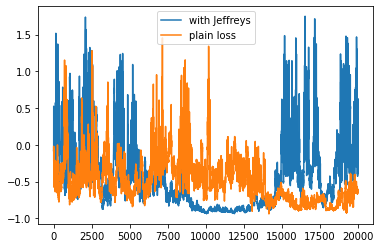

In [21]:
plt.plot(sampling_J[3][:, 1], label='with Jeffreys')
plt.plot(sampling_noJ[3][:, 1], label='plain loss')
plt.legend()

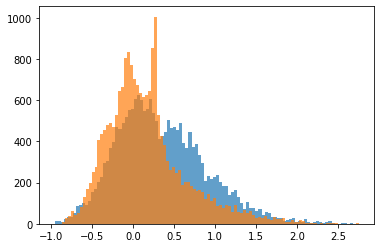

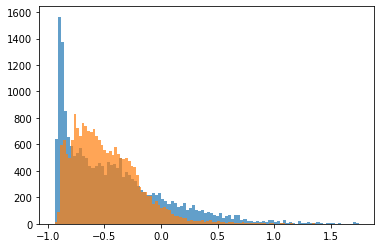

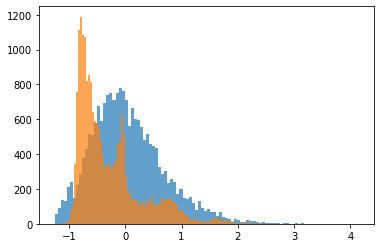

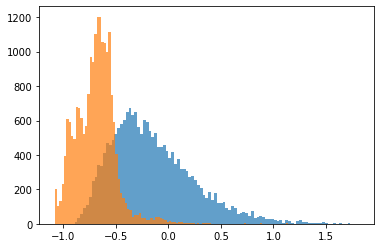

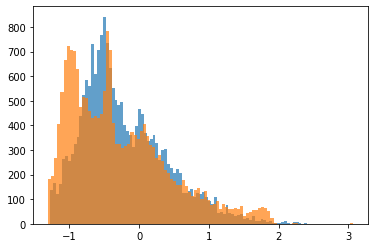

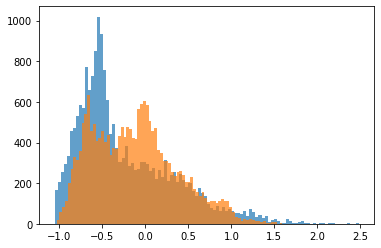

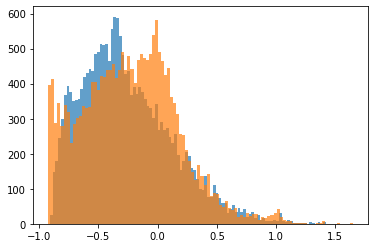

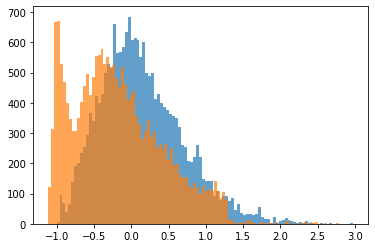

In [35]:
for i in range(sampling_J[3].shape[1]):
    plt.figure()
    plt.hist(sampling_J[3][:, i], bins=100, alpha=0.7)
    plt.hist(sampling_noJ[3][:, i], bins=100, alpha=0.7)

In [22]:
from Functions.basic_functions_bayesian import block_analysis

In [25]:
bl_outs = {}

strides = [100, 50, 10, 5, 1]

for stride in strides:
    bl_outs[stride] = block_analysis(sampling_J[3][:, 1][::stride], None)

    print('stride: ', stride)
    print('average: ', bl_outs[stride][0])
    print('std: ', bl_outs[stride][1])
    print('optimal epsilon: ', bl_outs[stride][2])

stride:  100
average:  -0.4126835934460238
std:  0.033820086345461756
optimal epsilon:  0.14815239528785704
stride:  50
average:  -0.413402317826004
std:  0.024002168915546473
optimal epsilon:  0.1310623201243044
stride:  10
average:  -0.42990660793624536
std:  0.010084636876506266
optimal epsilon:  0.11531670227477397
stride:  5
average:  -0.43217692919607764
std:  0.007082417046033248
optimal epsilon:  0.07436083329176416
stride:  1
average:  -0.4312198503786818
std:  0.0031747731689780404
optimal epsilon:  0.056024379579048086


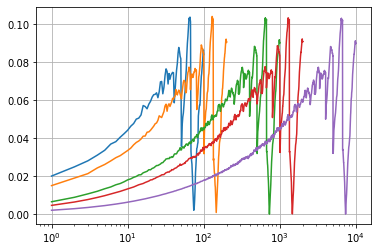

In [24]:
default_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, stride in enumerate(strides):
    plt.plot(bl_outs[stride][6], bl_outs[stride][3], c=default_colors[i])
    # plt.plot(bl_outs[stride][6], bl_outs[stride][4], c=default_colors[i])
plt.xscale('log')
plt.grid()

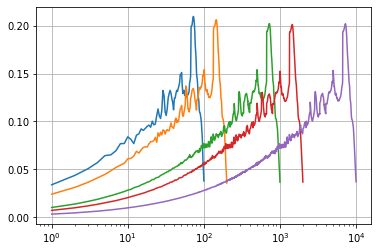

In [26]:
default_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, stride in enumerate(strides):
    plt.plot(bl_outs[stride][6], bl_outs[stride][3], c=default_colors[i])
    # plt.plot(bl_outs[stride][6], bl_outs[stride][4], c=default_colors[i])
plt.xscale('log')
plt.grid()

In [27]:
print('acceptance: ', sampling_noJ[2], sampling_J[2])

acceptance:  0.87685 0.6634


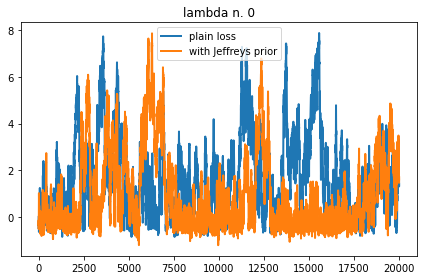

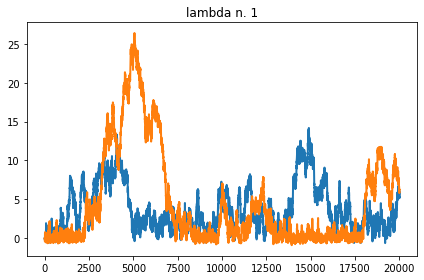

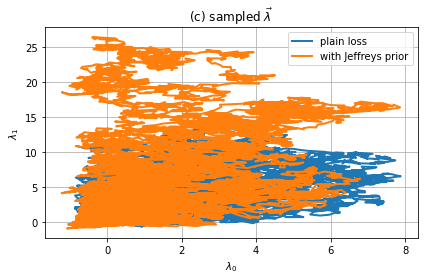

In [33]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams.update({'figure.autolayout': True})

n_obs = sampling_noJ[0].shape[1]

for i in range(n_obs):
    plt.figure()
    plt.title('lambda n. %i' % i)
    plt.plot(sampling_noJ[0][:, i], label='plain loss')
    plt.plot(sampling_J[0][:, i], label='with Jeffreys prior')
    if i == 0 : plt.legend()

if (n_obs == 2):
    plt.figure(figsize=(6, 4))
    plt.plot(sampling_noJ[0][:, 0], sampling_noJ[0][:, 1], label='plain loss')
    plt.plot(sampling_J[0][:, 0], sampling_J[0][:, 1], label='with Jeffreys prior')
    plt.xlabel('$\lambda_0$')
    plt.ylabel('$\lambda_1$')
    plt.legend()
    plt.grid()
    plt.title(r'(c) sampled $\vec\lambda$')
    # plt.savefig('Manuscript_images/ex2_sampling_lambdas.pdf', format='pdf', bbox_inches='tight')

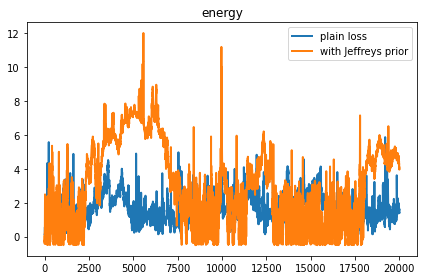

In [36]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams.update({'figure.autolayout': True})


plt.figure()
plt.title('energy')
plt.plot(sampling_noJ[1], label='plain loss')
plt.plot(sampling_J[1], label='with Jeffreys prior')
plt.legend()


Text(0.5, 1.0, '(d) sampled observables')

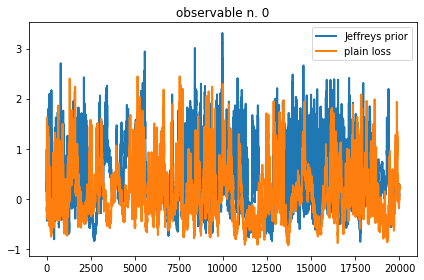

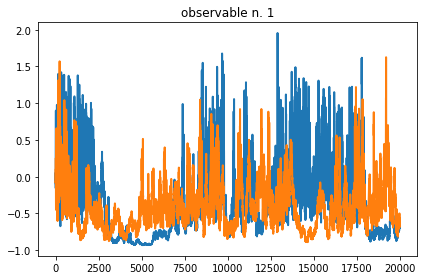

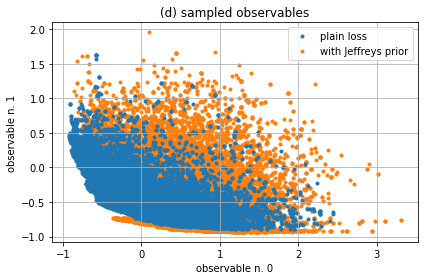

In [37]:
for i in range(n_obs):
    plt.figure()
    plt.title('observable n. %i' % i)
    plt.plot(sampling_J[3][:, i], label='Jeffreys prior')
    plt.plot(sampling_noJ[3][:, i], label='plain loss')
    if i == 0 : plt.legend()

plt.rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(6, 4))
# plt.rcParams['lines.markeredgewidth'] = 0.5

plt.plot(sampling_noJ[3][:, 0], sampling_noJ[3][:, 1], '.', label='plain loss', zorder=1)
plt.plot(sampling_J[3][:, 0], sampling_J[3][:, 1], '.', label='with Jeffreys prior', zorder=0)

plt.xlabel('observable n. 0')
plt.ylabel('observable n. 1')
plt.legend()
plt.grid()
plt.title('(d) sampled observables')
# plt.savefig('Manuscript_images/ex2_sampling_obs.pdf', format='pdf', bbox_inches='tight')


#### 5. analyse data from computations on cluster

In [11]:
path = 'Results_sampling_ER/'

file_list = os.listdir(path)

df_pars = []

for name in file_list[1:]:
    df_pars.append(pandas.read_csv(path + name + '/par_values', index_col=0))

df_pars = pandas.concat(df_pars, ignore_index=False).iloc[2:]

df_pars

stride  alpha ER  normalize?  reduce?  Jeffreys?  \
2025_05_15_17_52_31_914826  1000.0       0.5         1.0      0.0        0.0   
2025_05_15_17_52_36_670959  1000.0       0.5         1.0      0.0        1.0   
2025_05_15_18_40_13_500364  1000.0       0.5         1.0      0.0        1.0   
2025_05_15_18_41_14_071270   100.0       0.5         1.0      0.0        0.0   
2025_05_15_18_43_28_270804  1000.0       0.5         1.0      0.0        0.0   
...                            ...       ...         ...      ...        ...   
2025_05_30_16_29_11_661076   100.0      10.0         1.0      0.0        1.0   
2025_05_30_16_36_17_225675    10.0       5.0         1.0      1.0        0.0   
2025_05_30_16_39_48_133227    10.0      10.0         1.0      1.0        0.0   
2025_05_30_18_20_38_167314    10.0       5.0         1.0      1.0        1.0   
2025_05_30_18_29_45_981684    10.0      10.0         1.0      1.0        1.0   

                            dlambda    n_steps av. acceptance  
2025_05_15_17_52_31_914826      0.2     1000.0          0.801  
2025_05_15_17_52_36_670959      0.2     1000.0          0.491  
2025_05_15_18_40_13_500364      0.2   100000.0        0.65162  
2025_05_15_18_41_14_071270      0.2   100000.0        0.95413  
2025_05_15_18_43_28_270804      0.2   100000.0        0.96391  
...                             ...        ...            ...  
2025_05_30_16_29_11_661076      0.2  1000000.0       0.367013  
2025_05_30_16_36_17_225675      0.2  1000000.0       0.854514  
2025_05_30_16_39_48_133227      0.2  1000000.0       0.775685  
2025_05_30_18_20_38_167314      0.2  1000000.0       0.744751  
2025_05_30_18_29_45_981684      0.2  1000000.0        0.67758  

[98 rows x 8 columns]

In [12]:
# select based on: a column value

print(df_pars.columns)

col_inds = [0, 1, 3]
vals = [10, 10.0, 0.0]
whs = []

for i, s in enumerate(col_inds):
    # assert s in df_pars.columns, 's is not a column name'
    whs.append((df_pars.iloc[:, s] == vals[i]))

# select
inds = []

for wh in whs:
    inds.append(np.array(df_pars[wh].index))

# intersect multiple arrays with the indices
inters = []
for val in inds[0]:
    b = 1
    for i2 in range(1, len(inds)):
        if val not in inds[i2]: b = 0
    if b == 1: inters.append(val)

inds = inters

df_pars.loc[inds]

Index(['stride', 'alpha ER', 'normalize?', 'reduce?', 'Jeffreys?', 'dlambda',
       'n_steps', 'av. acceptance'],
      dtype='object')


stride  alpha ER  normalize?  reduce?  Jeffreys?  \
2025_05_30_11_36_26_049800    10.0      10.0         1.0      0.0        0.0   
2025_05_30_12_31_33_789332    10.0      10.0         1.0      0.0        1.0   

                            dlambda   n_steps av. acceptance  
2025_05_30_11_36_26_049800      0.2  100000.0        0.50609  
2025_05_30_12_31_33_789332      0.2  100000.0        0.36462

In [13]:
i_noJ = [0]  # 0, 2, 4]
iJ = [1]  # 1, 3, 5]

enes_noJ = []
enes_J = []
qs_noJ = []
qs_J = []
trajs_noJ = []
trajs_J = []

for i in i_noJ:
    enes_noJ.append(np.load(path + 'Result_' + inds[i] + '/energy.npy'))
    qs_noJ.append(np.load(path + 'Result_' + inds[i] + '/quantities.npy'))
    trajs_noJ.append(np.load(path + 'Result_' + inds[i] + '/trajectory.npy'))

for i in iJ:
    enes_J.append(np.load(path + 'Result_' + inds[i] + '/energy.npy'))
    qs_J.append(np.load(path + 'Result_' + inds[i] + '/quantities.npy'))
    trajs_J.append(np.load(path + 'Result_' + inds[i] + '/trajectory.npy'))


In [14]:
for i in range(len(qs_J)):
    print(np.mean(qs_J[i][:, 1]))

for i in range(len(qs_J)):
    print(np.mean(qs_noJ[i][:, 1]))

-0.052367159790787834
-0.16845882498487572


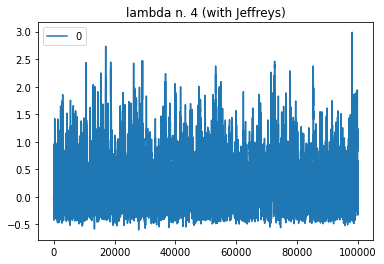

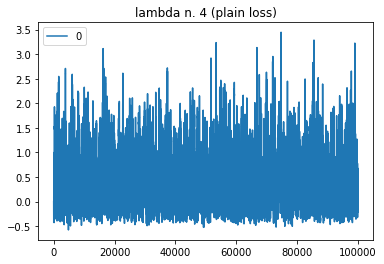

In [15]:
i_obs = 4

plt.title('lambda n. %i (with Jeffreys)' % i_obs)
for i in range(len(trajs_J)):
    plt.plot(trajs_J[i][:, i_obs], label=i)
plt.legend()

plt.figure()
plt.title('lambda n. %i (plain loss)' % i_obs)
for i in range(len(trajs_J)):
    plt.plot(trajs_noJ[i][:, i_obs], label=i)
plt.legend()

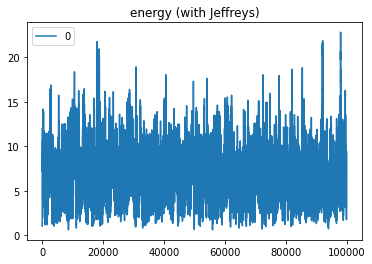

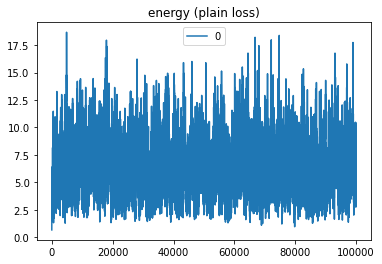

In [16]:
plt.title('energy (with Jeffreys)')
for i in range(len(trajs_J)):
    plt.plot(enes_J[i], label=i)
plt.legend()

plt.figure()
plt.title('energy (plain loss)')
for i in range(len(trajs_J)):
    plt.plot(enes_noJ[i], label=i)
plt.legend()

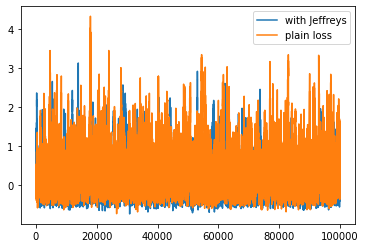

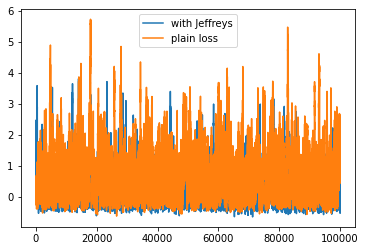

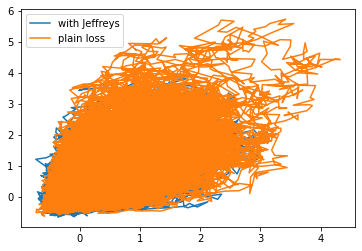

In [20]:
i = 0

plt.plot(trajs_J[i][:, 0], label='with Jeffreys')
plt.plot(trajs_noJ[i][:, 0], label='plain loss')
plt.legend()

plt.figure()
plt.plot(trajs_J[i][:, 1], label='with Jeffreys')
plt.plot(trajs_noJ[i][:, 1], label='plain loss')
plt.legend()

plt.figure()
plt.plot(trajs_J[i][:, 0], trajs_J[i][:, 1], label='with Jeffreys')
plt.plot(trajs_noJ[i][:, 0], trajs_noJ[i][:, 1], label='plain loss')
plt.legend()

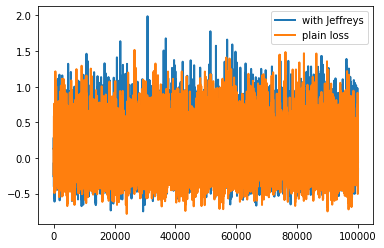

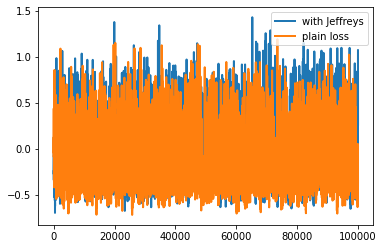

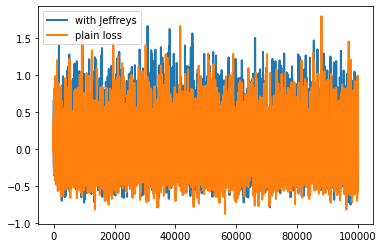

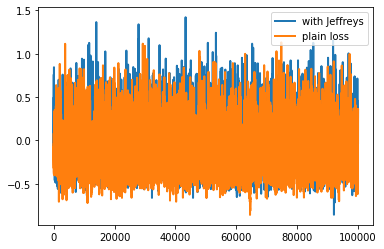

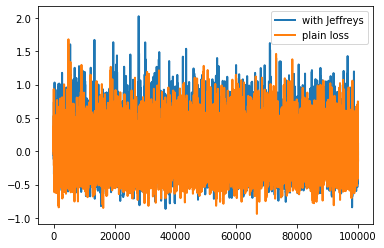

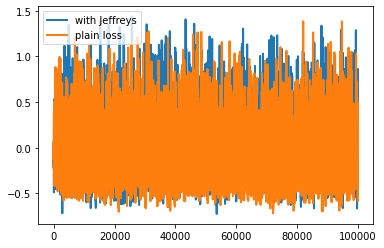

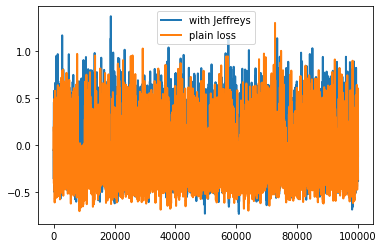

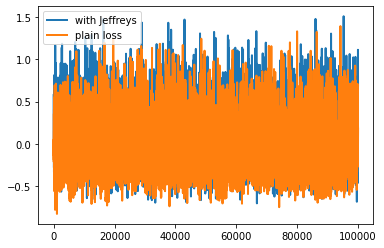

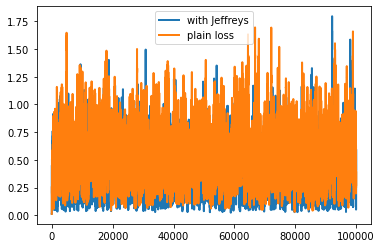

In [21]:
plt.rcParams['lines.linewidth'] = 2

i = 0

for i_obs in range(qs_J[i].shape[1]):
    plt.figure()
    plt.plot(qs_J[i][:, i_obs], label='with Jeffreys')
    plt.plot(qs_noJ[i][:, i_obs], label='plain loss')
    plt.legend()


[-0.00067526 -0.16845882 -0.03340956 -0.15967113 -0.05870882 -0.10145643
 -0.1807785  -0.08334148  0.52053435] [0.28511044 0.24037653 0.26657712 0.2196087  0.26652829 0.24420412
 0.22771541 0.25522001 0.22495993]
[ 0.10372131 -0.05236716  0.03914419 -0.06781965 -0.00060817  0.00600449
 -0.0581269   0.01843629  0.36576569] [0.3125902  0.26647535 0.29749278 0.24719348 0.2989923  0.28222945
 0.25181017 0.28643676 0.17921927]


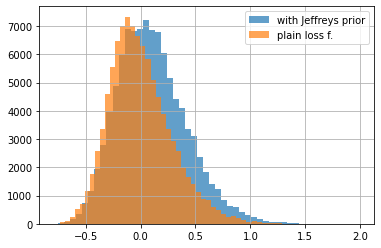

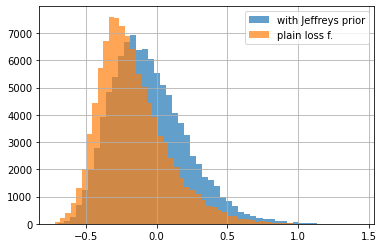

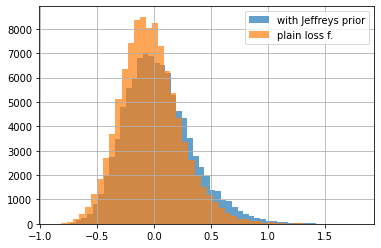

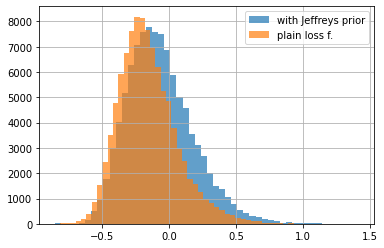

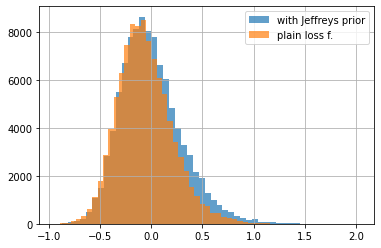

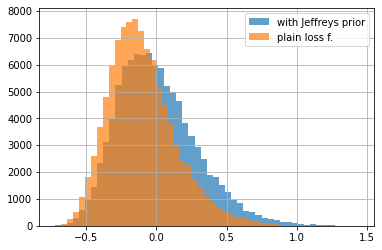

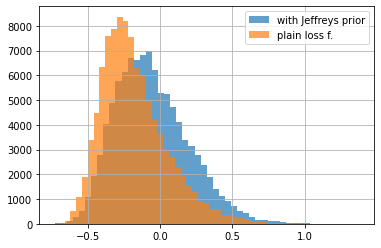

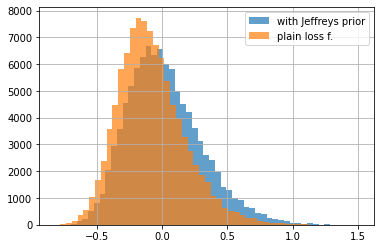

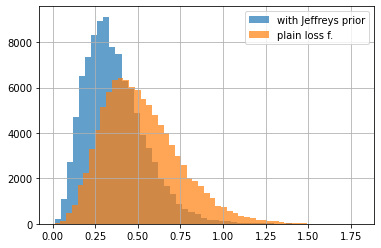

In [24]:
for i_obs in range(qs_J[i].shape[1]):
    plt.figure()
    plt.hist(qs_J[i][:, i_obs], bins=50, label='with Jeffreys prior', alpha=0.7)
    plt.hist(qs_noJ[i][:, i_obs], bins=50, label='plain loss f.', alpha=0.7)


    plt.legend()
    plt.grid()

print(np.mean(qs_noJ[i], axis=0), np.std(qs_noJ[i], axis=0))
print(np.mean(qs_J[i], axis=0), np.std(qs_J[i], axis=0))

In [22]:
from MDRefine.MDRefine import normalize_observables

name_mol = 'AAAA'
out = normalize_observables(data.mol[name_mol].gexp, data.mol[name_mol].g, weights=data.mol[name_mol].weights)

normg_mean = out[2]['backbone1_gamma_3J']
normg_std = out[3]['backbone1_gamma_3J']

In [41]:
def denormalize(values, normg_mean, normg_std):
    denormalized_values = values*normg_std + normg_mean
    return np.array(denormalized_values)

[-0.00067526 -0.16845882 -0.03340956 -0.15967113 -0.05870882 -0.10145643
 -0.1807785  -0.08334148  0.52053435] [0.28511044 0.24037653 0.26657712 0.2196087  0.26652829 0.24420412
 0.22771541 0.25522001 0.22495993]
[ 0.10372131 -0.05236716  0.03914419 -0.06781965 -0.00060817  0.00600449
 -0.0581269   0.01843629  0.36576569] [0.3125902  0.26647535 0.29749278 0.24719348 0.2989923  0.28222945
 0.25181017 0.28643676 0.17921927]


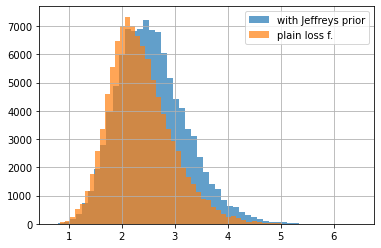

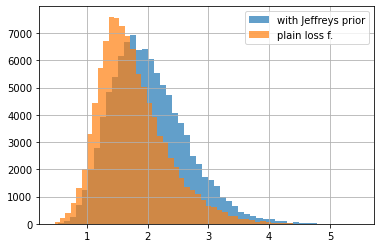

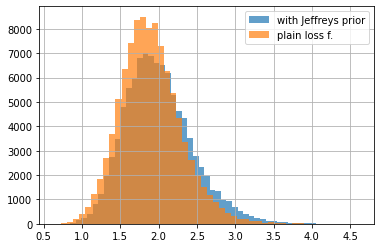

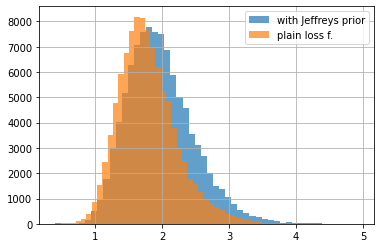

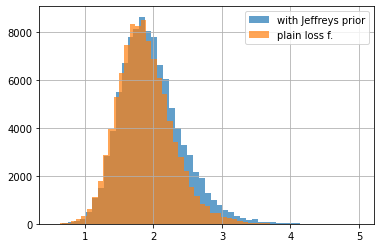

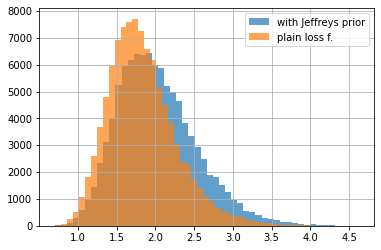

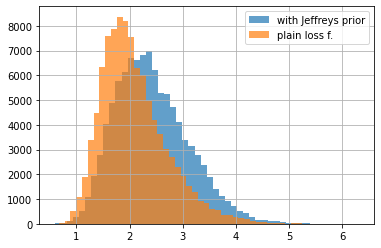

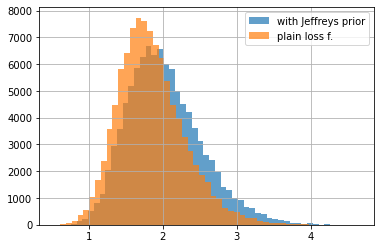

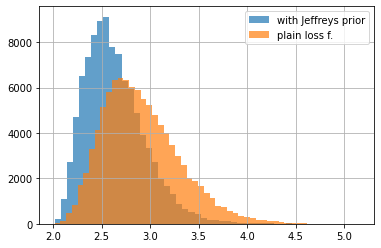

In [43]:
for i_obs in range(qs_J[i].shape[1]):
    plt.figure()

    den_qs_J = denormalize(qs_J[i][:, i_obs], normg_mean[i_obs], normg_std[i_obs])
    den_qs_noJ = denormalize(qs_noJ[i][:, i_obs], normg_mean[i_obs], normg_std[i_obs])

    plt.hist(den_qs_J, bins=50, label='with Jeffreys prior', alpha=0.7)
    plt.hist(den_qs_noJ, bins=50, label='plain loss f.', alpha=0.7)


    plt.legend()
    plt.grid()

print(np.mean(qs_noJ[i], axis=0), np.std(qs_noJ[i], axis=0))
print(np.mean(qs_J[i], axis=0), np.std(qs_J[i], axis=0))

In [45]:
normg_mean

Array([2.353033  , 2.14674372, 1.94369836, 2.10901974, 1.96657665,
       2.01397866, 2.57726247, 1.99282127], dtype=float64)

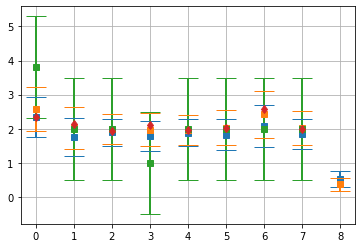

In [47]:
avs_noJ = np.mean(qs_noJ[i][:-1], axis=0)
stds_noJ = np.std(qs_noJ[i][:-1], axis=0)
avs_J = np.mean(qs_J[i], axis=0)
stds_J = np.std(qs_J[i], axis=0)

# denormalize observables
avs_noJ[:-1] = avs_noJ[:-1]*normg_std + normg_mean
stds_noJ[:-1] = stds_noJ[:-1]*normg_std
avs_J[:-1] = avs_J[:-1]*normg_std + normg_mean
stds_J[:-1] = stds_J[:-1]*normg_std

plt.plot(avs_noJ, 's', c='tab:blue')
plt.errorbar(np.arange(len(avs_noJ)), avs_noJ, yerr=stds_noJ, linestyle='', capsize=10, c='tab:blue')

plt.plot(avs_J, 's', c='tab:orange')
plt.errorbar(np.arange(len(avs_J)), avs_J, yerr=stds_J, linestyle='', capsize=10., c='tab:orange')

g_exp = data.mol['AAAA'].gexp['backbone1_gamma_3J']
std_exp = g_exp[:, 1]
g_exp = g_exp[:, 0]
plt.plot(g_exp, 's', c='tab:green')
plt.errorbar(np.arange(len(g_exp)), g_exp, yerr=std_exp, linestyle='', capsize=10., c='tab:green')

plt.plot(normg_mean, 'd', c='tab:red')

plt.grid()

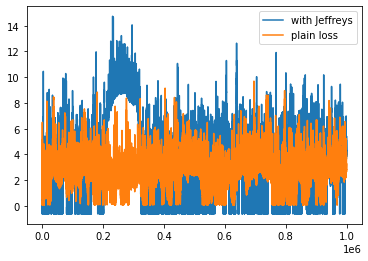

In [19]:
i = 2

plt.plot(enes_J[i], label='with Jeffreys')
plt.plot(enes_noJ[i], label='plain loss')
plt.legend()

##### block analysis

In [36]:
from Functions.basic_functions_bayesian import block_analysis

In [54]:
bl_outs = {}

strides = [1000, 100, 10]

for stride in strides:
    bl_outs[stride] = block_analysis(qs_J[:, 1][::stride], None)

    print('stride: ', stride)
    print('average: ', bl_outs[stride].mean)
    print('std: ', bl_outs[stride].std)
    print('optimal epsilon: ', bl_outs[stride].opt_epsilon, '\n')


stride:  1000
average:  -0.387293620247926
std:  0.013346974605666913
optimal epsilon:  0.023957996517052688 

stride:  100
average:  -0.39257076562575294
std:  0.004189330977435966
optimal epsilon:  0.01836494227217556 



KeyboardInterrupt: 

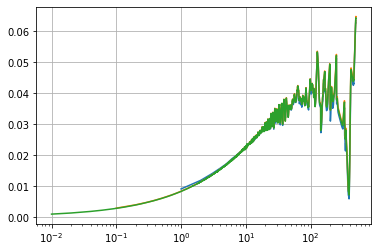

In [53]:
default_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

ratios = [strides[0]/strides[i] for i in range(len(strides))]

for i, stride in enumerate(strides):
    plt.plot(bl_outs[stride].size_blocks/ratios[i], bl_outs[stride].epsilons, c=default_colors[i])
    # plt.plot(bl_outs[stride].size_blocks, bl_outs[stride].smooth, c=default_colors[i])
plt.xscale('log')
plt.grid()

In [35]:
mu_J = np.mean(qs_J[:, 0])
mu_noJ = np.mean(qs_noJ[:, 0])

print(mu_J, mu_noJ)

0.25578586088983724 -0.10129821580399317


In [14]:
i = 2

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(qs_noJ[:, i], label='plain loss')
plt.plot(qs_J[:, i], label='with Jeffreys')
plt.legend()
plt.title('av. value obs. n. %i' % i)

plt.subplot(1, 2, 2)
plt.hist(qs_noJ[:, i], bins=100, density=True, alpha=0.7, label='plain loss')
plt.hist(qs_J[:, i], bins=100, density=True, alpha=0.7, label='with Jeffreys')
plt.legend()
plt.title('av. value obs. n. %i - histogram' % i)

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(traj_noJ[:, i], label='plain loss')
plt.plot(traj_J[:, i], label='with Jeffreys')
plt.legend()
plt.title('lambda n. %i' % i)

plt.subplot(1, 2, 2)
plt.hist(traj_noJ[:, i], bins=100, density=True, alpha=0.7, label='plain loss')
plt.hist(traj_J[:, i], bins=100, density=True, alpha=0.7, label='with Jeffreys')
plt.legend()
plt.title('lambda n. %i - histogram' % i)

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.title('relative entropy')
plt.plot(qs_noJ[:, -1], label='plain loss')
plt.plot(qs_J[:, -1], label='with Jeffreys')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('energy')
plt.plot(ene_noJ, label='plain loss')
plt.plot(ene_J, label='with Jeffreys')


IndexError: index 2 is out of bounds for axis 1 with size 2

/home/ivang/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7fae9e24e040> (for post_execute):


KeyboardInterrupt: 

In [11]:
from Functions.basic_functions_bayesian import block_analysis

In [22]:
bl_out = block_analysis(qs_J[:, -1], n_conv=1000)

In [23]:
bl_out.keys()

dict_keys(['mean', 'std', 'opt_epsilon', 'epsilon', 'smooth', 'n_blocks', 'size_blocks'])

4.834979781217844 0.005243193723386277 0.3616385487781048


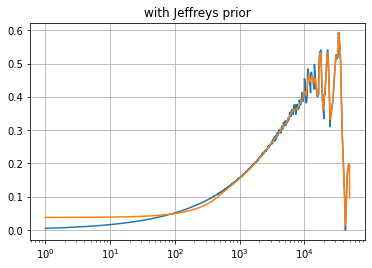

In [26]:
plt.plot(bl_out.size_blocks, bl_out.epsilon)
plt.plot(bl_out.size_blocks, bl_out.smooth)
plt.xscale('log')
plt.title('with Jeffreys prior')
plt.grid()

print(bl_out.mean, bl_out.std, bl_out.opt_epsilon)